In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('ipc_sections.csv')

In [3]:
df.head()

,Description,Offense,Punishment,Section
0,Description of IPC Section 140\nAccording to s...,Wearing the dress or carrying any token used b...,3 Months or Fine or Both,IPC_140
1,Description of IPC Section 127\nAccording to s...,Receiving property taken by war or depredation...,7 Years + Fine + forfeiture of property,IPC_127
2,Description of IPC Section 128\nAccording to s...,Public servant voluntarily allowing prisoner o...,Imprisonment for Life or 10 Years + Fine,IPC_128
3,Description of IPC Section 129\nAccording to s...,Public servant negligently suffering prisoner ...,Simple Imprisonment 3 Years + Fine,IPC_129
4,Description of IPC Section 130\nAccording to s...,"Aiding escape of, rescuing or harbouring, such...",Imprisonment for Life or 10 Years + Fine,IPC_130


In [12]:
df1=df.dropna()

In [14]:
df1['Imprisonment'] = df1["Punishment"].apply(lambda row: 1 if "Imprisonment" in row else 0)
df1.head()

<ipython-input-14-1fae6cc0ed1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Imprisonment'] = df1["Punishment"].apply(lambda row: 1 if "Imprisonment" in row else 0)


,Description,Offense,Punishment,Section,Imprisonment
0,Description of IPC Section 140\nAccording to s...,Wearing the dress or carrying any token used b...,3 Months or Fine or Both,IPC_140,0
1,Description of IPC Section 127\nAccording to s...,Receiving property taken by war or depredation...,7 Years + Fine + forfeiture of property,IPC_127,0
2,Description of IPC Section 128\nAccording to s...,Public servant voluntarily allowing prisoner o...,Imprisonment for Life or 10 Years + Fine,IPC_128,1
3,Description of IPC Section 129\nAccording to s...,Public servant negligently suffering prisoner ...,Simple Imprisonment 3 Years + Fine,IPC_129,1
4,Description of IPC Section 130\nAccording to s...,"Aiding escape of, rescuing or harbouring, such...",Imprisonment for Life or 10 Years + Fine,IPC_130,1


<Axes: ylabel='count'>

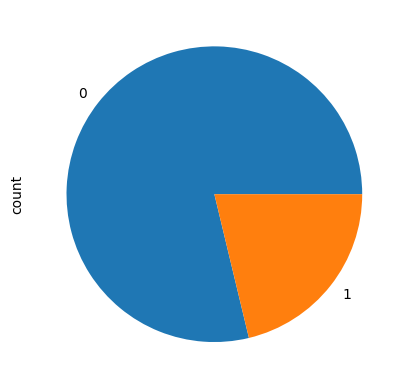

In [16]:
df1["Imprisonment"].value_counts().plot(kind="pie")

In [15]:
X = df[['Offense', 'Punishment']].values  # Input features
y = df['Description'].values  # Target variable

# Print the first few rows of X and y to verify the data
print("Input Features (X):")
print(X[:5])

print("\nTarget Variable (y):")
print(y[:5])

Input Features (X):
[['Wearing the dress or carrying any token used by a soldier, sailor or airman with intent that it may be believed that he is such a soldier, sailor or airman'
  '3 Months or Fine or Both']
 ['Receiving property taken by war or depredation mentioned in sections 125 And 126'
  '7 Years + Fine + forfeiture of property']
 ['Public servant voluntarily allowing prisoner of State or war in his custody to escape'
  'Imprisonment for Life or 10 Years + Fine']
 ['Public servant negligently suffering prisoner of State or war in his custody to escape'
  'Simple Imprisonment 3 Years + Fine']
 ['Aiding escape of, rescuing or harbouring, such prisoner, or offering Any resistance to the recapture of such prisoner'
  'Imprisonment for Life or 10 Years + Fine']]

Target Variable (y):
['Description of IPC Section 140\nAccording to section 140 of Indian penal code, Whoever, not being a soldier, sailor or airman in the Military, Naval or Air service of the Government of India, wears an

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
# Check the data types of 'Offense' and 'Punishment'
print("Data Types:")
print("Offense:", X[:, 0].dtype)
print("Punishment:", X[:, 1].dtype)

# Convert 'Offense' and 'Punishment' to strings if they are not already
X[:, 0] = X[:, 0].astype(str)
X[:, 1] = X[:, 1].astype(str)

# Combine 'Offense' and 'Punishment' into a single text feature
X_text = X[:, 0] + ' ' + X[:, 1]

# Continue with the rest of the code...


# Combine 'Offense' and 'Punishment' into a single text feature
X_text = X[:, 0] + ' ' + X[:, 1]

# Use CountVectorizer to convert text data to numerical format
vectorizer = CountVectorizer()
X_numerical = vectorizer.fit_transform(X_text)

# Use LabelEncoder to convert the target variable to numerical format
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# Print the shape of the numerical features and target variable
print("Shape of X_numerical:", X_numerical.shape)
print("Shape of y_numerical:", y_numerical.shape)

Data Types:
Offense: object
Punishment: object
Shape of X_numerical: (444, 992)
Shape of y_numerical: (444,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_numerical)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                63552     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 442)               14586     
                                                                 
Total params: 80218 (313.35 KB)
Trainable params: 80218 (313.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder  # Add this import
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the dataset


# Extract relevant columns for input features and target variable
X = df[['Offense', 'Punishment']].astype(str).values  # Convert to string
y = df['Description'].values  # Target variable

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Number of unique classes in your dataset
output_neurons = len(np.unique(y))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'Offense' and 'Punishment' into a single text feature
X_text_train = X_train[:, 0] + ' ' + X_train[:, 1]
X_text_test = X_test[:, 0] + ' ' + X_test[:, 1]

# Use CountVectorizer to convert text data to numerical format
vectorizer = CountVectorizer()
X_train_numerical = vectorizer.fit_transform(X_text_train)
X_test_numerical = vectorizer.transform(X_text_test)

# Compute sample weights for balancing classes
sample_weights = compute_sample_weight('balanced', y_train)

# Define the neural network model with adjustments
model = Sequential()
model.add(Dense(128, input_dim=X_train_numerical.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Set the number of output neurons to match the unique classes
model.add(Dense(output_neurons, activation='softmax'))

# Compile the model with sample weights
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with sample weights
history_weighted = model.fit(X_train_numerical.toarray(), y_train, epochs=1000, batch_size=100, validation_split=0.2, sample_weight=sample_weights)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_numerical.toarray(), y_test)

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 6.0971 - accuracy: 0.0000e+00

3/3 [==============================] - 1s 134ms/step - loss: 6.1024 - accuracy: 0.0000e+00 - val_loss: 6.1017 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0674 - accuracy: 0.0100

3/3 [==============================] - 0s 33ms/step - loss: 6.0885 - accuracy: 0.0106 - val_loss: 6.1080 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0686 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 25ms/step - loss: 6.0618 - accuracy: 0.0035 - val_loss: 6.1151 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0408 - accuracy: 0.0100

3/3 [==============================] - 0s 25ms/step - loss: 6.0510 - accuracy: 0.0070 - val_loss: 6.1236 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0457 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 25ms/step - loss: 6.0435 - accuracy: 0.0070 - val_loss: 6.1334 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0063 - accuracy: 0.0100

3/3 [==============================] - 0s 24ms/step - loss: 6.0220 - accuracy: 0.0141 - val_loss: 6.1449 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0036 - accuracy: 0.0100

3/3 [==============================] - 0s 25ms/step - loss: 6.0049 - accuracy: 0.0070 - val_loss: 6.1587 - val_accuracy: 0.0000e+00
Epoch 8/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9752 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.9846 - accuracy: 0.0176 - val_loss: 6.1758 - val_accuracy: 0.0000e+00
Epoch 9/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9634 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.9728 - accuracy: 0.0282 - val_loss: 6.1966 - val_accuracy: 0.0000e+00
Epoch 10/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9634 - accuracy: 0.0300

3/3 [==============================] - 0s 30ms/step - loss: 5.9427 - accuracy: 0.0211 - val_loss: 6.2230 - val_accuracy: 0.0000e+00
Epoch 11/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8994 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.9022 - accuracy: 0.0176 - val_loss: 6.2580 - val_accuracy: 0.0000e+00
Epoch 12/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8721 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.8640 - accuracy: 0.0211 - val_loss: 6.3027 - val_accuracy: 0.0000e+00
Epoch 13/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8734 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 25ms/step - loss: 5.8514 - accuracy: 0.0035 - val_loss: 6.3588 - val_accuracy: 0.0000e+00
Epoch 14/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.7573 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.7876 - accuracy: 0.0141 - val_loss: 6.4289 - val_accuracy: 0.0000e+00
Epoch 15/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.7593 - accuracy: 0.0200

3/3 [==============================] - 0s 25ms/step - loss: 5.7201 - accuracy: 0.0423 - val_loss: 6.5163 - val_accuracy: 0.0000e+00
Epoch 16/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.6775 - accuracy: 0.0200

3/3 [==============================] - 0s 24ms/step - loss: 5.6567 - accuracy: 0.0317 - val_loss: 6.6258 - val_accuracy: 0.0000e+00
Epoch 17/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.6362 - accuracy: 0.0200

3/3 [==============================] - 0s 31ms/step - loss: 5.6233 - accuracy: 0.0141 - val_loss: 6.7558 - val_accuracy: 0.0000e+00
Epoch 18/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5688 - accuracy: 0.0300

3/3 [==============================] - 0s 24ms/step - loss: 5.5469 - accuracy: 0.0211 - val_loss: 6.9106 - val_accuracy: 0.0000e+00
Epoch 19/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5467 - accuracy: 0.0500

3/3 [==============================] - 0s 24ms/step - loss: 5.5007 - accuracy: 0.0211 - val_loss: 7.0886 - val_accuracy: 0.0000e+00
Epoch 20/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.4551 - accuracy: 0.0300

3/3 [==============================] - 0s 26ms/step - loss: 5.5003 - accuracy: 0.0246 - val_loss: 7.2820 - val_accuracy: 0.0000e+00
Epoch 21/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5227 - accuracy: 0.0100

3/3 [==============================] - 0s 25ms/step - loss: 5.4151 - accuracy: 0.0211 - val_loss: 7.4696 - val_accuracy: 0.0000e+00
Epoch 22/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3452 - accuracy: 0.0100

3/3 [==============================] - 0s 25ms/step - loss: 5.3570 - accuracy: 0.0317 - val_loss: 7.6572 - val_accuracy: 0.0000e+00
Epoch 23/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3549 - accuracy: 0.0500

3/3 [==============================] - 0s 25ms/step - loss: 5.3115 - accuracy: 0.0458 - val_loss: 7.8325 - val_accuracy: 0.0000e+00
Epoch 24/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3150 - accuracy: 0.0100

3/3 [==============================] - 0s 25ms/step - loss: 5.2020 - accuracy: 0.0493 - val_loss: 8.0027 - val_accuracy: 0.0000e+00
Epoch 25/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3116 - accuracy: 0.0300

3/3 [==============================] - 0s 33ms/step - loss: 5.2204 - accuracy: 0.0246 - val_loss: 8.1587 - val_accuracy: 0.0000e+00
Epoch 26/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.2318 - accuracy: 0.0500

3/3 [==============================] - 0s 25ms/step - loss: 5.2245 - accuracy: 0.0493 - val_loss: 8.2836 - val_accuracy: 0.0000e+00
Epoch 27/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.0570 - accuracy: 0.0400

3/3 [==============================] - 0s 25ms/step - loss: 5.1297 - accuracy: 0.0423 - val_loss: 8.3827 - val_accuracy: 0.0000e+00
Epoch 28/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.0344 - accuracy: 0.0800

3/3 [==============================] - 0s 24ms/step - loss: 5.0553 - accuracy: 0.0563 - val_loss: 8.4570 - val_accuracy: 0.0000e+00
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.9954 - accuracy: 0.1100

3/3 [==============================] - 0s 24ms/step - loss: 5.0261 - accuracy: 0.0669 - val_loss: 8.5327 - val_accuracy: 0.0000e+00
Epoch 30/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.0159 - accuracy: 0.0700

3/3 [==============================] - 0s 25ms/step - loss: 4.9592 - accuracy: 0.0775 - val_loss: 8.6153 - val_accuracy: 0.0000e+00
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.8826 - accuracy: 0.1300

3/3 [==============================] - 0s 24ms/step - loss: 4.9081 - accuracy: 0.0880 - val_loss: 8.7061 - val_accuracy: 0.0000e+00
Epoch 32/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.8898 - accuracy: 0.1200

3/3 [==============================] - 0s 26ms/step - loss: 4.8590 - accuracy: 0.0986 - val_loss: 8.8144 - val_accuracy: 0.0000e+00
Epoch 33/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.7793 - accuracy: 0.1400

3/3 [==============================] - 0s 24ms/step - loss: 4.7927 - accuracy: 0.1162 - val_loss: 8.9448 - val_accuracy: 0.0000e+00
Epoch 34/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.7090 - accuracy: 0.1300

3/3 [==============================] - 0s 24ms/step - loss: 4.8243 - accuracy: 0.0704 - val_loss: 9.0767 - val_accuracy: 0.0000e+00
Epoch 35/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.6970 - accuracy: 0.0800

3/3 [==============================] - 0s 33ms/step - loss: 4.7370 - accuracy: 0.0951 - val_loss: 9.1973 - val_accuracy: 0.0000e+00
Epoch 36/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.7278 - accuracy: 0.0700

3/3 [==============================] - 0s 24ms/step - loss: 4.6708 - accuracy: 0.0915 - val_loss: 9.3230 - val_accuracy: 0.0000e+00
Epoch 37/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.7827 - accuracy: 0.0900

3/3 [==============================] - 0s 24ms/step - loss: 4.6423 - accuracy: 0.1021 - val_loss: 9.4501 - val_accuracy: 0.0000e+00
Epoch 38/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.7427 - accuracy: 0.0900

3/3 [==============================] - 0s 25ms/step - loss: 4.5792 - accuracy: 0.1268 - val_loss: 9.5696 - val_accuracy: 0.0000e+00
Epoch 39/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.5057 - accuracy: 0.1200

3/3 [==============================] - 0s 25ms/step - loss: 4.5286 - accuracy: 0.1197 - val_loss: 9.6890 - val_accuracy: 0.0000e+00
Epoch 40/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.4798 - accuracy: 0.1700

3/3 [==============================] - 0s 25ms/step - loss: 4.4107 - accuracy: 0.1585 - val_loss: 9.8193 - val_accuracy: 0.0000e+00
Epoch 41/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.4485 - accuracy: 0.1300

3/3 [==============================] - 0s 32ms/step - loss: 4.3358 - accuracy: 0.1620 - val_loss: 9.9586 - val_accuracy: 0.0000e+00
Epoch 42/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.4334 - accuracy: 0.1700

3/3 [==============================] - 0s 30ms/step - loss: 4.3410 - accuracy: 0.1796 - val_loss: 10.1210 - val_accuracy: 0.0000e+00
Epoch 43/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.4278 - accuracy: 0.1300

3/3 [==============================] - 0s 25ms/step - loss: 4.3694 - accuracy: 0.1655 - val_loss: 10.2616 - val_accuracy: 0.0000e+00
Epoch 44/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.1990 - accuracy: 0.1700

3/3 [==============================] - 0s 25ms/step - loss: 4.2551 - accuracy: 0.1796 - val_loss: 10.4069 - val_accuracy: 0.0000e+00
Epoch 45/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.1866 - accuracy: 0.1900

3/3 [==============================] - 0s 32ms/step - loss: 4.2329 - accuracy: 0.1514 - val_loss: 10.5433 - val_accuracy: 0.0000e+00
Epoch 46/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.1036 - accuracy: 0.1400

3/3 [==============================] - 0s 25ms/step - loss: 4.1747 - accuracy: 0.1514 - val_loss: 10.6735 - val_accuracy: 0.0000e+00
Epoch 47/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.9863 - accuracy: 0.1700

3/3 [==============================] - 0s 28ms/step - loss: 4.0964 - accuracy: 0.1725 - val_loss: 10.7903 - val_accuracy: 0.0000e+00
Epoch 48/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.0663 - accuracy: 0.1400

3/3 [==============================] - 0s 25ms/step - loss: 4.0605 - accuracy: 0.1796 - val_loss: 10.8850 - val_accuracy: 0.0000e+00
Epoch 49/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8597 - accuracy: 0.2000

3/3 [==============================] - 0s 25ms/step - loss: 3.9092 - accuracy: 0.2148 - val_loss: 11.0109 - val_accuracy: 0.0000e+00
Epoch 50/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8285 - accuracy: 0.2300

3/3 [==============================] - 0s 26ms/step - loss: 3.9543 - accuracy: 0.2007 - val_loss: 11.1373 - val_accuracy: 0.0000e+00
Epoch 51/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.0646 - accuracy: 0.1800

3/3 [==============================] - 0s 26ms/step - loss: 4.0744 - accuracy: 0.1972 - val_loss: 11.2171 - val_accuracy: 0.0000e+00
Epoch 52/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8965 - accuracy: 0.2400

3/3 [==============================] - 0s 25ms/step - loss: 3.8806 - accuracy: 0.1866 - val_loss: 11.2919 - val_accuracy: 0.0000e+00
Epoch 53/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8604 - accuracy: 0.2100

3/3 [==============================] - 0s 25ms/step - loss: 3.8316 - accuracy: 0.2007 - val_loss: 11.3874 - val_accuracy: 0.0000e+00
Epoch 54/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.7338 - accuracy: 0.2100

3/3 [==============================] - 0s 25ms/step - loss: 3.7325 - accuracy: 0.2359 - val_loss: 11.4924 - val_accuracy: 0.0000e+00
Epoch 55/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8657 - accuracy: 0.1700

3/3 [==============================] - 0s 33ms/step - loss: 3.8029 - accuracy: 0.2324 - val_loss: 11.5937 - val_accuracy: 0.0000e+00
Epoch 56/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8074 - accuracy: 0.1800

3/3 [==============================] - 0s 24ms/step - loss: 3.6866 - accuracy: 0.2183 - val_loss: 11.7072 - val_accuracy: 0.0000e+00
Epoch 57/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8615 - accuracy: 0.1900

3/3 [==============================] - 0s 26ms/step - loss: 3.7638 - accuracy: 0.2218 - val_loss: 11.8115 - val_accuracy: 0.0000e+00
Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.5796 - accuracy: 0.2700

3/3 [==============================] - 0s 32ms/step - loss: 3.5331 - accuracy: 0.2746 - val_loss: 11.9227 - val_accuracy: 0.0000e+00
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.4952 - accuracy: 0.2900

3/3 [==============================] - 0s 25ms/step - loss: 3.5586 - accuracy: 0.2641 - val_loss: 12.0348 - val_accuracy: 0.0000e+00
Epoch 60/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.7103 - accuracy: 0.2100

3/3 [==============================] - 0s 25ms/step - loss: 3.5961 - accuracy: 0.2254 - val_loss: 12.1292 - val_accuracy: 0.0000e+00
Epoch 61/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3444 - accuracy: 0.3000

3/3 [==============================] - 0s 27ms/step - loss: 3.4448 - accuracy: 0.2887 - val_loss: 12.2615 - val_accuracy: 0.0000e+00
Epoch 62/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1918 - accuracy: 0.4100

3/3 [==============================] - 0s 35ms/step - loss: 3.2977 - accuracy: 0.3345 - val_loss: 12.4135 - val_accuracy: 0.0000e+00
Epoch 63/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.4990 - accuracy: 0.2700

3/3 [==============================] - 0s 27ms/step - loss: 3.4073 - accuracy: 0.2676 - val_loss: 12.5482 - val_accuracy: 0.0000e+00
Epoch 64/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3456 - accuracy: 0.2400

3/3 [==============================] - 0s 25ms/step - loss: 3.2990 - accuracy: 0.2852 - val_loss: 12.6641 - val_accuracy: 0.0000e+00
Epoch 65/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3032 - accuracy: 0.3100

3/3 [==============================] - 0s 30ms/step - loss: 3.3259 - accuracy: 0.3028 - val_loss: 12.7675 - val_accuracy: 0.0000e+00
Epoch 66/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.2146 - accuracy: 0.2800

3/3 [==============================] - 0s 34ms/step - loss: 3.2296 - accuracy: 0.2782 - val_loss: 12.8528 - val_accuracy: 0.0000e+00
Epoch 67/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3778 - accuracy: 0.2600

3/3 [==============================] - 0s 25ms/step - loss: 3.2812 - accuracy: 0.2993 - val_loss: 12.9185 - val_accuracy: 0.0000e+00
Epoch 68/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3198 - accuracy: 0.3100

3/3 [==============================] - 0s 25ms/step - loss: 3.2368 - accuracy: 0.3099 - val_loss: 12.9988 - val_accuracy: 0.0000e+00
Epoch 69/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1249 - accuracy: 0.3100

3/3 [==============================] - 0s 34ms/step - loss: 3.1937 - accuracy: 0.3063 - val_loss: 13.0741 - val_accuracy: 0.0000e+00
Epoch 70/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0829 - accuracy: 0.2900

3/3 [==============================] - 0s 28ms/step - loss: 3.1420 - accuracy: 0.3099 - val_loss: 13.1425 - val_accuracy: 0.0000e+00
Epoch 71/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1432 - accuracy: 0.2900

3/3 [==============================] - 0s 25ms/step - loss: 3.1866 - accuracy: 0.2923 - val_loss: 13.1932 - val_accuracy: 0.0000e+00
Epoch 72/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0101 - accuracy: 0.3200

3/3 [==============================] - 0s 39ms/step - loss: 3.1161 - accuracy: 0.3063 - val_loss: 13.2342 - val_accuracy: 0.0000e+00
Epoch 73/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0591 - accuracy: 0.3200

3/3 [==============================] - 0s 44ms/step - loss: 2.9864 - accuracy: 0.3169 - val_loss: 13.2915 - val_accuracy: 0.0000e+00
Epoch 74/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.9997 - accuracy: 0.4000

3/3 [==============================] - 0s 36ms/step - loss: 2.9063 - accuracy: 0.3521 - val_loss: 13.3711 - val_accuracy: 0.0000e+00
Epoch 75/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.8580 - accuracy: 0.3600

3/3 [==============================] - 0s 33ms/step - loss: 2.9854 - accuracy: 0.3169 - val_loss: 13.4314 - val_accuracy: 0.0000e+00
Epoch 76/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7672 - accuracy: 0.4500

3/3 [==============================] - 0s 42ms/step - loss: 2.8530 - accuracy: 0.4014 - val_loss: 13.5046 - val_accuracy: 0.0000e+00
Epoch 77/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7843 - accuracy: 0.4200

3/3 [==============================] - 0s 44ms/step - loss: 2.8147 - accuracy: 0.3873 - val_loss: 13.5955 - val_accuracy: 0.0000e+00
Epoch 78/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0667 - accuracy: 0.3100

3/3 [==============================] - 0s 35ms/step - loss: 2.8228 - accuracy: 0.3697 - val_loss: 13.6973 - val_accuracy: 0.0000e+00
Epoch 79/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6478 - accuracy: 0.3500

3/3 [==============================] - 0s 35ms/step - loss: 2.8430 - accuracy: 0.3239 - val_loss: 13.7843 - val_accuracy: 0.0000e+00
Epoch 80/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.8384 - accuracy: 0.3400

3/3 [==============================] - 0s 40ms/step - loss: 2.7823 - accuracy: 0.3556 - val_loss: 13.8416 - val_accuracy: 0.0000e+00
Epoch 81/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7036 - accuracy: 0.3500

3/3 [==============================] - 0s 42ms/step - loss: 2.8711 - accuracy: 0.3345 - val_loss: 13.8795 - val_accuracy: 0.0000e+00
Epoch 82/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6880 - accuracy: 0.3800

3/3 [==============================] - 0s 43ms/step - loss: 2.7731 - accuracy: 0.3486 - val_loss: 13.9217 - val_accuracy: 0.0000e+00
Epoch 83/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.9384 - accuracy: 0.3200

3/3 [==============================] - 0s 39ms/step - loss: 2.8867 - accuracy: 0.3486 - val_loss: 13.9496 - val_accuracy: 0.0000e+00
Epoch 84/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6341 - accuracy: 0.4000

3/3 [==============================] - 0s 42ms/step - loss: 2.7118 - accuracy: 0.3838 - val_loss: 13.9800 - val_accuracy: 0.0000e+00
Epoch 85/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5884 - accuracy: 0.4000

3/3 [==============================] - 0s 35ms/step - loss: 2.5937 - accuracy: 0.3908 - val_loss: 14.0097 - val_accuracy: 0.0000e+00
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7232 - accuracy: 0.3500

3/3 [==============================] - 0s 44ms/step - loss: 2.7949 - accuracy: 0.3380 - val_loss: 14.0337 - val_accuracy: 0.0000e+00
Epoch 87/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5752 - accuracy: 0.4200

3/3 [==============================] - 0s 36ms/step - loss: 2.6857 - accuracy: 0.3803 - val_loss: 14.0590 - val_accuracy: 0.0000e+00
Epoch 88/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3490 - accuracy: 0.4500

3/3 [==============================] - 0s 41ms/step - loss: 2.4998 - accuracy: 0.4014 - val_loss: 14.0929 - val_accuracy: 0.0000e+00
Epoch 89/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4103 - accuracy: 0.4700

3/3 [==============================] - 0s 49ms/step - loss: 2.5475 - accuracy: 0.4155 - val_loss: 14.1396 - val_accuracy: 0.0000e+00
Epoch 90/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7739 - accuracy: 0.3200

3/3 [==============================] - 0s 38ms/step - loss: 2.6491 - accuracy: 0.4085 - val_loss: 14.1925 - val_accuracy: 0.0000e+00
Epoch 91/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5360 - accuracy: 0.4700

3/3 [==============================] - 0s 39ms/step - loss: 2.5634 - accuracy: 0.4190 - val_loss: 14.2635 - val_accuracy: 0.0000e+00
Epoch 92/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3481 - accuracy: 0.4900

3/3 [==============================] - 0s 43ms/step - loss: 2.4607 - accuracy: 0.4261 - val_loss: 14.3168 - val_accuracy: 0.0000e+00
Epoch 93/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6908 - accuracy: 0.3800

3/3 [==============================] - 0s 41ms/step - loss: 2.5294 - accuracy: 0.4085 - val_loss: 14.3757 - val_accuracy: 0.0000e+00
Epoch 94/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5673 - accuracy: 0.4500

3/3 [==============================] - 0s 45ms/step - loss: 2.5610 - accuracy: 0.4190 - val_loss: 14.4387 - val_accuracy: 0.0000e+00
Epoch 95/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5210 - accuracy: 0.3900

3/3 [==============================] - 0s 45ms/step - loss: 2.4123 - accuracy: 0.4331 - val_loss: 14.4915 - val_accuracy: 0.0000e+00
Epoch 96/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2883 - accuracy: 0.4700

3/3 [==============================] - 0s 42ms/step - loss: 2.4059 - accuracy: 0.4331 - val_loss: 14.5456 - val_accuracy: 0.0000e+00
Epoch 97/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4112 - accuracy: 0.4300

3/3 [==============================] - 0s 46ms/step - loss: 2.4221 - accuracy: 0.4331 - val_loss: 14.6029 - val_accuracy: 0.0000e+00
Epoch 98/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3433 - accuracy: 0.4600

3/3 [==============================] - 0s 42ms/step - loss: 2.3694 - accuracy: 0.4507 - val_loss: 14.6572 - val_accuracy: 0.0000e+00
Epoch 99/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4598 - accuracy: 0.4100

3/3 [==============================] - 0s 43ms/step - loss: 2.4665 - accuracy: 0.4331 - val_loss: 14.7031 - val_accuracy: 0.0000e+00
Epoch 100/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2693 - accuracy: 0.4400

3/3 [==============================] - 0s 42ms/step - loss: 2.4093 - accuracy: 0.4331 - val_loss: 14.7514 - val_accuracy: 0.0000e+00
Epoch 101/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4087 - accuracy: 0.4500

3/3 [==============================] - 0s 47ms/step - loss: 2.4048 - accuracy: 0.4085 - val_loss: 14.7809 - val_accuracy: 0.0000e+00
Epoch 102/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3486 - accuracy: 0.4500

3/3 [==============================] - 0s 41ms/step - loss: 2.3255 - accuracy: 0.4683 - val_loss: 14.8063 - val_accuracy: 0.0000e+00
Epoch 103/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2002 - accuracy: 0.5200

3/3 [==============================] - 0s 41ms/step - loss: 2.2777 - accuracy: 0.4754 - val_loss: 14.8318 - val_accuracy: 0.0000e+00
Epoch 104/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3887 - accuracy: 0.4600

3/3 [==============================] - 0s 44ms/step - loss: 2.3512 - accuracy: 0.4577 - val_loss: 14.8674 - val_accuracy: 0.0000e+00
Epoch 105/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6333 - accuracy: 0.3100

3/3 [==============================] - 0s 36ms/step - loss: 2.3371 - accuracy: 0.4120 - val_loss: 14.8997 - val_accuracy: 0.0000e+00
Epoch 106/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4039 - accuracy: 0.4300

3/3 [==============================] - 0s 41ms/step - loss: 2.3041 - accuracy: 0.4507 - val_loss: 14.9316 - val_accuracy: 0.0000e+00
Epoch 107/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5638 - accuracy: 0.4400

3/3 [==============================] - 0s 41ms/step - loss: 2.4925 - accuracy: 0.4120 - val_loss: 14.9449 - val_accuracy: 0.0000e+00
Epoch 108/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1255 - accuracy: 0.4400

3/3 [==============================] - 0s 41ms/step - loss: 2.2187 - accuracy: 0.4472 - val_loss: 14.9584 - val_accuracy: 0.0000e+00
Epoch 109/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1215 - accuracy: 0.5100

3/3 [==============================] - 0s 39ms/step - loss: 2.2928 - accuracy: 0.4718 - val_loss: 14.9735 - val_accuracy: 0.0000e+00
Epoch 110/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1917 - accuracy: 0.5200

3/3 [==============================] - 0s 44ms/step - loss: 2.1727 - accuracy: 0.4859 - val_loss: 15.0002 - val_accuracy: 0.0000e+00
Epoch 111/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4153 - accuracy: 0.4400

3/3 [==============================] - 0s 45ms/step - loss: 2.3482 - accuracy: 0.4401 - val_loss: 15.0266 - val_accuracy: 0.0000e+00
Epoch 112/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9619 - accuracy: 0.5500

3/3 [==============================] - 0s 32ms/step - loss: 2.1611 - accuracy: 0.4859 - val_loss: 15.0736 - val_accuracy: 0.0000e+00
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1848 - accuracy: 0.4600

3/3 [==============================] - 0s 25ms/step - loss: 2.2933 - accuracy: 0.4754 - val_loss: 15.1086 - val_accuracy: 0.0000e+00
Epoch 114/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2540 - accuracy: 0.4400

3/3 [==============================] - 0s 27ms/step - loss: 2.2868 - accuracy: 0.4261 - val_loss: 15.1153 - val_accuracy: 0.0000e+00
Epoch 115/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1258 - accuracy: 0.4400

3/3 [==============================] - 0s 24ms/step - loss: 2.1812 - accuracy: 0.4542 - val_loss: 15.1319 - val_accuracy: 0.0000e+00
Epoch 116/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2798 - accuracy: 0.4400

3/3 [==============================] - 0s 28ms/step - loss: 2.0705 - accuracy: 0.5141 - val_loss: 15.1586 - val_accuracy: 0.0000e+00
Epoch 117/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1001 - accuracy: 0.4700

3/3 [==============================] - 0s 27ms/step - loss: 2.0887 - accuracy: 0.4859 - val_loss: 15.2157 - val_accuracy: 0.0000e+00
Epoch 118/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3289 - accuracy: 0.4200

3/3 [==============================] - 0s 27ms/step - loss: 2.1659 - accuracy: 0.4577 - val_loss: 15.2550 - val_accuracy: 0.0000e+00
Epoch 119/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4327 - accuracy: 0.3800

3/3 [==============================] - 0s 24ms/step - loss: 2.1991 - accuracy: 0.4507 - val_loss: 15.2719 - val_accuracy: 0.0000e+00
Epoch 120/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0276 - accuracy: 0.5100

3/3 [==============================] - 0s 26ms/step - loss: 2.1888 - accuracy: 0.4542 - val_loss: 15.2686 - val_accuracy: 0.0000e+00
Epoch 121/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0707 - accuracy: 0.4900

3/3 [==============================] - 0s 26ms/step - loss: 2.0531 - accuracy: 0.5000 - val_loss: 15.2806 - val_accuracy: 0.0000e+00
Epoch 122/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9558 - accuracy: 0.4900

3/3 [==============================] - 0s 26ms/step - loss: 2.0548 - accuracy: 0.4683 - val_loss: 15.3114 - val_accuracy: 0.0000e+00
Epoch 123/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0450 - accuracy: 0.4800

3/3 [==============================] - 0s 25ms/step - loss: 2.1115 - accuracy: 0.4894 - val_loss: 15.3644 - val_accuracy: 0.0000e+00
Epoch 124/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1747 - accuracy: 0.5200

3/3 [==============================] - 0s 26ms/step - loss: 2.1613 - accuracy: 0.4789 - val_loss: 15.4045 - val_accuracy: 0.0000e+00
Epoch 125/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0673 - accuracy: 0.5000

3/3 [==============================] - 0s 30ms/step - loss: 2.0825 - accuracy: 0.4859 - val_loss: 15.4239 - val_accuracy: 0.0000e+00
Epoch 126/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9933 - accuracy: 0.5500

3/3 [==============================] - 0s 25ms/step - loss: 2.0635 - accuracy: 0.5070 - val_loss: 15.4319 - val_accuracy: 0.0000e+00
Epoch 127/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9936 - accuracy: 0.4900

3/3 [==============================] - 0s 34ms/step - loss: 1.9737 - accuracy: 0.5141 - val_loss: 15.4512 - val_accuracy: 0.0000e+00
Epoch 128/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3272 - accuracy: 0.4200

3/3 [==============================] - 0s 25ms/step - loss: 2.1789 - accuracy: 0.4507 - val_loss: 15.4639 - val_accuracy: 0.0000e+00
Epoch 129/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8195 - accuracy: 0.5400

3/3 [==============================] - 0s 27ms/step - loss: 1.9273 - accuracy: 0.5528 - val_loss: 15.5030 - val_accuracy: 0.0000e+00
Epoch 130/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8450 - accuracy: 0.5400

3/3 [==============================] - 0s 25ms/step - loss: 1.8996 - accuracy: 0.5282 - val_loss: 15.5529 - val_accuracy: 0.0000e+00
Epoch 131/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0125 - accuracy: 0.4800

3/3 [==============================] - 0s 26ms/step - loss: 2.0148 - accuracy: 0.5000 - val_loss: 15.5963 - val_accuracy: 0.0000e+00
Epoch 132/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8878 - accuracy: 0.5200

3/3 [==============================] - 0s 26ms/step - loss: 2.0778 - accuracy: 0.5070 - val_loss: 15.6348 - val_accuracy: 0.0000e+00
Epoch 133/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0806 - accuracy: 0.4900

3/3 [==============================] - 0s 27ms/step - loss: 2.0293 - accuracy: 0.5211 - val_loss: 15.6726 - val_accuracy: 0.0000e+00
Epoch 134/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0446 - accuracy: 0.4900

3/3 [==============================] - 0s 26ms/step - loss: 1.9454 - accuracy: 0.5106 - val_loss: 15.7156 - val_accuracy: 0.0000e+00
Epoch 135/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8536 - accuracy: 0.5600

3/3 [==============================] - 0s 26ms/step - loss: 1.9282 - accuracy: 0.5106 - val_loss: 15.7617 - val_accuracy: 0.0000e+00
Epoch 136/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0713 - accuracy: 0.4700

3/3 [==============================] - 0s 26ms/step - loss: 2.0529 - accuracy: 0.4683 - val_loss: 15.7900 - val_accuracy: 0.0000e+00
Epoch 137/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0448 - accuracy: 0.5500

3/3 [==============================] - 0s 33ms/step - loss: 1.9136 - accuracy: 0.5458 - val_loss: 15.8180 - val_accuracy: 0.0000e+00
Epoch 138/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9079 - accuracy: 0.4700

3/3 [==============================] - 0s 26ms/step - loss: 1.9146 - accuracy: 0.5000 - val_loss: 15.8545 - val_accuracy: 0.0000e+00
Epoch 139/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8647 - accuracy: 0.5600

3/3 [==============================] - 0s 39ms/step - loss: 2.0231 - accuracy: 0.4965 - val_loss: 15.8928 - val_accuracy: 0.0000e+00
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9060 - accuracy: 0.5700

3/3 [==============================] - 0s 35ms/step - loss: 1.8065 - accuracy: 0.5810 - val_loss: 15.9205 - val_accuracy: 0.0000e+00
Epoch 141/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8815 - accuracy: 0.5500

3/3 [==============================] - 0s 27ms/step - loss: 1.8504 - accuracy: 0.5423 - val_loss: 15.9555 - val_accuracy: 0.0000e+00
Epoch 142/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8130 - accuracy: 0.5300

3/3 [==============================] - 0s 26ms/step - loss: 1.8484 - accuracy: 0.5246 - val_loss: 15.9926 - val_accuracy: 0.0000e+00
Epoch 143/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8792 - accuracy: 0.5100

3/3 [==============================] - 0s 26ms/step - loss: 1.8523 - accuracy: 0.5246 - val_loss: 16.0112 - val_accuracy: 0.0000e+00
Epoch 144/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9650 - accuracy: 0.4800

3/3 [==============================] - 0s 26ms/step - loss: 1.9123 - accuracy: 0.4930 - val_loss: 16.0233 - val_accuracy: 0.0000e+00
Epoch 145/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9232 - accuracy: 0.5500

3/3 [==============================] - 0s 36ms/step - loss: 1.8777 - accuracy: 0.5423 - val_loss: 16.0250 - val_accuracy: 0.0000e+00
Epoch 146/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9164 - accuracy: 0.5300

3/3 [==============================] - 0s 26ms/step - loss: 1.8573 - accuracy: 0.5634 - val_loss: 16.0294 - val_accuracy: 0.0000e+00
Epoch 147/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7340 - accuracy: 0.5600

3/3 [==============================] - 0s 26ms/step - loss: 1.6602 - accuracy: 0.5739 - val_loss: 16.0446 - val_accuracy: 0.0000e+00
Epoch 148/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8004 - accuracy: 0.5700

3/3 [==============================] - 0s 27ms/step - loss: 1.7823 - accuracy: 0.5704 - val_loss: 16.0845 - val_accuracy: 0.0000e+00
Epoch 149/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6135 - accuracy: 0.6000

3/3 [==============================] - 0s 25ms/step - loss: 1.6854 - accuracy: 0.5563 - val_loss: 16.1392 - val_accuracy: 0.0000e+00
Epoch 150/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9212 - accuracy: 0.5500

3/3 [==============================] - 0s 25ms/step - loss: 1.8667 - accuracy: 0.5246 - val_loss: 16.1978 - val_accuracy: 0.0000e+00
Epoch 151/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7394 - accuracy: 0.5200

3/3 [==============================] - 0s 26ms/step - loss: 1.7182 - accuracy: 0.5458 - val_loss: 16.2359 - val_accuracy: 0.0000e+00
Epoch 152/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8580 - accuracy: 0.5200

3/3 [==============================] - 0s 28ms/step - loss: 1.8289 - accuracy: 0.5387 - val_loss: 16.2596 - val_accuracy: 0.0000e+00
Epoch 153/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6431 - accuracy: 0.6200

3/3 [==============================] - 0s 31ms/step - loss: 1.6907 - accuracy: 0.5563 - val_loss: 16.2961 - val_accuracy: 0.0000e+00
Epoch 154/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6969 - accuracy: 0.5100

3/3 [==============================] - 0s 25ms/step - loss: 1.7872 - accuracy: 0.5141 - val_loss: 16.3136 - val_accuracy: 0.0000e+00
Epoch 155/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6426 - accuracy: 0.6200

3/3 [==============================] - 0s 26ms/step - loss: 1.6868 - accuracy: 0.5810 - val_loss: 16.3438 - val_accuracy: 0.0000e+00
Epoch 156/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8864 - accuracy: 0.4700

3/3 [==============================] - 0s 27ms/step - loss: 1.7788 - accuracy: 0.5246 - val_loss: 16.3661 - val_accuracy: 0.0000e+00
Epoch 157/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6856 - accuracy: 0.6100

3/3 [==============================] - 0s 27ms/step - loss: 1.8246 - accuracy: 0.5493 - val_loss: 16.3768 - val_accuracy: 0.0000e+00
Epoch 158/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7275 - accuracy: 0.5600

3/3 [==============================] - 0s 35ms/step - loss: 1.8196 - accuracy: 0.5458 - val_loss: 16.3797 - val_accuracy: 0.0000e+00
Epoch 159/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8395 - accuracy: 0.4800

3/3 [==============================] - 0s 26ms/step - loss: 1.8182 - accuracy: 0.5246 - val_loss: 16.3688 - val_accuracy: 0.0000e+00
Epoch 160/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7711 - accuracy: 0.4900

3/3 [==============================] - 0s 25ms/step - loss: 1.8083 - accuracy: 0.5458 - val_loss: 16.3570 - val_accuracy: 0.0000e+00
Epoch 161/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5647 - accuracy: 0.5800

3/3 [==============================] - 0s 26ms/step - loss: 1.7267 - accuracy: 0.5704 - val_loss: 16.3559 - val_accuracy: 0.0000e+00
Epoch 162/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8387 - accuracy: 0.5300

3/3 [==============================] - 0s 26ms/step - loss: 1.7207 - accuracy: 0.5775 - val_loss: 16.3592 - val_accuracy: 0.0000e+00
Epoch 163/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6106 - accuracy: 0.5700

3/3 [==============================] - 0s 26ms/step - loss: 1.7040 - accuracy: 0.5423 - val_loss: 16.3658 - val_accuracy: 0.0000e+00
Epoch 164/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5104 - accuracy: 0.6100

3/3 [==============================] - 0s 25ms/step - loss: 1.6236 - accuracy: 0.5986 - val_loss: 16.3827 - val_accuracy: 0.0000e+00
Epoch 165/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6805 - accuracy: 0.5400

3/3 [==============================] - 0s 28ms/step - loss: 1.7159 - accuracy: 0.5387 - val_loss: 16.4162 - val_accuracy: 0.0000e+00
Epoch 166/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7649 - accuracy: 0.5300

3/3 [==============================] - 0s 34ms/step - loss: 1.6844 - accuracy: 0.5704 - val_loss: 16.4527 - val_accuracy: 0.0000e+00
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6544 - accuracy: 0.5800

3/3 [==============================] - 0s 32ms/step - loss: 1.6629 - accuracy: 0.5739 - val_loss: 16.4895 - val_accuracy: 0.0000e+00
Epoch 168/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5120 - accuracy: 0.6200

3/3 [==============================] - 0s 26ms/step - loss: 1.5621 - accuracy: 0.6268 - val_loss: 16.5272 - val_accuracy: 0.0000e+00
Epoch 169/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6932 - accuracy: 0.5900

3/3 [==============================] - 0s 29ms/step - loss: 1.6630 - accuracy: 0.5563 - val_loss: 16.5685 - val_accuracy: 0.0000e+00
Epoch 170/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7530 - accuracy: 0.5400

3/3 [==============================] - 0s 27ms/step - loss: 1.6597 - accuracy: 0.5810 - val_loss: 16.5942 - val_accuracy: 0.0000e+00
Epoch 171/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4233 - accuracy: 0.6800

3/3 [==============================] - 0s 27ms/step - loss: 1.5520 - accuracy: 0.6232 - val_loss: 16.6489 - val_accuracy: 0.0000e+00
Epoch 172/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6119 - accuracy: 0.5700

3/3 [==============================] - 0s 35ms/step - loss: 1.5928 - accuracy: 0.5986 - val_loss: 16.6968 - val_accuracy: 0.0000e+00
Epoch 173/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6151 - accuracy: 0.5800

3/3 [==============================] - 0s 26ms/step - loss: 1.6299 - accuracy: 0.5880 - val_loss: 16.7390 - val_accuracy: 0.0000e+00
Epoch 174/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8117 - accuracy: 0.5600

3/3 [==============================] - 0s 26ms/step - loss: 1.7417 - accuracy: 0.5458 - val_loss: 16.7500 - val_accuracy: 0.0000e+00
Epoch 175/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5665 - accuracy: 0.5800

3/3 [==============================] - 0s 28ms/step - loss: 1.7065 - accuracy: 0.5423 - val_loss: 16.7458 - val_accuracy: 0.0000e+00
Epoch 176/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6015 - accuracy: 0.5300

3/3 [==============================] - 0s 26ms/step - loss: 1.7624 - accuracy: 0.5106 - val_loss: 16.7348 - val_accuracy: 0.0000e+00
Epoch 177/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4386 - accuracy: 0.6400

3/3 [==============================] - 0s 36ms/step - loss: 1.5245 - accuracy: 0.6197 - val_loss: 16.7349 - val_accuracy: 0.0000e+00
Epoch 178/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6533 - accuracy: 0.5800

3/3 [==============================] - 0s 27ms/step - loss: 1.5808 - accuracy: 0.5951 - val_loss: 16.7490 - val_accuracy: 0.0000e+00
Epoch 179/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4644 - accuracy: 0.6100

3/3 [==============================] - 0s 26ms/step - loss: 1.5670 - accuracy: 0.6021 - val_loss: 16.7774 - val_accuracy: 0.0000e+00
Epoch 180/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8922 - accuracy: 0.5200

3/3 [==============================] - 0s 26ms/step - loss: 1.6294 - accuracy: 0.5669 - val_loss: 16.7988 - val_accuracy: 0.0000e+00
Epoch 181/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1938 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 1.4975 - accuracy: 0.6268 - val_loss: 16.8266 - val_accuracy: 0.0000e+00
Epoch 182/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5150 - accuracy: 0.6100

3/3 [==============================] - 0s 34ms/step - loss: 1.5109 - accuracy: 0.6021 - val_loss: 16.8490 - val_accuracy: 0.0000e+00
Epoch 183/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5461 - accuracy: 0.6200

3/3 [==============================] - 0s 27ms/step - loss: 1.5933 - accuracy: 0.5810 - val_loss: 16.8734 - val_accuracy: 0.0000e+00
Epoch 184/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5771 - accuracy: 0.6000

3/3 [==============================] - 0s 27ms/step - loss: 1.5426 - accuracy: 0.5986 - val_loss: 16.8847 - val_accuracy: 0.0000e+00
Epoch 185/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5611 - accuracy: 0.5700

3/3 [==============================] - 0s 28ms/step - loss: 1.5850 - accuracy: 0.5634 - val_loss: 16.8912 - val_accuracy: 0.0000e+00
Epoch 186/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5425 - accuracy: 0.5700

3/3 [==============================] - 0s 26ms/step - loss: 1.6057 - accuracy: 0.5493 - val_loss: 16.8826 - val_accuracy: 0.0000e+00
Epoch 187/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3599 - accuracy: 0.6300

3/3 [==============================] - 0s 36ms/step - loss: 1.4441 - accuracy: 0.5986 - val_loss: 16.8818 - val_accuracy: 0.0000e+00
Epoch 188/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5516 - accuracy: 0.6400

3/3 [==============================] - 0s 36ms/step - loss: 1.5211 - accuracy: 0.6268 - val_loss: 16.8826 - val_accuracy: 0.0000e+00
Epoch 189/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5413 - accuracy: 0.5900

3/3 [==============================] - 0s 27ms/step - loss: 1.6035 - accuracy: 0.5739 - val_loss: 16.8870 - val_accuracy: 0.0000e+00
Epoch 190/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4395 - accuracy: 0.5800

3/3 [==============================] - 0s 26ms/step - loss: 1.5096 - accuracy: 0.5951 - val_loss: 16.9116 - val_accuracy: 0.0000e+00
Epoch 191/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5843 - accuracy: 0.5900

3/3 [==============================] - 0s 25ms/step - loss: 1.5673 - accuracy: 0.5915 - val_loss: 16.9400 - val_accuracy: 0.0000e+00
Epoch 192/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8142 - accuracy: 0.4900

3/3 [==============================] - 0s 27ms/step - loss: 1.6136 - accuracy: 0.5599 - val_loss: 16.9512 - val_accuracy: 0.0000e+00
Epoch 193/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5174 - accuracy: 0.6100

3/3 [==============================] - 0s 27ms/step - loss: 1.4825 - accuracy: 0.6127 - val_loss: 16.9684 - val_accuracy: 0.0000e+00
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7217 - accuracy: 0.5400

3/3 [==============================] - 0s 31ms/step - loss: 1.6550 - accuracy: 0.5458 - val_loss: 16.9765 - val_accuracy: 0.0000e+00
Epoch 195/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7240 - accuracy: 0.5900

3/3 [==============================] - 0s 33ms/step - loss: 1.6787 - accuracy: 0.5739 - val_loss: 16.9514 - val_accuracy: 0.0000e+00
Epoch 196/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4585 - accuracy: 0.6500

3/3 [==============================] - 0s 27ms/step - loss: 1.5556 - accuracy: 0.6197 - val_loss: 16.9333 - val_accuracy: 0.0000e+00
Epoch 197/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5236 - accuracy: 0.5600

3/3 [==============================] - 0s 26ms/step - loss: 1.5195 - accuracy: 0.5810 - val_loss: 16.9279 - val_accuracy: 0.0000e+00
Epoch 198/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4317 - accuracy: 0.6100

3/3 [==============================] - 0s 28ms/step - loss: 1.4206 - accuracy: 0.6303 - val_loss: 16.9416 - val_accuracy: 0.0000e+00
Epoch 199/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6295 - accuracy: 0.6000

3/3 [==============================] - 0s 27ms/step - loss: 1.4757 - accuracy: 0.6127 - val_loss: 16.9875 - val_accuracy: 0.0000e+00
Epoch 200/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4092 - accuracy: 0.5800

3/3 [==============================] - 0s 27ms/step - loss: 1.4838 - accuracy: 0.5986 - val_loss: 17.0326 - val_accuracy: 0.0000e+00
Epoch 201/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6972 - accuracy: 0.5500

3/3 [==============================] - 0s 27ms/step - loss: 1.5765 - accuracy: 0.5634 - val_loss: 17.0707 - val_accuracy: 0.0000e+00
Epoch 202/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7450 - accuracy: 0.5200

3/3 [==============================] - 0s 26ms/step - loss: 1.5511 - accuracy: 0.5739 - val_loss: 17.0898 - val_accuracy: 0.0000e+00
Epoch 203/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5180 - accuracy: 0.5800

3/3 [==============================] - 0s 33ms/step - loss: 1.4241 - accuracy: 0.6444 - val_loss: 17.1121 - val_accuracy: 0.0000e+00
Epoch 204/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4121 - accuracy: 0.6500

3/3 [==============================] - 0s 26ms/step - loss: 1.5940 - accuracy: 0.5810 - val_loss: 17.1220 - val_accuracy: 0.0000e+00
Epoch 205/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2394 - accuracy: 0.6700

3/3 [==============================] - 0s 26ms/step - loss: 1.4070 - accuracy: 0.6268 - val_loss: 17.1407 - val_accuracy: 0.0000e+00
Epoch 206/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4710 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.4607 - accuracy: 0.6303 - val_loss: 17.1665 - val_accuracy: 0.0000e+00
Epoch 207/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3685 - accuracy: 0.6700

3/3 [==============================] - 0s 27ms/step - loss: 1.4175 - accuracy: 0.6373 - val_loss: 17.2019 - val_accuracy: 0.0000e+00
Epoch 208/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3690 - accuracy: 0.5900

3/3 [==============================] - 0s 32ms/step - loss: 1.5068 - accuracy: 0.5915 - val_loss: 17.2376 - val_accuracy: 0.0000e+00
Epoch 209/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7146 - accuracy: 0.5500

3/3 [==============================] - 0s 29ms/step - loss: 1.4443 - accuracy: 0.6021 - val_loss: 17.2568 - val_accuracy: 0.0000e+00
Epoch 210/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5341 - accuracy: 0.6000

3/3 [==============================] - 0s 29ms/step - loss: 1.4874 - accuracy: 0.6162 - val_loss: 17.2759 - val_accuracy: 0.0000e+00
Epoch 211/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4686 - accuracy: 0.6300

3/3 [==============================] - 0s 27ms/step - loss: 1.5197 - accuracy: 0.5880 - val_loss: 17.2794 - val_accuracy: 0.0000e+00
Epoch 212/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5090 - accuracy: 0.6400

3/3 [==============================] - 0s 35ms/step - loss: 1.4227 - accuracy: 0.6232 - val_loss: 17.2763 - val_accuracy: 0.0000e+00
Epoch 213/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4184 - accuracy: 0.6600

3/3 [==============================] - 0s 27ms/step - loss: 1.4023 - accuracy: 0.6373 - val_loss: 17.2803 - val_accuracy: 0.0000e+00
Epoch 214/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4687 - accuracy: 0.6000

3/3 [==============================] - 0s 30ms/step - loss: 1.3829 - accuracy: 0.6197 - val_loss: 17.2912 - val_accuracy: 0.0000e+00
Epoch 215/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5197 - accuracy: 0.6000

3/3 [==============================] - 0s 27ms/step - loss: 1.4734 - accuracy: 0.6162 - val_loss: 17.3032 - val_accuracy: 0.0000e+00
Epoch 216/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5849 - accuracy: 0.5300

3/3 [==============================] - 0s 28ms/step - loss: 1.4651 - accuracy: 0.6162 - val_loss: 17.3128 - val_accuracy: 0.0000e+00
Epoch 217/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4023 - accuracy: 0.6200

3/3 [==============================] - 0s 26ms/step - loss: 1.3976 - accuracy: 0.6092 - val_loss: 17.3348 - val_accuracy: 0.0000e+00
Epoch 218/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7137 - accuracy: 0.5700

3/3 [==============================] - 0s 27ms/step - loss: 1.5367 - accuracy: 0.5951 - val_loss: 17.3414 - val_accuracy: 0.0000e+00
Epoch 219/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5954 - accuracy: 0.6100

3/3 [==============================] - 0s 25ms/step - loss: 1.5464 - accuracy: 0.5880 - val_loss: 17.3351 - val_accuracy: 0.0000e+00
Epoch 220/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4958 - accuracy: 0.5500

3/3 [==============================] - 0s 39ms/step - loss: 1.4569 - accuracy: 0.5775 - val_loss: 17.3295 - val_accuracy: 0.0000e+00
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5099 - accuracy: 0.5800

3/3 [==============================] - 0s 38ms/step - loss: 1.3829 - accuracy: 0.6585 - val_loss: 17.3416 - val_accuracy: 0.0000e+00
Epoch 222/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2997 - accuracy: 0.6200

3/3 [==============================] - 0s 29ms/step - loss: 1.4087 - accuracy: 0.6408 - val_loss: 17.3734 - val_accuracy: 0.0000e+00
Epoch 223/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3715 - accuracy: 0.5800

3/3 [==============================] - 0s 26ms/step - loss: 1.4466 - accuracy: 0.5775 - val_loss: 17.3965 - val_accuracy: 0.0000e+00
Epoch 224/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4429 - accuracy: 0.6300

3/3 [==============================] - 0s 27ms/step - loss: 1.3473 - accuracy: 0.6444 - val_loss: 17.4278 - val_accuracy: 0.0000e+00
Epoch 225/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2421 - accuracy: 0.6200

3/3 [==============================] - 0s 28ms/step - loss: 1.3320 - accuracy: 0.6338 - val_loss: 17.4614 - val_accuracy: 0.0000e+00
Epoch 226/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1963 - accuracy: 0.6700

3/3 [==============================] - 0s 28ms/step - loss: 1.2901 - accuracy: 0.6444 - val_loss: 17.4849 - val_accuracy: 0.0000e+00
Epoch 227/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1362 - accuracy: 0.6900

3/3 [==============================] - 0s 26ms/step - loss: 1.3119 - accuracy: 0.6514 - val_loss: 17.5031 - val_accuracy: 0.0000e+00
Epoch 228/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5098 - accuracy: 0.6500

3/3 [==============================] - 0s 26ms/step - loss: 1.4421 - accuracy: 0.6268 - val_loss: 17.5228 - val_accuracy: 0.0000e+00
Epoch 229/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3799 - accuracy: 0.6000

3/3 [==============================] - 0s 27ms/step - loss: 1.3713 - accuracy: 0.6162 - val_loss: 17.5439 - val_accuracy: 0.0000e+00
Epoch 230/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2559 - accuracy: 0.6600

3/3 [==============================] - 0s 27ms/step - loss: 1.4196 - accuracy: 0.6127 - val_loss: 17.5757 - val_accuracy: 0.0000e+00
Epoch 231/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4186 - accuracy: 0.6100

3/3 [==============================] - 0s 26ms/step - loss: 1.3344 - accuracy: 0.6549 - val_loss: 17.5960 - val_accuracy: 0.0000e+00
Epoch 232/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3468 - accuracy: 0.6600

3/3 [==============================] - 0s 26ms/step - loss: 1.3527 - accuracy: 0.6373 - val_loss: 17.6176 - val_accuracy: 0.0000e+00
Epoch 233/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5529 - accuracy: 0.5000

3/3 [==============================] - 0s 27ms/step - loss: 1.3609 - accuracy: 0.6162 - val_loss: 17.6368 - val_accuracy: 0.0000e+00
Epoch 234/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2924 - accuracy: 0.6700

3/3 [==============================] - 0s 27ms/step - loss: 1.3655 - accuracy: 0.6585 - val_loss: 17.6642 - val_accuracy: 0.0000e+00
Epoch 235/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4535 - accuracy: 0.6400

3/3 [==============================] - 0s 33ms/step - loss: 1.4306 - accuracy: 0.6303 - val_loss: 17.6854 - val_accuracy: 0.0000e+00
Epoch 236/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2738 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.2754 - accuracy: 0.6796 - val_loss: 17.7149 - val_accuracy: 0.0000e+00
Epoch 237/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3195 - accuracy: 0.6700

3/3 [==============================] - 0s 27ms/step - loss: 1.3270 - accuracy: 0.6655 - val_loss: 17.7352 - val_accuracy: 0.0000e+00
Epoch 238/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4767 - accuracy: 0.5800

3/3 [==============================] - 0s 29ms/step - loss: 1.3999 - accuracy: 0.6056 - val_loss: 17.7449 - val_accuracy: 0.0000e+00
Epoch 239/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2648 - accuracy: 0.7000

3/3 [==============================] - 0s 28ms/step - loss: 1.2858 - accuracy: 0.6725 - val_loss: 17.7677 - val_accuracy: 0.0000e+00
Epoch 240/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2565 - accuracy: 0.6600

3/3 [==============================] - 0s 31ms/step - loss: 1.3653 - accuracy: 0.6338 - val_loss: 17.7852 - val_accuracy: 0.0000e+00
Epoch 241/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1646 - accuracy: 0.6700

3/3 [==============================] - 0s 28ms/step - loss: 1.2985 - accuracy: 0.6479 - val_loss: 17.8021 - val_accuracy: 0.0000e+00
Epoch 242/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3413 - accuracy: 0.6100

3/3 [==============================] - 0s 30ms/step - loss: 1.4103 - accuracy: 0.6056 - val_loss: 17.8019 - val_accuracy: 0.0000e+00
Epoch 243/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3276 - accuracy: 0.6400

3/3 [==============================] - 0s 26ms/step - loss: 1.3212 - accuracy: 0.6549 - val_loss: 17.7955 - val_accuracy: 0.0000e+00
Epoch 244/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4423 - accuracy: 0.5600

3/3 [==============================] - 0s 27ms/step - loss: 1.3517 - accuracy: 0.6127 - val_loss: 17.7964 - val_accuracy: 0.0000e+00
Epoch 245/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2039 - accuracy: 0.6600

3/3 [==============================] - 0s 28ms/step - loss: 1.3418 - accuracy: 0.6338 - val_loss: 17.7904 - val_accuracy: 0.0000e+00
Epoch 246/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3668 - accuracy: 0.6500

3/3 [==============================] - 0s 34ms/step - loss: 1.3829 - accuracy: 0.6232 - val_loss: 17.7720 - val_accuracy: 0.0000e+00
Epoch 247/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1656 - accuracy: 0.6500

3/3 [==============================] - 0s 37ms/step - loss: 1.2914 - accuracy: 0.6268 - val_loss: 17.7631 - val_accuracy: 0.0000e+00
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3946 - accuracy: 0.6000

3/3 [==============================] - 0s 52ms/step - loss: 1.5019 - accuracy: 0.5669 - val_loss: 17.7454 - val_accuracy: 0.0000e+00
Epoch 249/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4407 - accuracy: 0.6100

3/3 [==============================] - 0s 44ms/step - loss: 1.3884 - accuracy: 0.6268 - val_loss: 17.7320 - val_accuracy: 0.0000e+00
Epoch 250/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5511 - accuracy: 0.6200

3/3 [==============================] - 0s 51ms/step - loss: 1.3951 - accuracy: 0.6303 - val_loss: 17.7230 - val_accuracy: 0.0000e+00
Epoch 251/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1355 - accuracy: 0.7100

3/3 [==============================] - 0s 42ms/step - loss: 1.3461 - accuracy: 0.6620 - val_loss: 17.7233 - val_accuracy: 0.0000e+00
Epoch 252/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2153 - accuracy: 0.6700

3/3 [==============================] - 0s 34ms/step - loss: 1.3705 - accuracy: 0.6303 - val_loss: 17.7338 - val_accuracy: 0.0000e+00
Epoch 253/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3607 - accuracy: 0.6800

3/3 [==============================] - 0s 43ms/step - loss: 1.4093 - accuracy: 0.6444 - val_loss: 17.7332 - val_accuracy: 0.0000e+00
Epoch 254/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2404 - accuracy: 0.7100

3/3 [==============================] - 0s 37ms/step - loss: 1.3079 - accuracy: 0.6690 - val_loss: 17.7348 - val_accuracy: 0.0000e+00
Epoch 255/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3345 - accuracy: 0.6000

3/3 [==============================] - 0s 36ms/step - loss: 1.3347 - accuracy: 0.6127 - val_loss: 17.7383 - val_accuracy: 0.0000e+00
Epoch 256/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3375 - accuracy: 0.6700

3/3 [==============================] - 0s 37ms/step - loss: 1.2734 - accuracy: 0.6690 - val_loss: 17.7541 - val_accuracy: 0.0000e+00
Epoch 257/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4495 - accuracy: 0.6000

3/3 [==============================] - 0s 38ms/step - loss: 1.4084 - accuracy: 0.6162 - val_loss: 17.7708 - val_accuracy: 0.0000e+00
Epoch 258/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3927 - accuracy: 0.6100

3/3 [==============================] - 0s 47ms/step - loss: 1.2750 - accuracy: 0.6620 - val_loss: 17.8046 - val_accuracy: 0.0000e+00
Epoch 259/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2192 - accuracy: 0.7000

3/3 [==============================] - 0s 38ms/step - loss: 1.2662 - accuracy: 0.6338 - val_loss: 17.8298 - val_accuracy: 0.0000e+00
Epoch 260/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4425 - accuracy: 0.6200

3/3 [==============================] - 0s 51ms/step - loss: 1.3655 - accuracy: 0.6162 - val_loss: 17.8494 - val_accuracy: 0.0000e+00
Epoch 261/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3431 - accuracy: 0.6300

3/3 [==============================] - 0s 45ms/step - loss: 1.3235 - accuracy: 0.6514 - val_loss: 17.8612 - val_accuracy: 0.0000e+00
Epoch 262/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2926 - accuracy: 0.6200

3/3 [==============================] - 0s 43ms/step - loss: 1.4048 - accuracy: 0.6162 - val_loss: 17.8617 - val_accuracy: 0.0000e+00
Epoch 263/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4233 - accuracy: 0.6500

3/3 [==============================] - 0s 39ms/step - loss: 1.3851 - accuracy: 0.6268 - val_loss: 17.8424 - val_accuracy: 0.0000e+00
Epoch 264/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4567 - accuracy: 0.5800

3/3 [==============================] - 0s 52ms/step - loss: 1.3695 - accuracy: 0.6373 - val_loss: 17.8258 - val_accuracy: 0.0000e+00
Epoch 265/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3092 - accuracy: 0.6400

3/3 [==============================] - 0s 41ms/step - loss: 1.3195 - accuracy: 0.6444 - val_loss: 17.8157 - val_accuracy: 0.0000e+00
Epoch 266/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4404 - accuracy: 0.6000

3/3 [==============================] - 0s 40ms/step - loss: 1.2466 - accuracy: 0.6725 - val_loss: 17.8164 - val_accuracy: 0.0000e+00
Epoch 267/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3759 - accuracy: 0.6500

3/3 [==============================] - 0s 45ms/step - loss: 1.3616 - accuracy: 0.6338 - val_loss: 17.8188 - val_accuracy: 0.0000e+00
Epoch 268/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3289 - accuracy: 0.6800

3/3 [==============================] - 0s 55ms/step - loss: 1.3217 - accuracy: 0.6514 - val_loss: 17.8341 - val_accuracy: 0.0000e+00
Epoch 269/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2844 - accuracy: 0.7100

3/3 [==============================] - 0s 46ms/step - loss: 1.3047 - accuracy: 0.6725 - val_loss: 17.8648 - val_accuracy: 0.0000e+00
Epoch 270/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1420 - accuracy: 0.6500

3/3 [==============================] - 0s 49ms/step - loss: 1.2461 - accuracy: 0.6761 - val_loss: 17.8983 - val_accuracy: 0.0000e+00
Epoch 271/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2612 - accuracy: 0.6500

3/3 [==============================] - 0s 47ms/step - loss: 1.2296 - accuracy: 0.6620 - val_loss: 17.9358 - val_accuracy: 0.0000e+00
Epoch 272/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1849 - accuracy: 0.7200

3/3 [==============================] - 0s 52ms/step - loss: 1.2997 - accuracy: 0.6655 - val_loss: 17.9823 - val_accuracy: 0.0000e+00
Epoch 273/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2484 - accuracy: 0.6600

3/3 [==============================] - 0s 59ms/step - loss: 1.3234 - accuracy: 0.6585 - val_loss: 18.0220 - val_accuracy: 0.0000e+00
Epoch 274/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2585 - accuracy: 0.6400

3/3 [==============================] - 0s 50ms/step - loss: 1.2262 - accuracy: 0.6620 - val_loss: 18.0674 - val_accuracy: 0.0000e+00
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3709 - accuracy: 0.5900

3/3 [==============================] - 0s 48ms/step - loss: 1.3370 - accuracy: 0.6373 - val_loss: 18.1070 - val_accuracy: 0.0000e+00
Epoch 276/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1479 - accuracy: 0.6700

3/3 [==============================] - 0s 48ms/step - loss: 1.1763 - accuracy: 0.6866 - val_loss: 18.1479 - val_accuracy: 0.0000e+00
Epoch 277/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1273 - accuracy: 0.7200

3/3 [==============================] - 0s 46ms/step - loss: 1.2469 - accuracy: 0.6725 - val_loss: 18.1942 - val_accuracy: 0.0000e+00
Epoch 278/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4671 - accuracy: 0.5900

3/3 [==============================] - 0s 48ms/step - loss: 1.2019 - accuracy: 0.6514 - val_loss: 18.2211 - val_accuracy: 0.0000e+00
Epoch 279/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2571 - accuracy: 0.6400

3/3 [==============================] - 0s 51ms/step - loss: 1.3173 - accuracy: 0.6373 - val_loss: 18.2386 - val_accuracy: 0.0000e+00
Epoch 280/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3704 - accuracy: 0.6300

3/3 [==============================] - 0s 50ms/step - loss: 1.2476 - accuracy: 0.6655 - val_loss: 18.2489 - val_accuracy: 0.0000e+00
Epoch 281/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1457 - accuracy: 0.7000

3/3 [==============================] - 0s 41ms/step - loss: 1.3035 - accuracy: 0.6585 - val_loss: 18.2692 - val_accuracy: 0.0000e+00
Epoch 282/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1943 - accuracy: 0.6600

3/3 [==============================] - 0s 29ms/step - loss: 1.2734 - accuracy: 0.6549 - val_loss: 18.2890 - val_accuracy: 0.0000e+00
Epoch 283/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1663 - accuracy: 0.6600

3/3 [==============================] - 0s 36ms/step - loss: 1.2750 - accuracy: 0.6338 - val_loss: 18.3033 - val_accuracy: 0.0000e+00
Epoch 284/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2532 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.2431 - accuracy: 0.6690 - val_loss: 18.3089 - val_accuracy: 0.0000e+00
Epoch 285/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3840 - accuracy: 0.6300

3/3 [==============================] - 0s 37ms/step - loss: 1.2803 - accuracy: 0.6549 - val_loss: 18.3164 - val_accuracy: 0.0000e+00
Epoch 286/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2863 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.2407 - accuracy: 0.6408 - val_loss: 18.3314 - val_accuracy: 0.0000e+00
Epoch 287/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4368 - accuracy: 0.6000

3/3 [==============================] - 0s 43ms/step - loss: 1.3323 - accuracy: 0.6268 - val_loss: 18.3421 - val_accuracy: 0.0000e+00
Epoch 288/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1210 - accuracy: 0.6800

3/3 [==============================] - 0s 29ms/step - loss: 1.2262 - accuracy: 0.6514 - val_loss: 18.3552 - val_accuracy: 0.0000e+00
Epoch 289/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1828 - accuracy: 0.6700

3/3 [==============================] - 0s 29ms/step - loss: 1.3351 - accuracy: 0.6232 - val_loss: 18.3568 - val_accuracy: 0.0000e+00
Epoch 290/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1520 - accuracy: 0.6700

3/3 [==============================] - 0s 28ms/step - loss: 1.3233 - accuracy: 0.6338 - val_loss: 18.3552 - val_accuracy: 0.0000e+00
Epoch 291/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1434 - accuracy: 0.6800

3/3 [==============================] - 0s 29ms/step - loss: 1.2263 - accuracy: 0.6408 - val_loss: 18.3521 - val_accuracy: 0.0000e+00
Epoch 292/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1402 - accuracy: 0.7000

3/3 [==============================] - 0s 28ms/step - loss: 1.1762 - accuracy: 0.6725 - val_loss: 18.3758 - val_accuracy: 0.0000e+00
Epoch 293/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2021 - accuracy: 0.6500

3/3 [==============================] - 0s 31ms/step - loss: 1.1966 - accuracy: 0.6831 - val_loss: 18.4034 - val_accuracy: 0.0000e+00
Epoch 294/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3194 - accuracy: 0.6400

3/3 [==============================] - 0s 34ms/step - loss: 1.2336 - accuracy: 0.6761 - val_loss: 18.4302 - val_accuracy: 0.0000e+00
Epoch 295/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2776 - accuracy: 0.6400

3/3 [==============================] - 0s 38ms/step - loss: 1.2580 - accuracy: 0.6479 - val_loss: 18.4479 - val_accuracy: 0.0000e+00
Epoch 296/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3822 - accuracy: 0.6100

3/3 [==============================] - 0s 29ms/step - loss: 1.2764 - accuracy: 0.6373 - val_loss: 18.4550 - val_accuracy: 0.0000e+00
Epoch 297/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1421 - accuracy: 0.6900

3/3 [==============================] - 0s 29ms/step - loss: 1.2722 - accuracy: 0.6549 - val_loss: 18.4510 - val_accuracy: 0.0000e+00
Epoch 298/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1482 - accuracy: 0.6900

3/3 [==============================] - 0s 28ms/step - loss: 1.2752 - accuracy: 0.6690 - val_loss: 18.4531 - val_accuracy: 0.0000e+00
Epoch 299/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2137 - accuracy: 0.6600

3/3 [==============================] - 0s 32ms/step - loss: 1.2274 - accuracy: 0.6761 - val_loss: 18.4559 - val_accuracy: 0.0000e+00
Epoch 300/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2003 - accuracy: 0.6800

3/3 [==============================] - 0s 34ms/step - loss: 1.2070 - accuracy: 0.6655 - val_loss: 18.4612 - val_accuracy: 0.0000e+00
Epoch 301/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1895 - accuracy: 0.6500

3/3 [==============================] - 0s 30ms/step - loss: 1.1646 - accuracy: 0.6761 - val_loss: 18.4757 - val_accuracy: 0.0000e+00
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3223 - accuracy: 0.6400

3/3 [==============================] - 0s 28ms/step - loss: 1.2141 - accuracy: 0.6796 - val_loss: 18.5107 - val_accuracy: 0.0000e+00
Epoch 303/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1438 - accuracy: 0.6700

3/3 [==============================] - 0s 29ms/step - loss: 1.1197 - accuracy: 0.6972 - val_loss: 18.5497 - val_accuracy: 0.0000e+00
Epoch 304/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2302 - accuracy: 0.6200

3/3 [==============================] - 0s 28ms/step - loss: 1.2176 - accuracy: 0.6373 - val_loss: 18.5876 - val_accuracy: 0.0000e+00
Epoch 305/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2031 - accuracy: 0.6000

3/3 [==============================] - 0s 26ms/step - loss: 1.1951 - accuracy: 0.6585 - val_loss: 18.6016 - val_accuracy: 0.0000e+00
Epoch 306/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0971 - accuracy: 0.7200

3/3 [==============================] - 0s 29ms/step - loss: 1.2140 - accuracy: 0.6655 - val_loss: 18.6122 - val_accuracy: 0.0000e+00
Epoch 307/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1366 - accuracy: 0.7200

3/3 [==============================] - 0s 37ms/step - loss: 1.1435 - accuracy: 0.7113 - val_loss: 18.6302 - val_accuracy: 0.0000e+00
Epoch 308/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3427 - accuracy: 0.6600

3/3 [==============================] - 0s 29ms/step - loss: 1.2756 - accuracy: 0.6514 - val_loss: 18.6589 - val_accuracy: 0.0000e+00
Epoch 309/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4506 - accuracy: 0.6300

3/3 [==============================] - 0s 29ms/step - loss: 1.2836 - accuracy: 0.6444 - val_loss: 18.6737 - val_accuracy: 0.0000e+00
Epoch 310/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4855 - accuracy: 0.5700

3/3 [==============================] - 0s 32ms/step - loss: 1.3485 - accuracy: 0.6162 - val_loss: 18.6787 - val_accuracy: 0.0000e+00
Epoch 311/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2938 - accuracy: 0.6700

3/3 [==============================] - 0s 32ms/step - loss: 1.2238 - accuracy: 0.6725 - val_loss: 18.6770 - val_accuracy: 0.0000e+00
Epoch 312/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2113 - accuracy: 0.6500

3/3 [==============================] - 0s 29ms/step - loss: 1.1869 - accuracy: 0.6725 - val_loss: 18.6701 - val_accuracy: 0.0000e+00
Epoch 313/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5113 - accuracy: 0.5800

3/3 [==============================] - 0s 35ms/step - loss: 1.2453 - accuracy: 0.6514 - val_loss: 18.6580 - val_accuracy: 0.0000e+00
Epoch 314/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0292 - accuracy: 0.6900

3/3 [==============================] - 0s 28ms/step - loss: 1.1190 - accuracy: 0.6866 - val_loss: 18.6558 - val_accuracy: 0.0000e+00
Epoch 315/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0774 - accuracy: 0.7000

3/3 [==============================] - 0s 30ms/step - loss: 1.0679 - accuracy: 0.7254 - val_loss: 18.6764 - val_accuracy: 0.0000e+00
Epoch 316/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1135 - accuracy: 0.7100

3/3 [==============================] - 0s 29ms/step - loss: 1.2079 - accuracy: 0.6690 - val_loss: 18.6867 - val_accuracy: 0.0000e+00
Epoch 317/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1509 - accuracy: 0.6700

3/3 [==============================] - 0s 27ms/step - loss: 1.1561 - accuracy: 0.6408 - val_loss: 18.7001 - val_accuracy: 0.0000e+00
Epoch 318/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1807 - accuracy: 0.6800

3/3 [==============================] - 0s 28ms/step - loss: 1.2917 - accuracy: 0.6514 - val_loss: 18.7150 - val_accuracy: 0.0000e+00
Epoch 319/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1512 - accuracy: 0.6600

3/3 [==============================] - 0s 28ms/step - loss: 1.0241 - accuracy: 0.7218 - val_loss: 18.7359 - val_accuracy: 0.0000e+00
Epoch 320/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2587 - accuracy: 0.6200

3/3 [==============================] - 0s 32ms/step - loss: 1.1996 - accuracy: 0.6373 - val_loss: 18.7477 - val_accuracy: 0.0000e+00
Epoch 321/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1028 - accuracy: 0.6900

3/3 [==============================] - 0s 30ms/step - loss: 1.0666 - accuracy: 0.7218 - val_loss: 18.7699 - val_accuracy: 0.0000e+00
Epoch 322/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0467 - accuracy: 0.6900

3/3 [==============================] - 0s 27ms/step - loss: 1.1668 - accuracy: 0.6514 - val_loss: 18.7923 - val_accuracy: 0.0000e+00
Epoch 323/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2943 - accuracy: 0.6300

3/3 [==============================] - 0s 28ms/step - loss: 1.2226 - accuracy: 0.6549 - val_loss: 18.7919 - val_accuracy: 0.0000e+00
Epoch 324/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1206 - accuracy: 0.6800

3/3 [==============================] - 0s 28ms/step - loss: 1.1096 - accuracy: 0.7113 - val_loss: 18.7854 - val_accuracy: 0.0000e+00
Epoch 325/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1713 - accuracy: 0.6900

3/3 [==============================] - 0s 28ms/step - loss: 1.1936 - accuracy: 0.6972 - val_loss: 18.7833 - val_accuracy: 0.0000e+00
Epoch 326/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8753 - accuracy: 0.7900

3/3 [==============================] - 0s 43ms/step - loss: 1.0808 - accuracy: 0.7113 - val_loss: 18.7803 - val_accuracy: 0.0000e+00
Epoch 327/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1221 - accuracy: 0.6800

3/3 [==============================] - 0s 28ms/step - loss: 1.2038 - accuracy: 0.6690 - val_loss: 18.7687 - val_accuracy: 0.0000e+00
Epoch 328/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1819 - accuracy: 0.6600

3/3 [==============================] - 0s 28ms/step - loss: 1.2028 - accuracy: 0.6549 - val_loss: 18.7467 - val_accuracy: 0.0000e+00
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0569 - accuracy: 0.6800

3/3 [==============================] - 0s 30ms/step - loss: 1.1807 - accuracy: 0.6408 - val_loss: 18.7332 - val_accuracy: 0.0000e+00
Epoch 330/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0460 - accuracy: 0.7100

3/3 [==============================] - 0s 28ms/step - loss: 1.1275 - accuracy: 0.7077 - val_loss: 18.7315 - val_accuracy: 0.0000e+00
Epoch 331/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1981 - accuracy: 0.6800

3/3 [==============================] - 0s 28ms/step - loss: 1.2162 - accuracy: 0.6620 - val_loss: 18.7258 - val_accuracy: 0.0000e+00
Epoch 332/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1741 - accuracy: 0.6300

3/3 [==============================] - 0s 33ms/step - loss: 1.2206 - accuracy: 0.6303 - val_loss: 18.7072 - val_accuracy: 0.0000e+00
Epoch 333/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1841 - accuracy: 0.6500

3/3 [==============================] - 0s 27ms/step - loss: 1.1950 - accuracy: 0.6761 - val_loss: 18.6990 - val_accuracy: 0.0000e+00
Epoch 334/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0361 - accuracy: 0.7600

3/3 [==============================] - 0s 29ms/step - loss: 1.1631 - accuracy: 0.6937 - val_loss: 18.7111 - val_accuracy: 0.0000e+00
Epoch 335/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0637 - accuracy: 0.6900

3/3 [==============================] - 0s 28ms/step - loss: 1.1485 - accuracy: 0.6866 - val_loss: 18.7255 - val_accuracy: 0.0000e+00
Epoch 336/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2286 - accuracy: 0.6800

3/3 [==============================] - 0s 33ms/step - loss: 1.1389 - accuracy: 0.6937 - val_loss: 18.7437 - val_accuracy: 0.0000e+00
Epoch 337/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1365 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 1.2143 - accuracy: 0.6725 - val_loss: 18.7505 - val_accuracy: 0.0000e+00
Epoch 338/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0874 - accuracy: 0.7000

3/3 [==============================] - 0s 32ms/step - loss: 1.1524 - accuracy: 0.6655 - val_loss: 18.7496 - val_accuracy: 0.0000e+00
Epoch 339/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3246 - accuracy: 0.6800

3/3 [==============================] - 0s 36ms/step - loss: 1.1276 - accuracy: 0.6761 - val_loss: 18.7481 - val_accuracy: 0.0000e+00
Epoch 340/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3373 - accuracy: 0.6600

3/3 [==============================] - 0s 29ms/step - loss: 1.1529 - accuracy: 0.6901 - val_loss: 18.7528 - val_accuracy: 0.0000e+00
Epoch 341/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3558 - accuracy: 0.6100

3/3 [==============================] - 0s 28ms/step - loss: 1.2201 - accuracy: 0.6549 - val_loss: 18.7596 - val_accuracy: 0.0000e+00
Epoch 342/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3708 - accuracy: 0.6500

3/3 [==============================] - 0s 27ms/step - loss: 1.2637 - accuracy: 0.6549 - val_loss: 18.7688 - val_accuracy: 0.0000e+00
Epoch 343/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1344 - accuracy: 0.7500

3/3 [==============================] - 0s 29ms/step - loss: 1.2304 - accuracy: 0.6866 - val_loss: 18.7873 - val_accuracy: 0.0000e+00
Epoch 344/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0746 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 1.1832 - accuracy: 0.6725 - val_loss: 18.7957 - val_accuracy: 0.0000e+00
Epoch 345/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2024 - accuracy: 0.7100

3/3 [==============================] - 0s 27ms/step - loss: 1.1674 - accuracy: 0.6761 - val_loss: 18.7960 - val_accuracy: 0.0000e+00
Epoch 346/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1188 - accuracy: 0.6900

3/3 [==============================] - 0s 29ms/step - loss: 1.1564 - accuracy: 0.6444 - val_loss: 18.8162 - val_accuracy: 0.0000e+00
Epoch 347/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2810 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.2464 - accuracy: 0.6514 - val_loss: 18.8399 - val_accuracy: 0.0000e+00
Epoch 348/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1221 - accuracy: 0.7300

3/3 [==============================] - 0s 28ms/step - loss: 1.1896 - accuracy: 0.6796 - val_loss: 18.8468 - val_accuracy: 0.0000e+00
Epoch 349/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0823 - accuracy: 0.6700

3/3 [==============================] - 0s 32ms/step - loss: 1.2024 - accuracy: 0.6514 - val_loss: 18.8595 - val_accuracy: 0.0000e+00
Epoch 350/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4152 - accuracy: 0.5900

3/3 [==============================] - 0s 28ms/step - loss: 1.1976 - accuracy: 0.6408 - val_loss: 18.8576 - val_accuracy: 0.0000e+00
Epoch 351/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4112 - accuracy: 0.6500

3/3 [==============================] - 0s 30ms/step - loss: 1.2494 - accuracy: 0.6514 - val_loss: 18.8538 - val_accuracy: 0.0000e+00
Epoch 352/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3097 - accuracy: 0.6600

3/3 [==============================] - 0s 32ms/step - loss: 1.2428 - accuracy: 0.6761 - val_loss: 18.8612 - val_accuracy: 0.0000e+00
Epoch 353/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1585 - accuracy: 0.6800

3/3 [==============================] - 0s 33ms/step - loss: 1.1454 - accuracy: 0.6620 - val_loss: 18.8733 - val_accuracy: 0.0000e+00
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8699 - accuracy: 0.7900

3/3 [==============================] - 0s 30ms/step - loss: 1.1367 - accuracy: 0.6937 - val_loss: 18.8874 - val_accuracy: 0.0000e+00
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1533 - accuracy: 0.6700

3/3 [==============================] - 0s 37ms/step - loss: 1.1611 - accuracy: 0.6866 - val_loss: 18.9047 - val_accuracy: 0.0000e+00
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0619 - accuracy: 0.7000

3/3 [==============================] - 0s 30ms/step - loss: 1.0937 - accuracy: 0.7007 - val_loss: 18.9362 - val_accuracy: 0.0000e+00
Epoch 357/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2311 - accuracy: 0.6600

3/3 [==============================] - 0s 28ms/step - loss: 1.1318 - accuracy: 0.6901 - val_loss: 18.9670 - val_accuracy: 0.0000e+00
Epoch 358/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0098 - accuracy: 0.7700

3/3 [==============================] - 0s 27ms/step - loss: 1.0532 - accuracy: 0.7254 - val_loss: 19.0013 - val_accuracy: 0.0000e+00
Epoch 359/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1270 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 1.2612 - accuracy: 0.6444 - val_loss: 19.0330 - val_accuracy: 0.0000e+00
Epoch 360/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0647 - accuracy: 0.6700

3/3 [==============================] - 0s 28ms/step - loss: 1.1127 - accuracy: 0.6937 - val_loss: 19.0619 - val_accuracy: 0.0000e+00
Epoch 361/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1834 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 1.1614 - accuracy: 0.6937 - val_loss: 19.1021 - val_accuracy: 0.0000e+00
Epoch 362/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3151 - accuracy: 0.5900

3/3 [==============================] - 0s 30ms/step - loss: 1.1985 - accuracy: 0.6761 - val_loss: 19.1370 - val_accuracy: 0.0000e+00
Epoch 363/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1288 - accuracy: 0.6700

3/3 [==============================] - 0s 28ms/step - loss: 1.1501 - accuracy: 0.6796 - val_loss: 19.1598 - val_accuracy: 0.0000e+00
Epoch 364/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0080 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 1.1083 - accuracy: 0.7113 - val_loss: 19.1730 - val_accuracy: 0.0000e+00
Epoch 365/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2598 - accuracy: 0.6200

3/3 [==============================] - 0s 37ms/step - loss: 1.1866 - accuracy: 0.6514 - val_loss: 19.1751 - val_accuracy: 0.0000e+00
Epoch 366/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3165 - accuracy: 0.6500

3/3 [==============================] - 0s 32ms/step - loss: 1.2106 - accuracy: 0.6514 - val_loss: 19.1917 - val_accuracy: 0.0000e+00
Epoch 367/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9096 - accuracy: 0.7700

3/3 [==============================] - 0s 29ms/step - loss: 1.0537 - accuracy: 0.7113 - val_loss: 19.2223 - val_accuracy: 0.0000e+00
Epoch 368/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8255 - accuracy: 0.7300

3/3 [==============================] - 0s 29ms/step - loss: 1.0243 - accuracy: 0.7148 - val_loss: 19.2566 - val_accuracy: 0.0000e+00
Epoch 369/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1899 - accuracy: 0.6400

3/3 [==============================] - 0s 29ms/step - loss: 1.1112 - accuracy: 0.6937 - val_loss: 19.2859 - val_accuracy: 0.0000e+00
Epoch 370/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1636 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.0950 - accuracy: 0.6831 - val_loss: 19.2907 - val_accuracy: 0.0000e+00
Epoch 371/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2420 - accuracy: 0.6100

3/3 [==============================] - 0s 29ms/step - loss: 1.1163 - accuracy: 0.6831 - val_loss: 19.2886 - val_accuracy: 0.0000e+00
Epoch 372/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2014 - accuracy: 0.6600

3/3 [==============================] - 0s 31ms/step - loss: 1.0943 - accuracy: 0.6901 - val_loss: 19.2917 - val_accuracy: 0.0000e+00
Epoch 373/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0855 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 1.1585 - accuracy: 0.6690 - val_loss: 19.3004 - val_accuracy: 0.0000e+00
Epoch 374/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2199 - accuracy: 0.6600

3/3 [==============================] - 0s 32ms/step - loss: 1.0878 - accuracy: 0.7007 - val_loss: 19.3051 - val_accuracy: 0.0000e+00
Epoch 375/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1036 - accuracy: 0.6700

3/3 [==============================] - 0s 31ms/step - loss: 1.0549 - accuracy: 0.6866 - val_loss: 19.3223 - val_accuracy: 0.0000e+00
Epoch 376/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1107 - accuracy: 0.7200

3/3 [==============================] - 0s 28ms/step - loss: 1.1066 - accuracy: 0.6972 - val_loss: 19.3369 - val_accuracy: 0.0000e+00
Epoch 377/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3333 - accuracy: 0.6300

3/3 [==============================] - 0s 29ms/step - loss: 1.1805 - accuracy: 0.6761 - val_loss: 19.3395 - val_accuracy: 0.0000e+00
Epoch 378/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1831 - accuracy: 0.6700

3/3 [==============================] - 0s 36ms/step - loss: 1.1082 - accuracy: 0.6901 - val_loss: 19.3437 - val_accuracy: 0.0000e+00
Epoch 379/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0387 - accuracy: 0.7100

3/3 [==============================] - 0s 29ms/step - loss: 1.0887 - accuracy: 0.6937 - val_loss: 19.3553 - val_accuracy: 0.0000e+00
Epoch 380/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9193 - accuracy: 0.7600

3/3 [==============================] - 0s 29ms/step - loss: 1.0598 - accuracy: 0.7148 - val_loss: 19.3729 - val_accuracy: 0.0000e+00
Epoch 381/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0109 - accuracy: 0.7500

3/3 [==============================] - 0s 29ms/step - loss: 1.0620 - accuracy: 0.7183 - val_loss: 19.4007 - val_accuracy: 0.0000e+00
Epoch 382/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2022 - accuracy: 0.6500

3/3 [==============================] - 0s 28ms/step - loss: 1.0766 - accuracy: 0.7042 - val_loss: 19.4285 - val_accuracy: 0.0000e+00
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1443 - accuracy: 0.6800

3/3 [==============================] - 0s 30ms/step - loss: 1.1189 - accuracy: 0.6796 - val_loss: 19.4591 - val_accuracy: 0.0000e+00
Epoch 384/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0347 - accuracy: 0.6900

3/3 [==============================] - 0s 29ms/step - loss: 1.1371 - accuracy: 0.6655 - val_loss: 19.4717 - val_accuracy: 0.0000e+00
Epoch 385/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1997 - accuracy: 0.6800

3/3 [==============================] - 0s 31ms/step - loss: 1.1123 - accuracy: 0.7148 - val_loss: 19.4792 - val_accuracy: 0.0000e+00
Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2195 - accuracy: 0.6500

3/3 [==============================] - 0s 30ms/step - loss: 1.1347 - accuracy: 0.6690 - val_loss: 19.4843 - val_accuracy: 0.0000e+00
Epoch 387/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1308 - accuracy: 0.7100

3/3 [==============================] - 0s 26ms/step - loss: 1.0899 - accuracy: 0.6937 - val_loss: 19.4989 - val_accuracy: 0.0000e+00
Epoch 388/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0787 - accuracy: 0.6800

3/3 [==============================] - 0s 32ms/step - loss: 1.0962 - accuracy: 0.7007 - val_loss: 19.5081 - val_accuracy: 0.0000e+00
Epoch 389/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9104 - accuracy: 0.7400

3/3 [==============================] - 0s 29ms/step - loss: 1.0618 - accuracy: 0.7007 - val_loss: 19.5171 - val_accuracy: 0.0000e+00
Epoch 390/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0879 - accuracy: 0.6900

3/3 [==============================] - 0s 29ms/step - loss: 1.0321 - accuracy: 0.7077 - val_loss: 19.5210 - val_accuracy: 0.0000e+00
Epoch 391/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8860 - accuracy: 0.7500

3/3 [==============================] - 0s 36ms/step - loss: 1.0252 - accuracy: 0.7394 - val_loss: 19.5431 - val_accuracy: 0.0000e+00
Epoch 392/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0742 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 1.0772 - accuracy: 0.6901 - val_loss: 19.5636 - val_accuracy: 0.0000e+00
Epoch 393/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9194 - accuracy: 0.7500

3/3 [==============================] - 0s 28ms/step - loss: 1.0050 - accuracy: 0.7324 - val_loss: 19.5809 - val_accuracy: 0.0000e+00
Epoch 394/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2053 - accuracy: 0.6600

3/3 [==============================] - 0s 31ms/step - loss: 1.1726 - accuracy: 0.6655 - val_loss: 19.5970 - val_accuracy: 0.0000e+00
Epoch 395/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9843 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 1.0365 - accuracy: 0.7289 - val_loss: 19.6111 - val_accuracy: 0.0000e+00
Epoch 396/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2887 - accuracy: 0.6200

3/3 [==============================] - 0s 28ms/step - loss: 1.1521 - accuracy: 0.6796 - val_loss: 19.6287 - val_accuracy: 0.0000e+00
Epoch 397/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3661 - accuracy: 0.5700

3/3 [==============================] - 0s 29ms/step - loss: 1.0812 - accuracy: 0.6866 - val_loss: 19.6515 - val_accuracy: 0.0000e+00
Epoch 398/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1229 - accuracy: 0.7000

3/3 [==============================] - 0s 30ms/step - loss: 1.0844 - accuracy: 0.7113 - val_loss: 19.6693 - val_accuracy: 0.0000e+00
Epoch 399/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1509 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 1.0144 - accuracy: 0.7394 - val_loss: 19.6863 - val_accuracy: 0.0000e+00
Epoch 400/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9791 - accuracy: 0.7300

3/3 [==============================] - 0s 30ms/step - loss: 1.1081 - accuracy: 0.6866 - val_loss: 19.6955 - val_accuracy: 0.0000e+00
Epoch 401/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0324 - accuracy: 0.6800

3/3 [==============================] - 0s 31ms/step - loss: 1.0328 - accuracy: 0.6972 - val_loss: 19.7093 - val_accuracy: 0.0000e+00
Epoch 402/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2597 - accuracy: 0.6500

3/3 [==============================] - 0s 31ms/step - loss: 1.1667 - accuracy: 0.6761 - val_loss: 19.7271 - val_accuracy: 0.0000e+00
Epoch 403/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0808 - accuracy: 0.6900

3/3 [==============================] - 0s 31ms/step - loss: 1.1105 - accuracy: 0.6831 - val_loss: 19.7453 - val_accuracy: 0.0000e+00
Epoch 404/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9595 - accuracy: 0.7600

3/3 [==============================] - 0s 36ms/step - loss: 1.0916 - accuracy: 0.7218 - val_loss: 19.7742 - val_accuracy: 0.0000e+00
Epoch 405/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2933 - accuracy: 0.6400

3/3 [==============================] - 0s 30ms/step - loss: 1.0896 - accuracy: 0.7042 - val_loss: 19.7997 - val_accuracy: 0.0000e+00
Epoch 406/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0772 - accuracy: 0.7000

3/3 [==============================] - 0s 42ms/step - loss: 1.1095 - accuracy: 0.6972 - val_loss: 19.8291 - val_accuracy: 0.0000e+00
Epoch 407/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0021 - accuracy: 0.7000

3/3 [==============================] - 0s 43ms/step - loss: 1.1710 - accuracy: 0.6761 - val_loss: 19.8556 - val_accuracy: 0.0000e+00
Epoch 408/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8802 - accuracy: 0.7900

3/3 [==============================] - 0s 39ms/step - loss: 0.9941 - accuracy: 0.7606 - val_loss: 19.8792 - val_accuracy: 0.0000e+00
Epoch 409/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1607 - accuracy: 0.6800

3/3 [==============================] - 0s 51ms/step - loss: 1.1140 - accuracy: 0.7113 - val_loss: 19.8804 - val_accuracy: 0.0000e+00
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2391 - accuracy: 0.6500

3/3 [==============================] - 0s 51ms/step - loss: 1.0373 - accuracy: 0.7113 - val_loss: 19.8817 - val_accuracy: 0.0000e+00
Epoch 411/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9196 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 1.0048 - accuracy: 0.7394 - val_loss: 19.9013 - val_accuracy: 0.0000e+00
Epoch 412/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8687 - accuracy: 0.7400

3/3 [==============================] - 0s 48ms/step - loss: 1.1619 - accuracy: 0.6479 - val_loss: 19.9136 - val_accuracy: 0.0000e+00
Epoch 413/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1654 - accuracy: 0.6800

3/3 [==============================] - 0s 46ms/step - loss: 1.0685 - accuracy: 0.6972 - val_loss: 19.9076 - val_accuracy: 0.0000e+00
Epoch 414/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0808 - accuracy: 0.7100

3/3 [==============================] - 0s 49ms/step - loss: 1.1143 - accuracy: 0.6725 - val_loss: 19.8913 - val_accuracy: 0.0000e+00
Epoch 415/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2109 - accuracy: 0.6700

3/3 [==============================] - 0s 51ms/step - loss: 1.0457 - accuracy: 0.7148 - val_loss: 19.8840 - val_accuracy: 0.0000e+00
Epoch 416/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1021 - accuracy: 0.7000

3/3 [==============================] - 0s 37ms/step - loss: 1.0314 - accuracy: 0.7218 - val_loss: 19.8829 - val_accuracy: 0.0000e+00
Epoch 417/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9261 - accuracy: 0.8000

3/3 [==============================] - 0s 47ms/step - loss: 0.9552 - accuracy: 0.7535 - val_loss: 19.8993 - val_accuracy: 0.0000e+00
Epoch 418/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0144 - accuracy: 0.7100

3/3 [==============================] - 0s 54ms/step - loss: 0.9588 - accuracy: 0.7324 - val_loss: 19.9206 - val_accuracy: 0.0000e+00
Epoch 419/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1947 - accuracy: 0.6400

3/3 [==============================] - 0s 49ms/step - loss: 1.0406 - accuracy: 0.7113 - val_loss: 19.9347 - val_accuracy: 0.0000e+00
Epoch 420/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0293 - accuracy: 0.7100

3/3 [==============================] - 0s 40ms/step - loss: 1.0853 - accuracy: 0.6901 - val_loss: 19.9590 - val_accuracy: 0.0000e+00
Epoch 421/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2230 - accuracy: 0.6800

3/3 [==============================] - 0s 44ms/step - loss: 1.0363 - accuracy: 0.7218 - val_loss: 19.9762 - val_accuracy: 0.0000e+00
Epoch 422/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0327 - accuracy: 0.7100

3/3 [==============================] - 0s 53ms/step - loss: 1.0219 - accuracy: 0.7148 - val_loss: 19.9983 - val_accuracy: 0.0000e+00
Epoch 423/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0555 - accuracy: 0.6900

3/3 [==============================] - 0s 54ms/step - loss: 0.9971 - accuracy: 0.7148 - val_loss: 20.0210 - val_accuracy: 0.0000e+00
Epoch 424/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1331 - accuracy: 0.7100

3/3 [==============================] - 0s 46ms/step - loss: 1.0742 - accuracy: 0.6761 - val_loss: 20.0415 - val_accuracy: 0.0000e+00
Epoch 425/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9288 - accuracy: 0.7900

3/3 [==============================] - 0s 47ms/step - loss: 1.0124 - accuracy: 0.7359 - val_loss: 20.0567 - val_accuracy: 0.0000e+00
Epoch 426/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8985 - accuracy: 0.7400

3/3 [==============================] - 0s 44ms/step - loss: 0.9760 - accuracy: 0.7218 - val_loss: 20.0718 - val_accuracy: 0.0000e+00
Epoch 427/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0237 - accuracy: 0.7300

3/3 [==============================] - 0s 40ms/step - loss: 1.0320 - accuracy: 0.7077 - val_loss: 20.0777 - val_accuracy: 0.0000e+00
Epoch 428/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2665 - accuracy: 0.6700

3/3 [==============================] - 0s 45ms/step - loss: 1.1264 - accuracy: 0.7077 - val_loss: 20.0758 - val_accuracy: 0.0000e+00
Epoch 429/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9930 - accuracy: 0.6900

3/3 [==============================] - 0s 45ms/step - loss: 0.9979 - accuracy: 0.7113 - val_loss: 20.0829 - val_accuracy: 0.0000e+00
Epoch 430/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1481 - accuracy: 0.6500

3/3 [==============================] - 0s 41ms/step - loss: 1.0536 - accuracy: 0.7077 - val_loss: 20.0965 - val_accuracy: 0.0000e+00
Epoch 431/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9803 - accuracy: 0.7100

3/3 [==============================] - 0s 47ms/step - loss: 1.0418 - accuracy: 0.7148 - val_loss: 20.1063 - val_accuracy: 0.0000e+00
Epoch 432/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0824 - accuracy: 0.7000

3/3 [==============================] - 0s 44ms/step - loss: 0.9916 - accuracy: 0.7324 - val_loss: 20.1009 - val_accuracy: 0.0000e+00
Epoch 433/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1908 - accuracy: 0.7200

3/3 [==============================] - 0s 45ms/step - loss: 1.1178 - accuracy: 0.6866 - val_loss: 20.0869 - val_accuracy: 0.0000e+00
Epoch 434/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9259 - accuracy: 0.7300

3/3 [==============================] - 0s 49ms/step - loss: 1.0272 - accuracy: 0.7077 - val_loss: 20.0722 - val_accuracy: 0.0000e+00
Epoch 435/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0821 - accuracy: 0.7100

3/3 [==============================] - 0s 52ms/step - loss: 1.0470 - accuracy: 0.7218 - val_loss: 20.0554 - val_accuracy: 0.0000e+00
Epoch 436/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0099 - accuracy: 0.7300

3/3 [==============================] - 0s 48ms/step - loss: 0.9714 - accuracy: 0.7289 - val_loss: 20.0609 - val_accuracy: 0.0000e+00
Epoch 437/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7860 - accuracy: 0.7500

3/3 [==============================] - 0s 45ms/step - loss: 1.0682 - accuracy: 0.6937 - val_loss: 20.0768 - val_accuracy: 0.0000e+00
Epoch 438/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0651 - accuracy: 0.6800

3/3 [==============================] - 0s 45ms/step - loss: 1.0827 - accuracy: 0.6655 - val_loss: 20.0945 - val_accuracy: 0.0000e+00
Epoch 439/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2496 - accuracy: 0.6600

3/3 [==============================] - 0s 48ms/step - loss: 1.0643 - accuracy: 0.7077 - val_loss: 20.1070 - val_accuracy: 0.0000e+00
Epoch 440/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8713 - accuracy: 0.7900

3/3 [==============================] - 0s 43ms/step - loss: 0.9903 - accuracy: 0.7359 - val_loss: 20.1275 - val_accuracy: 0.0000e+00
Epoch 441/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9579 - accuracy: 0.7200

3/3 [==============================] - 0s 43ms/step - loss: 1.0221 - accuracy: 0.6972 - val_loss: 20.1507 - val_accuracy: 0.0000e+00
Epoch 442/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0835 - accuracy: 0.7400

3/3 [==============================] - 0s 47ms/step - loss: 1.0666 - accuracy: 0.7148 - val_loss: 20.1723 - val_accuracy: 0.0000e+00
Epoch 443/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9107 - accuracy: 0.7300

3/3 [==============================] - 0s 50ms/step - loss: 0.9845 - accuracy: 0.7077 - val_loss: 20.2028 - val_accuracy: 0.0000e+00
Epoch 444/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9617 - accuracy: 0.7300

3/3 [==============================] - 0s 55ms/step - loss: 0.9582 - accuracy: 0.7324 - val_loss: 20.2314 - val_accuracy: 0.0000e+00
Epoch 445/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0905 - accuracy: 0.7200

3/3 [==============================] - 0s 48ms/step - loss: 1.0382 - accuracy: 0.7113 - val_loss: 20.2490 - val_accuracy: 0.0000e+00
Epoch 446/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8699 - accuracy: 0.7600

3/3 [==============================] - 0s 47ms/step - loss: 1.0455 - accuracy: 0.7254 - val_loss: 20.2448 - val_accuracy: 0.0000e+00
Epoch 447/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0418 - accuracy: 0.7000

3/3 [==============================] - 0s 49ms/step - loss: 1.0755 - accuracy: 0.6972 - val_loss: 20.2307 - val_accuracy: 0.0000e+00
Epoch 448/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5907 - accuracy: 0.8200

3/3 [==============================] - 0s 57ms/step - loss: 0.9523 - accuracy: 0.7394 - val_loss: 20.2127 - val_accuracy: 0.0000e+00
Epoch 449/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9745 - accuracy: 0.7200

3/3 [==============================] - 0s 30ms/step - loss: 1.1020 - accuracy: 0.7007 - val_loss: 20.1915 - val_accuracy: 0.0000e+00
Epoch 450/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1853 - accuracy: 0.6500

3/3 [==============================] - 0s 30ms/step - loss: 0.9949 - accuracy: 0.6972 - val_loss: 20.1709 - val_accuracy: 0.0000e+00
Epoch 451/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1115 - accuracy: 0.6800

3/3 [==============================] - 0s 43ms/step - loss: 1.0143 - accuracy: 0.7289 - val_loss: 20.1676 - val_accuracy: 0.0000e+00
Epoch 452/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0301 - accuracy: 0.7000

3/3 [==============================] - 0s 37ms/step - loss: 1.0105 - accuracy: 0.7148 - val_loss: 20.1698 - val_accuracy: 0.0000e+00
Epoch 453/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1071 - accuracy: 0.6700

3/3 [==============================] - 0s 40ms/step - loss: 1.0294 - accuracy: 0.7077 - val_loss: 20.1746 - val_accuracy: 0.0000e+00
Epoch 454/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9330 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 1.0825 - accuracy: 0.6725 - val_loss: 20.1659 - val_accuracy: 0.0000e+00
Epoch 455/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0669 - accuracy: 0.7000

3/3 [==============================] - 0s 31ms/step - loss: 1.0844 - accuracy: 0.7042 - val_loss: 20.1538 - val_accuracy: 0.0000e+00
Epoch 456/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1829 - accuracy: 0.6900

3/3 [==============================] - 0s 33ms/step - loss: 1.1157 - accuracy: 0.7007 - val_loss: 20.1351 - val_accuracy: 0.0000e+00
Epoch 457/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0808 - accuracy: 0.6900

3/3 [==============================] - 0s 41ms/step - loss: 1.1300 - accuracy: 0.6796 - val_loss: 20.1135 - val_accuracy: 0.0000e+00
Epoch 458/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1552 - accuracy: 0.6700

3/3 [==============================] - 0s 30ms/step - loss: 0.9969 - accuracy: 0.7077 - val_loss: 20.0867 - val_accuracy: 0.0000e+00
Epoch 459/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0145 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.9787 - accuracy: 0.7324 - val_loss: 20.0737 - val_accuracy: 0.0000e+00
Epoch 460/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0366 - accuracy: 0.6700

3/3 [==============================] - 0s 29ms/step - loss: 0.9835 - accuracy: 0.7077 - val_loss: 20.0731 - val_accuracy: 0.0000e+00
Epoch 461/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0370 - accuracy: 0.7300

3/3 [==============================] - 0s 33ms/step - loss: 0.9214 - accuracy: 0.7430 - val_loss: 20.1143 - val_accuracy: 0.0000e+00
Epoch 462/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9528 - accuracy: 0.7200

3/3 [==============================] - 0s 29ms/step - loss: 1.0746 - accuracy: 0.6831 - val_loss: 20.1561 - val_accuracy: 0.0000e+00
Epoch 463/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8953 - accuracy: 0.7000

3/3 [==============================] - 0s 35ms/step - loss: 1.1196 - accuracy: 0.6585 - val_loss: 20.1668 - val_accuracy: 0.0000e+00
Epoch 464/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6451 - accuracy: 0.8200

3/3 [==============================] - 0s 37ms/step - loss: 0.9865 - accuracy: 0.7254 - val_loss: 20.1749 - val_accuracy: 0.0000e+00
Epoch 465/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0185 - accuracy: 0.7400

3/3 [==============================] - 0s 30ms/step - loss: 0.9929 - accuracy: 0.7254 - val_loss: 20.1779 - val_accuracy: 0.0000e+00
Epoch 466/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0596 - accuracy: 0.7000

3/3 [==============================] - 0s 40ms/step - loss: 1.0598 - accuracy: 0.7077 - val_loss: 20.1808 - val_accuracy: 0.0000e+00
Epoch 467/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0822 - accuracy: 0.7000

3/3 [==============================] - 0s 32ms/step - loss: 1.1155 - accuracy: 0.7148 - val_loss: 20.1742 - val_accuracy: 0.0000e+00
Epoch 468/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0153 - accuracy: 0.7300

3/3 [==============================] - 0s 41ms/step - loss: 1.2106 - accuracy: 0.6444 - val_loss: 20.1695 - val_accuracy: 0.0000e+00
Epoch 469/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0555 - accuracy: 0.7400

3/3 [==============================] - 0s 38ms/step - loss: 0.9709 - accuracy: 0.7324 - val_loss: 20.1659 - val_accuracy: 0.0000e+00
Epoch 470/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1498 - accuracy: 0.6700

3/3 [==============================] - 0s 31ms/step - loss: 1.0066 - accuracy: 0.7148 - val_loss: 20.1629 - val_accuracy: 0.0000e+00
Epoch 471/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0562 - accuracy: 0.7500

3/3 [==============================] - 0s 30ms/step - loss: 0.9497 - accuracy: 0.7465 - val_loss: 20.1778 - val_accuracy: 0.0000e+00
Epoch 472/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0944 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 1.0534 - accuracy: 0.7113 - val_loss: 20.1886 - val_accuracy: 0.0000e+00
Epoch 473/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9183 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 1.0315 - accuracy: 0.7148 - val_loss: 20.1950 - val_accuracy: 0.0000e+00
Epoch 474/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9757 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 1.0474 - accuracy: 0.7183 - val_loss: 20.1903 - val_accuracy: 0.0000e+00
Epoch 475/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8424 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 1.0557 - accuracy: 0.6866 - val_loss: 20.1847 - val_accuracy: 0.0000e+00
Epoch 476/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3825 - accuracy: 0.6000

3/3 [==============================] - 0s 42ms/step - loss: 0.9702 - accuracy: 0.7359 - val_loss: 20.1817 - val_accuracy: 0.0000e+00
Epoch 477/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0364 - accuracy: 0.6700

3/3 [==============================] - 0s 41ms/step - loss: 1.0228 - accuracy: 0.6901 - val_loss: 20.1838 - val_accuracy: 0.0000e+00
Epoch 478/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1038 - accuracy: 0.7100

3/3 [==============================] - 0s 31ms/step - loss: 0.9083 - accuracy: 0.7535 - val_loss: 20.1911 - val_accuracy: 0.0000e+00
Epoch 479/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8551 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 0.9737 - accuracy: 0.7042 - val_loss: 20.2106 - val_accuracy: 0.0000e+00
Epoch 480/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0034 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 0.9697 - accuracy: 0.7218 - val_loss: 20.2362 - val_accuracy: 0.0000e+00
Epoch 481/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0590 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 1.0528 - accuracy: 0.7007 - val_loss: 20.2463 - val_accuracy: 0.0000e+00
Epoch 482/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0698 - accuracy: 0.7000

3/3 [==============================] - 0s 38ms/step - loss: 1.0488 - accuracy: 0.7007 - val_loss: 20.2416 - val_accuracy: 0.0000e+00
Epoch 483/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0047 - accuracy: 0.7300

3/3 [==============================] - 0s 29ms/step - loss: 1.0278 - accuracy: 0.7359 - val_loss: 20.2556 - val_accuracy: 0.0000e+00
Epoch 484/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9674 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 1.0239 - accuracy: 0.7113 - val_loss: 20.2582 - val_accuracy: 0.0000e+00
Epoch 485/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9944 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 1.0774 - accuracy: 0.7183 - val_loss: 20.2498 - val_accuracy: 0.0000e+00
Epoch 486/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9030 - accuracy: 0.7700

3/3 [==============================] - 0s 42ms/step - loss: 0.9505 - accuracy: 0.7570 - val_loss: 20.2574 - val_accuracy: 0.0000e+00
Epoch 487/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8534 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.9774 - accuracy: 0.7324 - val_loss: 20.2822 - val_accuracy: 0.0000e+00
Epoch 488/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0601 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 0.9846 - accuracy: 0.7359 - val_loss: 20.3080 - val_accuracy: 0.0000e+00
Epoch 489/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9573 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 1.0282 - accuracy: 0.7148 - val_loss: 20.3240 - val_accuracy: 0.0000e+00
Epoch 490/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8567 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 0.9878 - accuracy: 0.7254 - val_loss: 20.3367 - val_accuracy: 0.0000e+00
Epoch 491/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1076 - accuracy: 0.6800

3/3 [==============================] - 0s 32ms/step - loss: 1.0128 - accuracy: 0.7007 - val_loss: 20.3334 - val_accuracy: 0.0000e+00
Epoch 492/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1083 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 0.9964 - accuracy: 0.7289 - val_loss: 20.3248 - val_accuracy: 0.0000e+00
Epoch 493/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1730 - accuracy: 0.7100

3/3 [==============================] - 0s 32ms/step - loss: 1.0611 - accuracy: 0.7254 - val_loss: 20.3224 - val_accuracy: 0.0000e+00
Epoch 494/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0217 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 1.0677 - accuracy: 0.7077 - val_loss: 20.3169 - val_accuracy: 0.0000e+00
Epoch 495/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9874 - accuracy: 0.7100

3/3 [==============================] - 0s 31ms/step - loss: 1.0221 - accuracy: 0.7148 - val_loss: 20.3116 - val_accuracy: 0.0000e+00
Epoch 496/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2110 - accuracy: 0.6500

3/3 [==============================] - 0s 31ms/step - loss: 0.9826 - accuracy: 0.7254 - val_loss: 20.3330 - val_accuracy: 0.0000e+00
Epoch 497/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0515 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 1.0124 - accuracy: 0.7077 - val_loss: 20.3677 - val_accuracy: 0.0000e+00
Epoch 498/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1943 - accuracy: 0.6700

3/3 [==============================] - 0s 31ms/step - loss: 1.0957 - accuracy: 0.6901 - val_loss: 20.3895 - val_accuracy: 0.0000e+00
Epoch 499/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1232 - accuracy: 0.6900

3/3 [==============================] - 0s 40ms/step - loss: 0.9985 - accuracy: 0.7289 - val_loss: 20.4069 - val_accuracy: 0.0000e+00
Epoch 500/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1261 - accuracy: 0.6900

3/3 [==============================] - 0s 36ms/step - loss: 1.0078 - accuracy: 0.7183 - val_loss: 20.4230 - val_accuracy: 0.0000e+00
Epoch 501/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2470 - accuracy: 0.6500

3/3 [==============================] - 0s 39ms/step - loss: 1.0512 - accuracy: 0.7113 - val_loss: 20.4365 - val_accuracy: 0.0000e+00
Epoch 502/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1728 - accuracy: 0.6900

3/3 [==============================] - 0s 32ms/step - loss: 1.0279 - accuracy: 0.7148 - val_loss: 20.4617 - val_accuracy: 0.0000e+00
Epoch 503/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9959 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 1.0328 - accuracy: 0.7077 - val_loss: 20.4824 - val_accuracy: 0.0000e+00
Epoch 504/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9330 - accuracy: 0.7400

3/3 [==============================] - 0s 39ms/step - loss: 0.9622 - accuracy: 0.7289 - val_loss: 20.5012 - val_accuracy: 0.0000e+00
Epoch 505/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8544 - accuracy: 0.7500

3/3 [==============================] - 0s 32ms/step - loss: 0.9535 - accuracy: 0.7289 - val_loss: 20.5298 - val_accuracy: 0.0000e+00
Epoch 506/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8759 - accuracy: 0.7700

3/3 [==============================] - 0s 30ms/step - loss: 0.9395 - accuracy: 0.7289 - val_loss: 20.5555 - val_accuracy: 0.0000e+00
Epoch 507/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9271 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.9141 - accuracy: 0.7254 - val_loss: 20.5930 - val_accuracy: 0.0000e+00
Epoch 508/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1596 - accuracy: 0.6600

3/3 [==============================] - 0s 31ms/step - loss: 0.9964 - accuracy: 0.7113 - val_loss: 20.6082 - val_accuracy: 0.0000e+00
Epoch 509/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1144 - accuracy: 0.7000

3/3 [==============================] - 0s 32ms/step - loss: 0.9823 - accuracy: 0.7254 - val_loss: 20.6087 - val_accuracy: 0.0000e+00
Epoch 510/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0724 - accuracy: 0.6800

3/3 [==============================] - 0s 40ms/step - loss: 1.0609 - accuracy: 0.6831 - val_loss: 20.6095 - val_accuracy: 0.0000e+00
Epoch 511/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1059 - accuracy: 0.6900

3/3 [==============================] - 0s 33ms/step - loss: 0.9762 - accuracy: 0.7430 - val_loss: 20.6066 - val_accuracy: 0.0000e+00
Epoch 512/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0433 - accuracy: 0.7200

3/3 [==============================] - 0s 36ms/step - loss: 1.0002 - accuracy: 0.7113 - val_loss: 20.6094 - val_accuracy: 0.0000e+00
Epoch 513/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9118 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 0.9624 - accuracy: 0.7183 - val_loss: 20.6221 - val_accuracy: 0.0000e+00
Epoch 514/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9776 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.9953 - accuracy: 0.7007 - val_loss: 20.6339 - val_accuracy: 0.0000e+00
Epoch 515/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0173 - accuracy: 0.7000

3/3 [==============================] - 0s 34ms/step - loss: 0.8979 - accuracy: 0.7465 - val_loss: 20.6530 - val_accuracy: 0.0000e+00
Epoch 516/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0084 - accuracy: 0.6900

3/3 [==============================] - 0s 32ms/step - loss: 0.9447 - accuracy: 0.7324 - val_loss: 20.6891 - val_accuracy: 0.0000e+00
Epoch 517/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1797 - accuracy: 0.6700

3/3 [==============================] - 0s 32ms/step - loss: 0.9908 - accuracy: 0.7113 - val_loss: 20.7323 - val_accuracy: 0.0000e+00
Epoch 518/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9149 - accuracy: 0.7700

3/3 [==============================] - 0s 40ms/step - loss: 1.0144 - accuracy: 0.7077 - val_loss: 20.7670 - val_accuracy: 0.0000e+00
Epoch 519/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1916 - accuracy: 0.6500

3/3 [==============================] - 0s 42ms/step - loss: 0.9726 - accuracy: 0.7113 - val_loss: 20.7948 - val_accuracy: 0.0000e+00
Epoch 520/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9401 - accuracy: 0.7700

3/3 [==============================] - 0s 35ms/step - loss: 0.8502 - accuracy: 0.7852 - val_loss: 20.8084 - val_accuracy: 0.0000e+00
Epoch 521/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9512 - accuracy: 0.7300

3/3 [==============================] - 0s 34ms/step - loss: 0.9493 - accuracy: 0.7324 - val_loss: 20.8321 - val_accuracy: 0.0000e+00
Epoch 522/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9319 - accuracy: 0.7600

3/3 [==============================] - 0s 33ms/step - loss: 0.9658 - accuracy: 0.7430 - val_loss: 20.8556 - val_accuracy: 0.0000e+00
Epoch 523/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9974 - accuracy: 0.6900

3/3 [==============================] - 0s 37ms/step - loss: 1.0622 - accuracy: 0.6796 - val_loss: 20.8675 - val_accuracy: 0.0000e+00
Epoch 524/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8117 - accuracy: 0.7300

3/3 [==============================] - 0s 34ms/step - loss: 0.9065 - accuracy: 0.7324 - val_loss: 20.8746 - val_accuracy: 0.0000e+00
Epoch 525/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0296 - accuracy: 0.7300

3/3 [==============================] - 0s 33ms/step - loss: 1.0355 - accuracy: 0.7218 - val_loss: 20.8773 - val_accuracy: 0.0000e+00
Epoch 526/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1338 - accuracy: 0.6600

3/3 [==============================] - 0s 36ms/step - loss: 1.0467 - accuracy: 0.7077 - val_loss: 20.8610 - val_accuracy: 0.0000e+00
Epoch 527/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9950 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 1.0369 - accuracy: 0.6972 - val_loss: 20.8347 - val_accuracy: 0.0000e+00
Epoch 528/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7363 - accuracy: 0.8400

3/3 [==============================] - 0s 30ms/step - loss: 0.9886 - accuracy: 0.7289 - val_loss: 20.8288 - val_accuracy: 0.0000e+00
Epoch 529/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0328 - accuracy: 0.6800

3/3 [==============================] - 0s 31ms/step - loss: 1.0115 - accuracy: 0.7042 - val_loss: 20.8276 - val_accuracy: 0.0000e+00
Epoch 530/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7944 - accuracy: 0.7800

3/3 [==============================] - 0s 36ms/step - loss: 0.8871 - accuracy: 0.7500 - val_loss: 20.8303 - val_accuracy: 0.0000e+00
Epoch 531/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8787 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.8700 - accuracy: 0.7570 - val_loss: 20.8364 - val_accuracy: 0.0000e+00
Epoch 532/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0489 - accuracy: 0.7400

3/3 [==============================] - 0s 33ms/step - loss: 0.9725 - accuracy: 0.7535 - val_loss: 20.8486 - val_accuracy: 0.0000e+00
Epoch 533/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8015 - accuracy: 0.8100

3/3 [==============================] - 0s 30ms/step - loss: 0.9696 - accuracy: 0.7465 - val_loss: 20.8532 - val_accuracy: 0.0000e+00
Epoch 534/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0441 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9682 - accuracy: 0.7500 - val_loss: 20.8511 - val_accuracy: 0.0000e+00
Epoch 535/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8635 - accuracy: 0.7400

3/3 [==============================] - 0s 38ms/step - loss: 1.0216 - accuracy: 0.6937 - val_loss: 20.8665 - val_accuracy: 0.0000e+00
Epoch 536/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0923 - accuracy: 0.7000

3/3 [==============================] - 0s 33ms/step - loss: 0.9887 - accuracy: 0.7289 - val_loss: 20.8765 - val_accuracy: 0.0000e+00
Epoch 537/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8296 - accuracy: 0.7400

3/3 [==============================] - 0s 33ms/step - loss: 0.9599 - accuracy: 0.7254 - val_loss: 20.8882 - val_accuracy: 0.0000e+00
Epoch 538/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8512 - accuracy: 0.7700

3/3 [==============================] - 0s 32ms/step - loss: 0.9376 - accuracy: 0.7570 - val_loss: 20.9013 - val_accuracy: 0.0000e+00
Epoch 539/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0326 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 0.8848 - accuracy: 0.7500 - val_loss: 20.9061 - val_accuracy: 0.0000e+00
Epoch 540/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9528 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.9240 - accuracy: 0.7465 - val_loss: 20.9110 - val_accuracy: 0.0000e+00
Epoch 541/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8421 - accuracy: 0.8100

3/3 [==============================] - 0s 33ms/step - loss: 0.9200 - accuracy: 0.7535 - val_loss: 20.9202 - val_accuracy: 0.0000e+00
Epoch 542/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0502 - accuracy: 0.6800

3/3 [==============================] - 0s 32ms/step - loss: 1.0469 - accuracy: 0.6937 - val_loss: 20.9312 - val_accuracy: 0.0000e+00
Epoch 543/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9676 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 1.0259 - accuracy: 0.6972 - val_loss: 20.9202 - val_accuracy: 0.0000e+00
Epoch 544/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9960 - accuracy: 0.7600

3/3 [==============================] - 0s 31ms/step - loss: 0.9964 - accuracy: 0.7324 - val_loss: 20.8982 - val_accuracy: 0.0000e+00
Epoch 545/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0674 - accuracy: 0.6900

3/3 [==============================] - 0s 33ms/step - loss: 1.0701 - accuracy: 0.6937 - val_loss: 20.8755 - val_accuracy: 0.0000e+00
Epoch 546/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9681 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.9546 - accuracy: 0.7430 - val_loss: 20.8628 - val_accuracy: 0.0000e+00
Epoch 547/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7864 - accuracy: 0.8100

3/3 [==============================] - 0s 36ms/step - loss: 0.9217 - accuracy: 0.7465 - val_loss: 20.8587 - val_accuracy: 0.0000e+00
Epoch 548/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8501 - accuracy: 0.7900

3/3 [==============================] - 0s 40ms/step - loss: 0.9717 - accuracy: 0.7148 - val_loss: 20.8369 - val_accuracy: 0.0000e+00
Epoch 549/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8589 - accuracy: 0.7600

3/3 [==============================] - 0s 35ms/step - loss: 1.0177 - accuracy: 0.7113 - val_loss: 20.7990 - val_accuracy: 0.0000e+00
Epoch 550/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0143 - accuracy: 0.7000

3/3 [==============================] - 0s 32ms/step - loss: 0.9161 - accuracy: 0.7430 - val_loss: 20.7670 - val_accuracy: 0.0000e+00
Epoch 551/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7918 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.9926 - accuracy: 0.7289 - val_loss: 20.7537 - val_accuracy: 0.0000e+00
Epoch 552/1000
3/3 [==============================] - ETA: 0s - loss: 0.9535 - accuracy: 0.7359

3/3 [==============================] - 0s 92ms/step - loss: 0.9535 - accuracy: 0.7359 - val_loss: 20.7507 - val_accuracy: 0.0000e+00
Epoch 553/1000
3/3 [==============================] - ETA: 0s - loss: 0.9166 - accuracy: 0.7359

3/3 [==============================] - 0s 128ms/step - loss: 0.9166 - accuracy: 0.7359 - val_loss: 20.7582 - val_accuracy: 0.0000e+00
Epoch 554/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0316 - accuracy: 0.6800

3/3 [==============================] - 0s 97ms/step - loss: 1.0624 - accuracy: 0.6866 - val_loss: 20.7594 - val_accuracy: 0.0000e+00
Epoch 555/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9509 - accuracy: 0.7400

3/3 [==============================] - 0s 66ms/step - loss: 0.9428 - accuracy: 0.7218 - val_loss: 20.7578 - val_accuracy: 0.0000e+00
Epoch 556/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0269 - accuracy: 0.6900

3/3 [==============================] - 0s 39ms/step - loss: 1.0192 - accuracy: 0.7007 - val_loss: 20.7550 - val_accuracy: 0.0000e+00
Epoch 557/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0609 - accuracy: 0.6900

3/3 [==============================] - 0s 51ms/step - loss: 0.9842 - accuracy: 0.7148 - val_loss: 20.7502 - val_accuracy: 0.0000e+00
Epoch 558/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1387 - accuracy: 0.6700

3/3 [==============================] - 0s 52ms/step - loss: 0.9925 - accuracy: 0.7113 - val_loss: 20.7373 - val_accuracy: 0.0000e+00
Epoch 559/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2032 - accuracy: 0.6800

3/3 [==============================] - 0s 96ms/step - loss: 0.9938 - accuracy: 0.7254 - val_loss: 20.7110 - val_accuracy: 0.0000e+00
Epoch 560/1000
3/3 [==============================] - ETA: 0s - loss: 1.0194 - accuracy: 0.7218

3/3 [==============================] - 0s 147ms/step - loss: 1.0194 - accuracy: 0.7218 - val_loss: 20.7007 - val_accuracy: 0.0000e+00
Epoch 561/1000
3/3 [==============================] - ETA: 0s - loss: 1.0162 - accuracy: 0.7218

3/3 [==============================] - 0s 146ms/step - loss: 1.0162 - accuracy: 0.7218 - val_loss: 20.6866 - val_accuracy: 0.0000e+00
Epoch 562/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0639 - accuracy: 0.7000

3/3 [==============================] - 0s 170ms/step - loss: 1.0270 - accuracy: 0.6972 - val_loss: 20.6627 - val_accuracy: 0.0000e+00
Epoch 563/1000
3/3 [==============================] - ETA: 0s - loss: 0.8935 - accuracy: 0.7641

3/3 [==============================] - 0s 72ms/step - loss: 0.8935 - accuracy: 0.7641 - val_loss: 20.6396 - val_accuracy: 0.0000e+00
Epoch 564/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9991 - accuracy: 0.7400

3/3 [==============================] - 0s 49ms/step - loss: 0.9145 - accuracy: 0.7465 - val_loss: 20.6326 - val_accuracy: 0.0000e+00
Epoch 565/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2007 - accuracy: 0.6800

3/3 [==============================] - 0s 45ms/step - loss: 0.9298 - accuracy: 0.7465 - val_loss: 20.6414 - val_accuracy: 0.0000e+00
Epoch 566/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0260 - accuracy: 0.7100

3/3 [==============================] - 0s 86ms/step - loss: 0.9190 - accuracy: 0.7359 - val_loss: 20.6649 - val_accuracy: 0.0000e+00
Epoch 567/1000
3/3 [==============================] - ETA: 0s - loss: 0.9499 - accuracy: 0.7324

3/3 [==============================] - 0s 151ms/step - loss: 0.9499 - accuracy: 0.7324 - val_loss: 20.6982 - val_accuracy: 0.0000e+00
Epoch 568/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8458 - accuracy: 0.7700

3/3 [==============================] - 0s 138ms/step - loss: 0.9202 - accuracy: 0.7430 - val_loss: 20.7206 - val_accuracy: 0.0000e+00
Epoch 569/1000
3/3 [==============================] - ETA: 0s - loss: 0.9315 - accuracy: 0.7359

3/3 [==============================] - 0s 128ms/step - loss: 0.9315 - accuracy: 0.7359 - val_loss: 20.7398 - val_accuracy: 0.0000e+00
Epoch 570/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1921 - accuracy: 0.6100

3/3 [==============================] - 0s 76ms/step - loss: 1.0161 - accuracy: 0.7042 - val_loss: 20.7497 - val_accuracy: 0.0000e+00
Epoch 571/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9041 - accuracy: 0.7300

3/3 [==============================] - 0s 48ms/step - loss: 1.0084 - accuracy: 0.7077 - val_loss: 20.7564 - val_accuracy: 0.0000e+00
Epoch 572/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0810 - accuracy: 0.7000

3/3 [==============================] - 0s 46ms/step - loss: 1.0371 - accuracy: 0.7183 - val_loss: 20.7452 - val_accuracy: 0.0000e+00
Epoch 573/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9498 - accuracy: 0.7200

3/3 [==============================] - 0s 52ms/step - loss: 0.8590 - accuracy: 0.7430 - val_loss: 20.7507 - val_accuracy: 0.0000e+00
Epoch 574/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9339 - accuracy: 0.7100

3/3 [==============================] - 0s 45ms/step - loss: 0.9612 - accuracy: 0.7324 - val_loss: 20.7589 - val_accuracy: 0.0000e+00
Epoch 575/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0781 - accuracy: 0.6600

3/3 [==============================] - 0s 58ms/step - loss: 1.0140 - accuracy: 0.6972 - val_loss: 20.7607 - val_accuracy: 0.0000e+00
Epoch 576/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9258 - accuracy: 0.7400

3/3 [==============================] - 0s 55ms/step - loss: 0.9709 - accuracy: 0.7254 - val_loss: 20.7673 - val_accuracy: 0.0000e+00
Epoch 577/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8608 - accuracy: 0.7600

3/3 [==============================] - 0s 42ms/step - loss: 0.9172 - accuracy: 0.7535 - val_loss: 20.7713 - val_accuracy: 0.0000e+00
Epoch 578/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9181 - accuracy: 0.7500

3/3 [==============================] - 0s 45ms/step - loss: 0.9804 - accuracy: 0.7394 - val_loss: 20.7845 - val_accuracy: 0.0000e+00
Epoch 579/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6459 - accuracy: 0.7700

3/3 [==============================] - 0s 52ms/step - loss: 0.9274 - accuracy: 0.7289 - val_loss: 20.8208 - val_accuracy: 0.0000e+00
Epoch 580/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8106 - accuracy: 0.7800

3/3 [==============================] - 0s 42ms/step - loss: 0.9615 - accuracy: 0.7359 - val_loss: 20.8706 - val_accuracy: 0.0000e+00
Epoch 581/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8854 - accuracy: 0.7400

3/3 [==============================] - 0s 63ms/step - loss: 0.9035 - accuracy: 0.7570 - val_loss: 20.9303 - val_accuracy: 0.0000e+00
Epoch 582/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7757 - accuracy: 0.7500

3/3 [==============================] - 0s 54ms/step - loss: 0.9587 - accuracy: 0.7254 - val_loss: 20.9904 - val_accuracy: 0.0000e+00
Epoch 583/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8888 - accuracy: 0.7200

3/3 [==============================] - 0s 51ms/step - loss: 0.8614 - accuracy: 0.7570 - val_loss: 21.0387 - val_accuracy: 0.0000e+00
Epoch 584/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8421 - accuracy: 0.7700

3/3 [==============================] - 0s 53ms/step - loss: 0.9652 - accuracy: 0.7289 - val_loss: 21.0826 - val_accuracy: 0.0000e+00
Epoch 585/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9373 - accuracy: 0.7400

3/3 [==============================] - 0s 49ms/step - loss: 0.9826 - accuracy: 0.7394 - val_loss: 21.1267 - val_accuracy: 0.0000e+00
Epoch 586/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7800 - accuracy: 0.8200

3/3 [==============================] - 0s 37ms/step - loss: 0.9515 - accuracy: 0.7570 - val_loss: 21.1635 - val_accuracy: 0.0000e+00
Epoch 587/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9293 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 0.9614 - accuracy: 0.7324 - val_loss: 21.1869 - val_accuracy: 0.0000e+00
Epoch 588/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9103 - accuracy: 0.7600

3/3 [==============================] - 0s 33ms/step - loss: 1.0211 - accuracy: 0.7042 - val_loss: 21.2102 - val_accuracy: 0.0000e+00
Epoch 589/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9868 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 0.9706 - accuracy: 0.7289 - val_loss: 21.2131 - val_accuracy: 0.0000e+00
Epoch 590/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7462 - accuracy: 0.7900

3/3 [==============================] - 0s 42ms/step - loss: 0.9343 - accuracy: 0.7394 - val_loss: 21.2102 - val_accuracy: 0.0000e+00
Epoch 591/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8692 - accuracy: 0.7700

3/3 [==============================] - 0s 32ms/step - loss: 0.8902 - accuracy: 0.7500 - val_loss: 21.2030 - val_accuracy: 0.0000e+00
Epoch 592/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9482 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 0.9417 - accuracy: 0.7183 - val_loss: 21.2068 - val_accuracy: 0.0000e+00
Epoch 593/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0836 - accuracy: 0.6800

3/3 [==============================] - 0s 33ms/step - loss: 1.0128 - accuracy: 0.7042 - val_loss: 21.2068 - val_accuracy: 0.0000e+00
Epoch 594/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9208 - accuracy: 0.7600

3/3 [==============================] - 0s 33ms/step - loss: 0.9060 - accuracy: 0.7535 - val_loss: 21.2090 - val_accuracy: 0.0000e+00
Epoch 595/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0746 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 1.0352 - accuracy: 0.7254 - val_loss: 21.1967 - val_accuracy: 0.0000e+00
Epoch 596/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8748 - accuracy: 0.7600

3/3 [==============================] - 0s 33ms/step - loss: 0.9329 - accuracy: 0.7254 - val_loss: 21.1869 - val_accuracy: 0.0000e+00
Epoch 597/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8517 - accuracy: 0.7800

3/3 [==============================] - 0s 40ms/step - loss: 0.9201 - accuracy: 0.7641 - val_loss: 21.1896 - val_accuracy: 0.0000e+00
Epoch 598/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9449 - accuracy: 0.7300

3/3 [==============================] - 0s 33ms/step - loss: 0.9734 - accuracy: 0.7289 - val_loss: 21.1945 - val_accuracy: 0.0000e+00
Epoch 599/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9827 - accuracy: 0.7300

3/3 [==============================] - 0s 42ms/step - loss: 0.9585 - accuracy: 0.7289 - val_loss: 21.1945 - val_accuracy: 0.0000e+00
Epoch 600/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9590 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.9585 - accuracy: 0.7254 - val_loss: 21.2038 - val_accuracy: 0.0000e+00
Epoch 601/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8865 - accuracy: 0.7700

3/3 [==============================] - 0s 32ms/step - loss: 0.8975 - accuracy: 0.7324 - val_loss: 21.2116 - val_accuracy: 0.0000e+00
Epoch 602/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1117 - accuracy: 0.6800

3/3 [==============================] - 0s 32ms/step - loss: 0.9627 - accuracy: 0.7148 - val_loss: 21.2106 - val_accuracy: 0.0000e+00
Epoch 603/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8397 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.8385 - accuracy: 0.7711 - val_loss: 21.2181 - val_accuracy: 0.0000e+00
Epoch 604/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7718 - accuracy: 0.8000

3/3 [==============================] - 0s 33ms/step - loss: 0.9563 - accuracy: 0.7394 - val_loss: 21.2175 - val_accuracy: 0.0000e+00
Epoch 605/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9006 - accuracy: 0.7500

3/3 [==============================] - 0s 32ms/step - loss: 0.8915 - accuracy: 0.7606 - val_loss: 21.2256 - val_accuracy: 0.0000e+00
Epoch 606/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9877 - accuracy: 0.7000

3/3 [==============================] - 0s 31ms/step - loss: 0.9934 - accuracy: 0.7042 - val_loss: 21.2222 - val_accuracy: 0.0000e+00
Epoch 607/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8399 - accuracy: 0.7900

3/3 [==============================] - 0s 34ms/step - loss: 0.9459 - accuracy: 0.7465 - val_loss: 21.2196 - val_accuracy: 0.0000e+00
Epoch 608/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9391 - accuracy: 0.7900

3/3 [==============================] - 0s 36ms/step - loss: 0.9365 - accuracy: 0.7746 - val_loss: 21.2242 - val_accuracy: 0.0000e+00
Epoch 609/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9484 - accuracy: 0.7800

3/3 [==============================] - 0s 38ms/step - loss: 0.9421 - accuracy: 0.7641 - val_loss: 21.2291 - val_accuracy: 0.0000e+00
Epoch 610/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9750 - accuracy: 0.7500

3/3 [==============================] - 0s 32ms/step - loss: 0.9732 - accuracy: 0.7254 - val_loss: 21.2198 - val_accuracy: 0.0000e+00
Epoch 611/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0045 - accuracy: 0.7100

3/3 [==============================] - 0s 43ms/step - loss: 0.9789 - accuracy: 0.7254 - val_loss: 21.2087 - val_accuracy: 0.0000e+00
Epoch 612/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9168 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.9319 - accuracy: 0.7535 - val_loss: 21.2013 - val_accuracy: 0.0000e+00
Epoch 613/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9756 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 0.9296 - accuracy: 0.7359 - val_loss: 21.1834 - val_accuracy: 0.0000e+00
Epoch 614/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0692 - accuracy: 0.7000

3/3 [==============================] - 0s 33ms/step - loss: 1.0027 - accuracy: 0.6972 - val_loss: 21.1761 - val_accuracy: 0.0000e+00
Epoch 615/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7469 - accuracy: 0.8200

3/3 [==============================] - 0s 34ms/step - loss: 0.8798 - accuracy: 0.7746 - val_loss: 21.1756 - val_accuracy: 0.0000e+00
Epoch 616/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9767 - accuracy: 0.7500

3/3 [==============================] - 0s 33ms/step - loss: 0.9024 - accuracy: 0.7606 - val_loss: 21.1810 - val_accuracy: 0.0000e+00
Epoch 617/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0137 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 1.0059 - accuracy: 0.7183 - val_loss: 21.1824 - val_accuracy: 0.0000e+00
Epoch 618/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8361 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8908 - accuracy: 0.7359 - val_loss: 21.1831 - val_accuracy: 0.0000e+00
Epoch 619/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8158 - accuracy: 0.7900

3/3 [==============================] - 0s 34ms/step - loss: 0.8633 - accuracy: 0.7606 - val_loss: 21.1995 - val_accuracy: 0.0000e+00
Epoch 620/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7415 - accuracy: 0.8100

3/3 [==============================] - 0s 33ms/step - loss: 0.8315 - accuracy: 0.7711 - val_loss: 21.2227 - val_accuracy: 0.0000e+00
Epoch 621/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8520 - accuracy: 0.7500

3/3 [==============================] - 0s 39ms/step - loss: 0.9149 - accuracy: 0.7289 - val_loss: 21.2388 - val_accuracy: 0.0000e+00
Epoch 622/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8857 - accuracy: 0.7800

3/3 [==============================] - 0s 33ms/step - loss: 0.9983 - accuracy: 0.7289 - val_loss: 21.2474 - val_accuracy: 0.0000e+00
Epoch 623/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1636 - accuracy: 0.6800

3/3 [==============================] - 0s 34ms/step - loss: 0.9401 - accuracy: 0.7465 - val_loss: 21.2569 - val_accuracy: 0.0000e+00
Epoch 624/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1507 - accuracy: 0.7000

3/3 [==============================] - 0s 32ms/step - loss: 1.0399 - accuracy: 0.6937 - val_loss: 21.2670 - val_accuracy: 0.0000e+00
Epoch 625/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0529 - accuracy: 0.6800

3/3 [==============================] - 0s 34ms/step - loss: 0.9583 - accuracy: 0.7254 - val_loss: 21.2757 - val_accuracy: 0.0000e+00
Epoch 626/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8923 - accuracy: 0.7600

3/3 [==============================] - 0s 33ms/step - loss: 0.8318 - accuracy: 0.7676 - val_loss: 21.2904 - val_accuracy: 0.0000e+00
Epoch 627/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8344 - accuracy: 0.7300

3/3 [==============================] - 0s 35ms/step - loss: 0.9337 - accuracy: 0.7218 - val_loss: 21.3046 - val_accuracy: 0.0000e+00
Epoch 628/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9731 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 0.9770 - accuracy: 0.7113 - val_loss: 21.2990 - val_accuracy: 0.0000e+00
Epoch 629/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9311 - accuracy: 0.6900

3/3 [==============================] - 0s 32ms/step - loss: 0.8753 - accuracy: 0.7500 - val_loss: 21.2896 - val_accuracy: 0.0000e+00
Epoch 630/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9530 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9529 - accuracy: 0.7254 - val_loss: 21.2822 - val_accuracy: 0.0000e+00
Epoch 631/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9354 - accuracy: 0.7300

3/3 [==============================] - 0s 34ms/step - loss: 0.9863 - accuracy: 0.7183 - val_loss: 21.2663 - val_accuracy: 0.0000e+00
Epoch 632/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8971 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 0.8873 - accuracy: 0.7465 - val_loss: 21.2471 - val_accuracy: 0.0000e+00
Epoch 633/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9069 - accuracy: 0.7500

3/3 [==============================] - 0s 41ms/step - loss: 0.9012 - accuracy: 0.7465 - val_loss: 21.2438 - val_accuracy: 0.0000e+00
Epoch 634/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0105 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 0.8680 - accuracy: 0.7641 - val_loss: 21.2489 - val_accuracy: 0.0000e+00
Epoch 635/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9265 - accuracy: 0.7300

3/3 [==============================] - 0s 35ms/step - loss: 0.9463 - accuracy: 0.7113 - val_loss: 21.2549 - val_accuracy: 0.0000e+00
Epoch 636/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8979 - accuracy: 0.7600

3/3 [==============================] - 0s 35ms/step - loss: 0.8804 - accuracy: 0.7641 - val_loss: 21.2797 - val_accuracy: 0.0000e+00
Epoch 637/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0678 - accuracy: 0.6700

3/3 [==============================] - 0s 33ms/step - loss: 0.9633 - accuracy: 0.7218 - val_loss: 21.3005 - val_accuracy: 0.0000e+00
Epoch 638/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8683 - accuracy: 0.7700

3/3 [==============================] - 0s 35ms/step - loss: 0.9038 - accuracy: 0.7641 - val_loss: 21.3164 - val_accuracy: 0.0000e+00
Epoch 639/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8317 - accuracy: 0.7800

3/3 [==============================] - 0s 36ms/step - loss: 0.8905 - accuracy: 0.7570 - val_loss: 21.3317 - val_accuracy: 0.0000e+00
Epoch 640/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0953 - accuracy: 0.6500

3/3 [==============================] - 0s 33ms/step - loss: 0.9513 - accuracy: 0.7254 - val_loss: 21.3380 - val_accuracy: 0.0000e+00
Epoch 641/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8766 - accuracy: 0.7800

3/3 [==============================] - 0s 34ms/step - loss: 0.8861 - accuracy: 0.7641 - val_loss: 21.3562 - val_accuracy: 0.0000e+00
Epoch 642/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9159 - accuracy: 0.7500

3/3 [==============================] - 0s 34ms/step - loss: 0.8918 - accuracy: 0.7606 - val_loss: 21.3845 - val_accuracy: 0.0000e+00
Epoch 643/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2432 - accuracy: 0.6700

3/3 [==============================] - 0s 34ms/step - loss: 0.9731 - accuracy: 0.7359 - val_loss: 21.3975 - val_accuracy: 0.0000e+00
Epoch 644/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9523 - accuracy: 0.7400

3/3 [==============================] - 0s 36ms/step - loss: 0.8811 - accuracy: 0.7606 - val_loss: 21.4107 - val_accuracy: 0.0000e+00
Epoch 645/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9126 - accuracy: 0.7600

3/3 [==============================] - 0s 49ms/step - loss: 0.9804 - accuracy: 0.7183 - val_loss: 21.4250 - val_accuracy: 0.0000e+00
Epoch 646/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8158 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 0.8700 - accuracy: 0.7641 - val_loss: 21.4433 - val_accuracy: 0.0000e+00
Epoch 647/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9316 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8967 - accuracy: 0.7254 - val_loss: 21.4529 - val_accuracy: 0.0000e+00
Epoch 648/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9426 - accuracy: 0.7100

3/3 [==============================] - 0s 32ms/step - loss: 0.9281 - accuracy: 0.7254 - val_loss: 21.4599 - val_accuracy: 0.0000e+00
Epoch 649/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9074 - accuracy: 0.7500

3/3 [==============================] - 0s 37ms/step - loss: 0.8560 - accuracy: 0.7641 - val_loss: 21.4732 - val_accuracy: 0.0000e+00
Epoch 650/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0219 - accuracy: 0.7100

3/3 [==============================] - 0s 34ms/step - loss: 0.9368 - accuracy: 0.7465 - val_loss: 21.4791 - val_accuracy: 0.0000e+00
Epoch 651/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1113 - accuracy: 0.6400

3/3 [==============================] - 0s 33ms/step - loss: 0.9854 - accuracy: 0.6972 - val_loss: 21.4996 - val_accuracy: 0.0000e+00
Epoch 652/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0025 - accuracy: 0.6700

3/3 [==============================] - 0s 33ms/step - loss: 0.9891 - accuracy: 0.7148 - val_loss: 21.5096 - val_accuracy: 0.0000e+00
Epoch 653/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8614 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.8600 - accuracy: 0.7606 - val_loss: 21.5193 - val_accuracy: 0.0000e+00
Epoch 654/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9477 - accuracy: 0.7200

3/3 [==============================] - 0s 37ms/step - loss: 0.8549 - accuracy: 0.7676 - val_loss: 21.5398 - val_accuracy: 0.0000e+00
Epoch 655/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1522 - accuracy: 0.6900

3/3 [==============================] - 0s 34ms/step - loss: 0.9890 - accuracy: 0.7254 - val_loss: 21.5448 - val_accuracy: 0.0000e+00
Epoch 656/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7830 - accuracy: 0.8200

3/3 [==============================] - 0s 41ms/step - loss: 0.8297 - accuracy: 0.7852 - val_loss: 21.5582 - val_accuracy: 0.0000e+00
Epoch 657/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0196 - accuracy: 0.7000

3/3 [==============================] - 0s 37ms/step - loss: 1.0420 - accuracy: 0.6761 - val_loss: 21.5605 - val_accuracy: 0.0000e+00
Epoch 658/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8354 - accuracy: 0.8000

3/3 [==============================] - 0s 42ms/step - loss: 0.8869 - accuracy: 0.7606 - val_loss: 21.5832 - val_accuracy: 0.0000e+00
Epoch 659/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8909 - accuracy: 0.7500

3/3 [==============================] - 0s 32ms/step - loss: 0.9455 - accuracy: 0.7465 - val_loss: 21.6018 - val_accuracy: 0.0000e+00
Epoch 660/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0642 - accuracy: 0.7100

3/3 [==============================] - 0s 34ms/step - loss: 0.8889 - accuracy: 0.7535 - val_loss: 21.6280 - val_accuracy: 0.0000e+00
Epoch 661/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6297 - accuracy: 0.8300

3/3 [==============================] - 0s 32ms/step - loss: 0.9224 - accuracy: 0.7535 - val_loss: 21.6626 - val_accuracy: 0.0000e+00
Epoch 662/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9550 - accuracy: 0.7000

3/3 [==============================] - 0s 41ms/step - loss: 0.9348 - accuracy: 0.7218 - val_loss: 21.6892 - val_accuracy: 0.0000e+00
Epoch 663/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0383 - accuracy: 0.7300

3/3 [==============================] - 0s 41ms/step - loss: 0.9248 - accuracy: 0.7465 - val_loss: 21.7136 - val_accuracy: 0.0000e+00
Epoch 664/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1092 - accuracy: 0.6900

3/3 [==============================] - 0s 34ms/step - loss: 0.9358 - accuracy: 0.7183 - val_loss: 21.7316 - val_accuracy: 0.0000e+00
Epoch 665/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1236 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 0.8900 - accuracy: 0.7500 - val_loss: 21.7395 - val_accuracy: 0.0000e+00
Epoch 666/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7531 - accuracy: 0.7900

3/3 [==============================] - 0s 41ms/step - loss: 0.9075 - accuracy: 0.7324 - val_loss: 21.7269 - val_accuracy: 0.0000e+00
Epoch 667/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0202 - accuracy: 0.6600

3/3 [==============================] - 0s 45ms/step - loss: 0.9553 - accuracy: 0.7148 - val_loss: 21.6994 - val_accuracy: 0.0000e+00
Epoch 668/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0349 - accuracy: 0.7200

3/3 [==============================] - 0s 33ms/step - loss: 0.8946 - accuracy: 0.7430 - val_loss: 21.6786 - val_accuracy: 0.0000e+00
Epoch 669/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8868 - accuracy: 0.7700

3/3 [==============================] - 0s 34ms/step - loss: 0.8686 - accuracy: 0.7606 - val_loss: 21.6760 - val_accuracy: 0.0000e+00
Epoch 670/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9172 - accuracy: 0.7500

3/3 [==============================] - 0s 37ms/step - loss: 0.9545 - accuracy: 0.7359 - val_loss: 21.6629 - val_accuracy: 0.0000e+00
Epoch 671/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9923 - accuracy: 0.7300

3/3 [==============================] - 0s 29ms/step - loss: 0.8662 - accuracy: 0.7711 - val_loss: 21.6578 - val_accuracy: 0.0000e+00
Epoch 672/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9289 - accuracy: 0.7400

3/3 [==============================] - 0s 37ms/step - loss: 0.8315 - accuracy: 0.7746 - val_loss: 21.6714 - val_accuracy: 0.0000e+00
Epoch 673/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9988 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9666 - accuracy: 0.7289 - val_loss: 21.6741 - val_accuracy: 0.0000e+00
Epoch 674/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8797 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 0.9723 - accuracy: 0.7289 - val_loss: 21.6753 - val_accuracy: 0.0000e+00
Epoch 675/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1991 - accuracy: 0.6900

3/3 [==============================] - 0s 33ms/step - loss: 1.0305 - accuracy: 0.7289 - val_loss: 21.6523 - val_accuracy: 0.0000e+00
Epoch 676/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8626 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9953 - accuracy: 0.7254 - val_loss: 21.6213 - val_accuracy: 0.0000e+00
Epoch 677/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9933 - accuracy: 0.7200

3/3 [==============================] - 0s 33ms/step - loss: 0.8982 - accuracy: 0.7394 - val_loss: 21.6042 - val_accuracy: 0.0000e+00
Epoch 678/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9262 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.9164 - accuracy: 0.7430 - val_loss: 21.6021 - val_accuracy: 0.0000e+00
Epoch 679/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9457 - accuracy: 0.7000

3/3 [==============================] - 0s 39ms/step - loss: 1.0026 - accuracy: 0.6901 - val_loss: 21.6027 - val_accuracy: 0.0000e+00
Epoch 680/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0048 - accuracy: 0.7400

3/3 [==============================] - 0s 38ms/step - loss: 0.8900 - accuracy: 0.7430 - val_loss: 21.5978 - val_accuracy: 0.0000e+00
Epoch 681/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0064 - accuracy: 0.7100

3/3 [==============================] - 0s 34ms/step - loss: 0.9191 - accuracy: 0.7359 - val_loss: 21.6023 - val_accuracy: 0.0000e+00
Epoch 682/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0397 - accuracy: 0.6600

3/3 [==============================] - 0s 33ms/step - loss: 0.9892 - accuracy: 0.7077 - val_loss: 21.6046 - val_accuracy: 0.0000e+00
Epoch 683/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8694 - accuracy: 0.7700

3/3 [==============================] - 0s 41ms/step - loss: 0.8790 - accuracy: 0.7782 - val_loss: 21.6142 - val_accuracy: 0.0000e+00
Epoch 684/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8188 - accuracy: 0.7500

3/3 [==============================] - 0s 34ms/step - loss: 0.8656 - accuracy: 0.7570 - val_loss: 21.6382 - val_accuracy: 0.0000e+00
Epoch 685/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1308 - accuracy: 0.6800

3/3 [==============================] - 0s 35ms/step - loss: 0.9428 - accuracy: 0.7394 - val_loss: 21.6558 - val_accuracy: 0.0000e+00
Epoch 686/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8875 - accuracy: 0.7600

3/3 [==============================] - 0s 34ms/step - loss: 0.8833 - accuracy: 0.7676 - val_loss: 21.6793 - val_accuracy: 0.0000e+00
Epoch 687/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0200 - accuracy: 0.7300

3/3 [==============================] - 0s 43ms/step - loss: 0.9193 - accuracy: 0.7535 - val_loss: 21.6904 - val_accuracy: 0.0000e+00
Epoch 688/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9505 - accuracy: 0.7300

3/3 [==============================] - 0s 36ms/step - loss: 0.9671 - accuracy: 0.7218 - val_loss: 21.6902 - val_accuracy: 0.0000e+00
Epoch 689/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8631 - accuracy: 0.8000

3/3 [==============================] - 0s 42ms/step - loss: 0.8806 - accuracy: 0.7711 - val_loss: 21.6813 - val_accuracy: 0.0000e+00
Epoch 690/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0138 - accuracy: 0.7500

3/3 [==============================] - 0s 40ms/step - loss: 0.9032 - accuracy: 0.7606 - val_loss: 21.6723 - val_accuracy: 0.0000e+00
Epoch 691/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8625 - accuracy: 0.7300

3/3 [==============================] - 0s 35ms/step - loss: 0.8732 - accuracy: 0.7324 - val_loss: 21.6626 - val_accuracy: 0.0000e+00
Epoch 692/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0331 - accuracy: 0.6800

3/3 [==============================] - 0s 33ms/step - loss: 0.8827 - accuracy: 0.7570 - val_loss: 21.6637 - val_accuracy: 0.0000e+00
Epoch 693/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9457 - accuracy: 0.7100

3/3 [==============================] - 0s 40ms/step - loss: 0.8834 - accuracy: 0.7570 - val_loss: 21.6642 - val_accuracy: 0.0000e+00
Epoch 694/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8593 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9242 - accuracy: 0.7465 - val_loss: 21.6622 - val_accuracy: 0.0000e+00
Epoch 695/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8818 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.8826 - accuracy: 0.7430 - val_loss: 21.6519 - val_accuracy: 0.0000e+00
Epoch 696/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7917 - accuracy: 0.7500

3/3 [==============================] - 0s 33ms/step - loss: 0.7852 - accuracy: 0.7711 - val_loss: 21.6464 - val_accuracy: 0.0000e+00
Epoch 697/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7860 - accuracy: 0.8000

3/3 [==============================] - 0s 50ms/step - loss: 0.9187 - accuracy: 0.7500 - val_loss: 21.6491 - val_accuracy: 0.0000e+00
Epoch 698/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8227 - accuracy: 0.7800

3/3 [==============================] - 0s 44ms/step - loss: 0.8745 - accuracy: 0.7500 - val_loss: 21.6558 - val_accuracy: 0.0000e+00
Epoch 699/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9047 - accuracy: 0.7500

3/3 [==============================] - 0s 47ms/step - loss: 0.8613 - accuracy: 0.7606 - val_loss: 21.6711 - val_accuracy: 0.0000e+00
Epoch 700/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8311 - accuracy: 0.7500

3/3 [==============================] - 0s 40ms/step - loss: 0.9550 - accuracy: 0.7148 - val_loss: 21.6731 - val_accuracy: 0.0000e+00
Epoch 701/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9772 - accuracy: 0.7600

3/3 [==============================] - 0s 50ms/step - loss: 0.8812 - accuracy: 0.7711 - val_loss: 21.6800 - val_accuracy: 0.0000e+00
Epoch 702/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7515 - accuracy: 0.8200

3/3 [==============================] - 0s 51ms/step - loss: 0.9425 - accuracy: 0.7394 - val_loss: 21.6851 - val_accuracy: 0.0000e+00
Epoch 703/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7753 - accuracy: 0.7900

3/3 [==============================] - 0s 58ms/step - loss: 0.9043 - accuracy: 0.7641 - val_loss: 21.6850 - val_accuracy: 0.0000e+00
Epoch 704/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8024 - accuracy: 0.7700

3/3 [==============================] - 0s 49ms/step - loss: 0.9359 - accuracy: 0.7394 - val_loss: 21.6975 - val_accuracy: 0.0000e+00
Epoch 705/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9485 - accuracy: 0.7400

3/3 [==============================] - 0s 50ms/step - loss: 0.9344 - accuracy: 0.7535 - val_loss: 21.7075 - val_accuracy: 0.0000e+00
Epoch 706/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0630 - accuracy: 0.6700

3/3 [==============================] - 0s 52ms/step - loss: 0.9784 - accuracy: 0.7077 - val_loss: 21.6971 - val_accuracy: 0.0000e+00
Epoch 707/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8676 - accuracy: 0.7700

3/3 [==============================] - 0s 51ms/step - loss: 0.8471 - accuracy: 0.7570 - val_loss: 21.7043 - val_accuracy: 0.0000e+00
Epoch 708/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1306 - accuracy: 0.6800

3/3 [==============================] - 0s 55ms/step - loss: 1.0734 - accuracy: 0.7042 - val_loss: 21.7065 - val_accuracy: 0.0000e+00
Epoch 709/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9967 - accuracy: 0.7300

3/3 [==============================] - 0s 44ms/step - loss: 0.9205 - accuracy: 0.7394 - val_loss: 21.7076 - val_accuracy: 0.0000e+00
Epoch 710/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8257 - accuracy: 0.7500

3/3 [==============================] - 0s 44ms/step - loss: 0.8925 - accuracy: 0.7324 - val_loss: 21.7168 - val_accuracy: 0.0000e+00
Epoch 711/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0144 - accuracy: 0.7200

3/3 [==============================] - 0s 45ms/step - loss: 0.9079 - accuracy: 0.7394 - val_loss: 21.7399 - val_accuracy: 0.0000e+00
Epoch 712/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7185 - accuracy: 0.8100

3/3 [==============================] - 0s 46ms/step - loss: 0.8443 - accuracy: 0.7887 - val_loss: 21.7690 - val_accuracy: 0.0000e+00
Epoch 713/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8196 - accuracy: 0.7500

3/3 [==============================] - 0s 50ms/step - loss: 0.9448 - accuracy: 0.7430 - val_loss: 21.7911 - val_accuracy: 0.0000e+00
Epoch 714/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5909 - accuracy: 0.8300

3/3 [==============================] - 0s 57ms/step - loss: 0.8582 - accuracy: 0.7676 - val_loss: 21.7995 - val_accuracy: 0.0000e+00
Epoch 715/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8317 - accuracy: 0.7500

3/3 [==============================] - 0s 52ms/step - loss: 0.9016 - accuracy: 0.7430 - val_loss: 21.7972 - val_accuracy: 0.0000e+00
Epoch 716/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8366 - accuracy: 0.7900

3/3 [==============================] - 0s 53ms/step - loss: 0.8547 - accuracy: 0.7676 - val_loss: 21.7919 - val_accuracy: 0.0000e+00
Epoch 717/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9249 - accuracy: 0.7500

3/3 [==============================] - 0s 44ms/step - loss: 0.9088 - accuracy: 0.7324 - val_loss: 21.7974 - val_accuracy: 0.0000e+00
Epoch 718/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0711 - accuracy: 0.7100

3/3 [==============================] - 0s 40ms/step - loss: 0.8919 - accuracy: 0.7676 - val_loss: 21.8019 - val_accuracy: 0.0000e+00
Epoch 719/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0184 - accuracy: 0.7100

3/3 [==============================] - 0s 57ms/step - loss: 0.9451 - accuracy: 0.7007 - val_loss: 21.8133 - val_accuracy: 0.0000e+00
Epoch 720/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9353 - accuracy: 0.7200

3/3 [==============================] - 0s 51ms/step - loss: 0.8865 - accuracy: 0.7359 - val_loss: 21.8266 - val_accuracy: 0.0000e+00
Epoch 721/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1180 - accuracy: 0.6900

3/3 [==============================] - 0s 54ms/step - loss: 0.9148 - accuracy: 0.7535 - val_loss: 21.8468 - val_accuracy: 0.0000e+00
Epoch 722/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8955 - accuracy: 0.7600

3/3 [==============================] - 0s 41ms/step - loss: 0.8775 - accuracy: 0.7570 - val_loss: 21.8542 - val_accuracy: 0.0000e+00
Epoch 723/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7264 - accuracy: 0.7900

3/3 [==============================] - 0s 48ms/step - loss: 0.8673 - accuracy: 0.7500 - val_loss: 21.8569 - val_accuracy: 0.0000e+00
Epoch 724/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9806 - accuracy: 0.7100

3/3 [==============================] - 0s 52ms/step - loss: 0.9165 - accuracy: 0.7465 - val_loss: 21.8655 - val_accuracy: 0.0000e+00
Epoch 725/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8927 - accuracy: 0.7500

3/3 [==============================] - 0s 49ms/step - loss: 0.9441 - accuracy: 0.7218 - val_loss: 21.8760 - val_accuracy: 0.0000e+00
Epoch 726/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8621 - accuracy: 0.7400

3/3 [==============================] - 0s 48ms/step - loss: 0.9004 - accuracy: 0.7289 - val_loss: 21.8773 - val_accuracy: 0.0000e+00
Epoch 727/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8576 - accuracy: 0.7400

3/3 [==============================] - 0s 47ms/step - loss: 0.9287 - accuracy: 0.7148 - val_loss: 21.8612 - val_accuracy: 0.0000e+00
Epoch 728/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9946 - accuracy: 0.7000

3/3 [==============================] - 0s 52ms/step - loss: 0.8428 - accuracy: 0.7535 - val_loss: 21.8450 - val_accuracy: 0.0000e+00
Epoch 729/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9694 - accuracy: 0.7300

3/3 [==============================] - 0s 46ms/step - loss: 0.7698 - accuracy: 0.7923 - val_loss: 21.8423 - val_accuracy: 0.0000e+00
Epoch 730/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7103 - accuracy: 0.8000

3/3 [==============================] - 0s 48ms/step - loss: 0.8227 - accuracy: 0.7746 - val_loss: 21.8598 - val_accuracy: 0.0000e+00
Epoch 731/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0801 - accuracy: 0.6600

3/3 [==============================] - 0s 50ms/step - loss: 0.8629 - accuracy: 0.7570 - val_loss: 21.8641 - val_accuracy: 0.0000e+00
Epoch 732/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8669 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.8654 - accuracy: 0.7570 - val_loss: 21.8805 - val_accuracy: 0.0000e+00
Epoch 733/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7552 - accuracy: 0.7700

3/3 [==============================] - 0s 56ms/step - loss: 0.9388 - accuracy: 0.7148 - val_loss: 21.8911 - val_accuracy: 0.0000e+00
Epoch 734/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0304 - accuracy: 0.7200

3/3 [==============================] - 0s 48ms/step - loss: 0.8736 - accuracy: 0.7465 - val_loss: 21.8898 - val_accuracy: 0.0000e+00
Epoch 735/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9545 - accuracy: 0.7300

3/3 [==============================] - 0s 54ms/step - loss: 0.9017 - accuracy: 0.7254 - val_loss: 21.8783 - val_accuracy: 0.0000e+00
Epoch 736/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9374 - accuracy: 0.7300

3/3 [==============================] - 0s 51ms/step - loss: 0.8639 - accuracy: 0.7535 - val_loss: 21.8662 - val_accuracy: 0.0000e+00
Epoch 737/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1066 - accuracy: 0.6700

3/3 [==============================] - 0s 45ms/step - loss: 0.8305 - accuracy: 0.7641 - val_loss: 21.8581 - val_accuracy: 0.0000e+00
Epoch 738/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0769 - accuracy: 0.7000

3/3 [==============================] - 0s 62ms/step - loss: 0.8473 - accuracy: 0.7641 - val_loss: 21.8685 - val_accuracy: 0.0000e+00
Epoch 739/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8553 - accuracy: 0.7500

3/3 [==============================] - 0s 50ms/step - loss: 0.9527 - accuracy: 0.7254 - val_loss: 21.8638 - val_accuracy: 0.0000e+00
Epoch 740/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0187 - accuracy: 0.7100

3/3 [==============================] - 0s 42ms/step - loss: 0.8778 - accuracy: 0.7570 - val_loss: 21.8643 - val_accuracy: 0.0000e+00
Epoch 741/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9875 - accuracy: 0.7000

3/3 [==============================] - 0s 35ms/step - loss: 0.8769 - accuracy: 0.7535 - val_loss: 21.8710 - val_accuracy: 0.0000e+00
Epoch 742/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0656 - accuracy: 0.7100

3/3 [==============================] - 0s 41ms/step - loss: 0.9896 - accuracy: 0.7183 - val_loss: 21.8813 - val_accuracy: 0.0000e+00
Epoch 743/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9148 - accuracy: 0.7000

3/3 [==============================] - 0s 35ms/step - loss: 0.9161 - accuracy: 0.7359 - val_loss: 21.8909 - val_accuracy: 0.0000e+00
Epoch 744/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6959 - accuracy: 0.8000

3/3 [==============================] - 0s 42ms/step - loss: 0.9232 - accuracy: 0.7289 - val_loss: 21.9141 - val_accuracy: 0.0000e+00
Epoch 745/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0562 - accuracy: 0.7400

3/3 [==============================] - 0s 43ms/step - loss: 0.8492 - accuracy: 0.7676 - val_loss: 21.9356 - val_accuracy: 0.0000e+00
Epoch 746/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0785 - accuracy: 0.7100

3/3 [==============================] - 0s 41ms/step - loss: 0.9427 - accuracy: 0.7359 - val_loss: 21.9425 - val_accuracy: 0.0000e+00
Epoch 747/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9803 - accuracy: 0.6800

3/3 [==============================] - 0s 41ms/step - loss: 0.8938 - accuracy: 0.7570 - val_loss: 21.9254 - val_accuracy: 0.0000e+00
Epoch 748/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9771 - accuracy: 0.7200

3/3 [==============================] - 0s 40ms/step - loss: 0.9109 - accuracy: 0.7254 - val_loss: 21.9000 - val_accuracy: 0.0000e+00
Epoch 749/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7154 - accuracy: 0.8100

3/3 [==============================] - 0s 41ms/step - loss: 0.8511 - accuracy: 0.7817 - val_loss: 21.8880 - val_accuracy: 0.0000e+00
Epoch 750/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8858 - accuracy: 0.7100

3/3 [==============================] - 0s 41ms/step - loss: 0.9465 - accuracy: 0.7113 - val_loss: 21.8749 - val_accuracy: 0.0000e+00
Epoch 751/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7975 - accuracy: 0.7700

3/3 [==============================] - 0s 41ms/step - loss: 0.8835 - accuracy: 0.7465 - val_loss: 21.8683 - val_accuracy: 0.0000e+00
Epoch 752/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8813 - accuracy: 0.7500

3/3 [==============================] - 0s 43ms/step - loss: 0.9092 - accuracy: 0.7500 - val_loss: 21.8706 - val_accuracy: 0.0000e+00
Epoch 753/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0999 - accuracy: 0.6800

3/3 [==============================] - 0s 44ms/step - loss: 0.9149 - accuracy: 0.7324 - val_loss: 21.8552 - val_accuracy: 0.0000e+00
Epoch 754/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8787 - accuracy: 0.7300

3/3 [==============================] - 0s 43ms/step - loss: 0.8293 - accuracy: 0.7746 - val_loss: 21.8446 - val_accuracy: 0.0000e+00
Epoch 755/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8022 - accuracy: 0.7900

3/3 [==============================] - 0s 42ms/step - loss: 0.9070 - accuracy: 0.7465 - val_loss: 21.8424 - val_accuracy: 0.0000e+00
Epoch 756/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0068 - accuracy: 0.7000

3/3 [==============================] - 0s 36ms/step - loss: 0.9089 - accuracy: 0.7394 - val_loss: 21.8435 - val_accuracy: 0.0000e+00
Epoch 757/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9285 - accuracy: 0.7400

3/3 [==============================] - 0s 43ms/step - loss: 0.8986 - accuracy: 0.7394 - val_loss: 21.8659 - val_accuracy: 0.0000e+00
Epoch 758/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9962 - accuracy: 0.7400

3/3 [==============================] - 0s 42ms/step - loss: 0.8748 - accuracy: 0.7500 - val_loss: 21.8955 - val_accuracy: 0.0000e+00
Epoch 759/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7912 - accuracy: 0.7400

3/3 [==============================] - 0s 35ms/step - loss: 0.9167 - accuracy: 0.7218 - val_loss: 21.9270 - val_accuracy: 0.0000e+00
Epoch 760/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7580 - accuracy: 0.7600

3/3 [==============================] - 0s 36ms/step - loss: 0.8584 - accuracy: 0.7570 - val_loss: 21.9576 - val_accuracy: 0.0000e+00
Epoch 761/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8922 - accuracy: 0.7700

3/3 [==============================] - 0s 35ms/step - loss: 0.9292 - accuracy: 0.7430 - val_loss: 21.9686 - val_accuracy: 0.0000e+00
Epoch 762/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6824 - accuracy: 0.8000

3/3 [==============================] - 0s 40ms/step - loss: 0.8184 - accuracy: 0.7676 - val_loss: 21.9951 - val_accuracy: 0.0000e+00
Epoch 763/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8197 - accuracy: 0.7800

3/3 [==============================] - 0s 40ms/step - loss: 0.8238 - accuracy: 0.7641 - val_loss: 22.0152 - val_accuracy: 0.0000e+00
Epoch 764/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9148 - accuracy: 0.7400

3/3 [==============================] - 0s 37ms/step - loss: 0.8741 - accuracy: 0.7641 - val_loss: 22.0368 - val_accuracy: 0.0000e+00
Epoch 765/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8474 - accuracy: 0.7600

3/3 [==============================] - 0s 45ms/step - loss: 0.9223 - accuracy: 0.7289 - val_loss: 22.0429 - val_accuracy: 0.0000e+00
Epoch 766/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7563 - accuracy: 0.8000

3/3 [==============================] - 0s 36ms/step - loss: 0.8428 - accuracy: 0.7746 - val_loss: 22.0489 - val_accuracy: 0.0000e+00
Epoch 767/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8068 - accuracy: 0.7900

3/3 [==============================] - 0s 46ms/step - loss: 0.8232 - accuracy: 0.7817 - val_loss: 22.0761 - val_accuracy: 0.0000e+00
Epoch 768/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9666 - accuracy: 0.7200

3/3 [==============================] - 0s 43ms/step - loss: 0.9133 - accuracy: 0.7289 - val_loss: 22.0921 - val_accuracy: 0.0000e+00
Epoch 769/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9829 - accuracy: 0.7200

3/3 [==============================] - 0s 41ms/step - loss: 0.9555 - accuracy: 0.7324 - val_loss: 22.1092 - val_accuracy: 0.0000e+00
Epoch 770/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8729 - accuracy: 0.7700

3/3 [==============================] - 0s 37ms/step - loss: 0.8243 - accuracy: 0.7887 - val_loss: 22.1313 - val_accuracy: 0.0000e+00
Epoch 771/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7413 - accuracy: 0.8000

3/3 [==============================] - 0s 35ms/step - loss: 0.8624 - accuracy: 0.7535 - val_loss: 22.1535 - val_accuracy: 0.0000e+00
Epoch 772/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8511 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 0.8953 - accuracy: 0.7183 - val_loss: 22.1625 - val_accuracy: 0.0000e+00
Epoch 773/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0789 - accuracy: 0.7300

3/3 [==============================] - 0s 41ms/step - loss: 0.8428 - accuracy: 0.7711 - val_loss: 22.1648 - val_accuracy: 0.0000e+00
Epoch 774/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9622 - accuracy: 0.7400

3/3 [==============================] - 0s 42ms/step - loss: 0.9589 - accuracy: 0.7254 - val_loss: 22.1697 - val_accuracy: 0.0000e+00
Epoch 775/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0089 - accuracy: 0.7200

3/3 [==============================] - 0s 42ms/step - loss: 0.8299 - accuracy: 0.7676 - val_loss: 22.1749 - val_accuracy: 0.0000e+00
Epoch 776/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8911 - accuracy: 0.7400

3/3 [==============================] - 0s 41ms/step - loss: 0.8821 - accuracy: 0.7535 - val_loss: 22.1859 - val_accuracy: 0.0000e+00
Epoch 777/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9479 - accuracy: 0.7400

3/3 [==============================] - 0s 35ms/step - loss: 0.8750 - accuracy: 0.7500 - val_loss: 22.2039 - val_accuracy: 0.0000e+00
Epoch 778/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6851 - accuracy: 0.8200

3/3 [==============================] - 0s 43ms/step - loss: 0.8584 - accuracy: 0.7641 - val_loss: 22.2203 - val_accuracy: 0.0000e+00
Epoch 779/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7817 - accuracy: 0.7900

3/3 [==============================] - 0s 40ms/step - loss: 0.9620 - accuracy: 0.7430 - val_loss: 22.2273 - val_accuracy: 0.0000e+00
Epoch 780/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8126 - accuracy: 0.7600

3/3 [==============================] - 0s 35ms/step - loss: 0.9578 - accuracy: 0.7359 - val_loss: 22.2360 - val_accuracy: 0.0000e+00
Epoch 781/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9332 - accuracy: 0.7300

3/3 [==============================] - 0s 37ms/step - loss: 0.8528 - accuracy: 0.7430 - val_loss: 22.2222 - val_accuracy: 0.0000e+00
Epoch 782/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9712 - accuracy: 0.7500

3/3 [==============================] - 0s 38ms/step - loss: 0.8951 - accuracy: 0.7570 - val_loss: 22.2099 - val_accuracy: 0.0000e+00
Epoch 783/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7413 - accuracy: 0.8100

3/3 [==============================] - 0s 38ms/step - loss: 0.8455 - accuracy: 0.7817 - val_loss: 22.2001 - val_accuracy: 0.0000e+00
Epoch 784/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9571 - accuracy: 0.7000

3/3 [==============================] - 0s 35ms/step - loss: 0.8091 - accuracy: 0.7641 - val_loss: 22.2016 - val_accuracy: 0.0000e+00
Epoch 785/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8399 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.8152 - accuracy: 0.7711 - val_loss: 22.2042 - val_accuracy: 0.0000e+00
Epoch 786/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0539 - accuracy: 0.6400

3/3 [==============================] - 0s 35ms/step - loss: 0.9414 - accuracy: 0.7077 - val_loss: 22.1941 - val_accuracy: 0.0000e+00
Epoch 787/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8467 - accuracy: 0.7100

3/3 [==============================] - 0s 40ms/step - loss: 0.8616 - accuracy: 0.7289 - val_loss: 22.1948 - val_accuracy: 0.0000e+00
Epoch 788/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8827 - accuracy: 0.7500

3/3 [==============================] - 0s 38ms/step - loss: 0.8082 - accuracy: 0.7817 - val_loss: 22.1977 - val_accuracy: 0.0000e+00
Epoch 789/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8142 - accuracy: 0.7700

3/3 [==============================] - 0s 47ms/step - loss: 0.8434 - accuracy: 0.7641 - val_loss: 22.2094 - val_accuracy: 0.0000e+00
Epoch 790/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8553 - accuracy: 0.7800

3/3 [==============================] - 0s 41ms/step - loss: 0.8534 - accuracy: 0.7711 - val_loss: 22.2123 - val_accuracy: 0.0000e+00
Epoch 791/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8450 - accuracy: 0.7600

3/3 [==============================] - 0s 36ms/step - loss: 0.9318 - accuracy: 0.7359 - val_loss: 22.2120 - val_accuracy: 0.0000e+00
Epoch 792/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7479 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.8653 - accuracy: 0.7500 - val_loss: 22.2258 - val_accuracy: 0.0000e+00
Epoch 793/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8578 - accuracy: 0.7600

3/3 [==============================] - 0s 42ms/step - loss: 0.8705 - accuracy: 0.7641 - val_loss: 22.2442 - val_accuracy: 0.0000e+00
Epoch 794/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8010 - accuracy: 0.7600

3/3 [==============================] - 0s 39ms/step - loss: 0.8792 - accuracy: 0.7359 - val_loss: 22.2621 - val_accuracy: 0.0000e+00
Epoch 795/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8168 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8695 - accuracy: 0.7500 - val_loss: 22.2791 - val_accuracy: 0.0000e+00
Epoch 796/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9731 - accuracy: 0.7000

3/3 [==============================] - 0s 41ms/step - loss: 0.9325 - accuracy: 0.7430 - val_loss: 22.2731 - val_accuracy: 0.0000e+00
Epoch 797/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9269 - accuracy: 0.7300

3/3 [==============================] - 0s 44ms/step - loss: 0.9037 - accuracy: 0.7465 - val_loss: 22.2618 - val_accuracy: 0.0000e+00
Epoch 798/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0321 - accuracy: 0.6700

3/3 [==============================] - 0s 40ms/step - loss: 0.8530 - accuracy: 0.7500 - val_loss: 22.2560 - val_accuracy: 0.0000e+00
Epoch 799/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7672 - accuracy: 0.7900

3/3 [==============================] - 0s 43ms/step - loss: 0.8465 - accuracy: 0.7606 - val_loss: 22.2550 - val_accuracy: 0.0000e+00
Epoch 800/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8972 - accuracy: 0.7400

3/3 [==============================] - 0s 36ms/step - loss: 0.9787 - accuracy: 0.7359 - val_loss: 22.2366 - val_accuracy: 0.0000e+00
Epoch 801/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7008 - accuracy: 0.8100

3/3 [==============================] - 0s 38ms/step - loss: 0.8341 - accuracy: 0.7711 - val_loss: 22.2360 - val_accuracy: 0.0000e+00
Epoch 802/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8447 - accuracy: 0.7600

3/3 [==============================] - 0s 42ms/step - loss: 0.9142 - accuracy: 0.7324 - val_loss: 22.2282 - val_accuracy: 0.0000e+00
Epoch 803/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7252 - accuracy: 0.7800

3/3 [==============================] - 0s 37ms/step - loss: 0.8311 - accuracy: 0.7500 - val_loss: 22.2155 - val_accuracy: 0.0000e+00
Epoch 804/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6953 - accuracy: 0.8100

3/3 [==============================] - 0s 44ms/step - loss: 0.8666 - accuracy: 0.7500 - val_loss: 22.2144 - val_accuracy: 0.0000e+00
Epoch 805/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6985 - accuracy: 0.8200

3/3 [==============================] - 0s 40ms/step - loss: 0.8238 - accuracy: 0.7570 - val_loss: 22.2136 - val_accuracy: 0.0000e+00
Epoch 806/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9190 - accuracy: 0.7400

3/3 [==============================] - 0s 35ms/step - loss: 0.8602 - accuracy: 0.7535 - val_loss: 22.2157 - val_accuracy: 0.0000e+00
Epoch 807/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7522 - accuracy: 0.7900

3/3 [==============================] - 0s 36ms/step - loss: 0.8407 - accuracy: 0.7606 - val_loss: 22.2282 - val_accuracy: 0.0000e+00
Epoch 808/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8477 - accuracy: 0.7600

3/3 [==============================] - 0s 41ms/step - loss: 0.8622 - accuracy: 0.7676 - val_loss: 22.2463 - val_accuracy: 0.0000e+00
Epoch 809/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8169 - accuracy: 0.7600

3/3 [==============================] - 0s 41ms/step - loss: 0.8475 - accuracy: 0.7535 - val_loss: 22.2655 - val_accuracy: 0.0000e+00
Epoch 810/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9290 - accuracy: 0.7400

3/3 [==============================] - 0s 39ms/step - loss: 0.9085 - accuracy: 0.7289 - val_loss: 22.2739 - val_accuracy: 0.0000e+00
Epoch 811/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9600 - accuracy: 0.7200

3/3 [==============================] - 0s 37ms/step - loss: 0.8754 - accuracy: 0.7500 - val_loss: 22.2856 - val_accuracy: 0.0000e+00
Epoch 812/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8216 - accuracy: 0.7700

3/3 [==============================] - 0s 43ms/step - loss: 0.8883 - accuracy: 0.7606 - val_loss: 22.2958 - val_accuracy: 0.0000e+00
Epoch 813/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0005 - accuracy: 0.7100

3/3 [==============================] - 0s 42ms/step - loss: 0.8936 - accuracy: 0.7324 - val_loss: 22.3045 - val_accuracy: 0.0000e+00
Epoch 814/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7003 - accuracy: 0.8200

3/3 [==============================] - 0s 41ms/step - loss: 0.8811 - accuracy: 0.7500 - val_loss: 22.3145 - val_accuracy: 0.0000e+00
Epoch 815/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7430 - accuracy: 0.7900

3/3 [==============================] - 0s 41ms/step - loss: 0.7812 - accuracy: 0.7923 - val_loss: 22.3203 - val_accuracy: 0.0000e+00
Epoch 816/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7944 - accuracy: 0.7700

3/3 [==============================] - 0s 38ms/step - loss: 0.7858 - accuracy: 0.7817 - val_loss: 22.3307 - val_accuracy: 0.0000e+00
Epoch 817/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8608 - accuracy: 0.7200

3/3 [==============================] - 0s 44ms/step - loss: 0.8129 - accuracy: 0.7641 - val_loss: 22.3462 - val_accuracy: 0.0000e+00
Epoch 818/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9938 - accuracy: 0.7100

3/3 [==============================] - 0s 41ms/step - loss: 0.8951 - accuracy: 0.7394 - val_loss: 22.3587 - val_accuracy: 0.0000e+00
Epoch 819/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0271 - accuracy: 0.6800

3/3 [==============================] - 0s 41ms/step - loss: 0.8670 - accuracy: 0.7500 - val_loss: 22.3536 - val_accuracy: 0.0000e+00
Epoch 820/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8305 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 0.8448 - accuracy: 0.7570 - val_loss: 22.3572 - val_accuracy: 0.0000e+00
Epoch 821/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8737 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.9080 - accuracy: 0.7465 - val_loss: 22.3589 - val_accuracy: 0.0000e+00
Epoch 822/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7025 - accuracy: 0.8100

3/3 [==============================] - 0s 42ms/step - loss: 0.8494 - accuracy: 0.7641 - val_loss: 22.3730 - val_accuracy: 0.0000e+00
Epoch 823/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8863 - accuracy: 0.7100

3/3 [==============================] - 0s 43ms/step - loss: 0.9239 - accuracy: 0.7218 - val_loss: 22.3786 - val_accuracy: 0.0000e+00
Epoch 824/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7829 - accuracy: 0.7800

3/3 [==============================] - 0s 35ms/step - loss: 0.8993 - accuracy: 0.7500 - val_loss: 22.3719 - val_accuracy: 0.0000e+00
Epoch 825/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0331 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8524 - accuracy: 0.7676 - val_loss: 22.3776 - val_accuracy: 0.0000e+00
Epoch 826/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7782 - accuracy: 0.7800

3/3 [==============================] - 0s 35ms/step - loss: 0.8163 - accuracy: 0.7711 - val_loss: 22.3830 - val_accuracy: 0.0000e+00
Epoch 827/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6708 - accuracy: 0.8000

3/3 [==============================] - 0s 34ms/step - loss: 0.8218 - accuracy: 0.7746 - val_loss: 22.4053 - val_accuracy: 0.0000e+00
Epoch 828/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9400 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 0.8363 - accuracy: 0.7852 - val_loss: 22.4137 - val_accuracy: 0.0000e+00
Epoch 829/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7426 - accuracy: 0.8200

3/3 [==============================] - 0s 43ms/step - loss: 0.7696 - accuracy: 0.7993 - val_loss: 22.4282 - val_accuracy: 0.0000e+00
Epoch 830/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7549 - accuracy: 0.8000

3/3 [==============================] - 0s 39ms/step - loss: 0.8452 - accuracy: 0.7746 - val_loss: 22.4512 - val_accuracy: 0.0000e+00
Epoch 831/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7913 - accuracy: 0.7800

3/3 [==============================] - 0s 46ms/step - loss: 0.8278 - accuracy: 0.7711 - val_loss: 22.4598 - val_accuracy: 0.0000e+00
Epoch 832/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8412 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.9654 - accuracy: 0.7324 - val_loss: 22.4541 - val_accuracy: 0.0000e+00
Epoch 833/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9431 - accuracy: 0.7400

3/3 [==============================] - 0s 47ms/step - loss: 0.8861 - accuracy: 0.7359 - val_loss: 22.4175 - val_accuracy: 0.0000e+00
Epoch 834/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9322 - accuracy: 0.7200

3/3 [==============================] - 0s 40ms/step - loss: 0.8933 - accuracy: 0.7324 - val_loss: 22.3873 - val_accuracy: 0.0000e+00
Epoch 835/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9396 - accuracy: 0.7400

3/3 [==============================] - 0s 42ms/step - loss: 0.8633 - accuracy: 0.7570 - val_loss: 22.3726 - val_accuracy: 0.0000e+00
Epoch 836/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8321 - accuracy: 0.7200

3/3 [==============================] - 0s 42ms/step - loss: 0.9201 - accuracy: 0.7394 - val_loss: 22.3714 - val_accuracy: 0.0000e+00
Epoch 837/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8345 - accuracy: 0.7900

3/3 [==============================] - 0s 41ms/step - loss: 0.9610 - accuracy: 0.7289 - val_loss: 22.3702 - val_accuracy: 0.0000e+00
Epoch 838/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7789 - accuracy: 0.7800

3/3 [==============================] - 0s 41ms/step - loss: 0.8153 - accuracy: 0.7641 - val_loss: 22.3573 - val_accuracy: 0.0000e+00
Epoch 839/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8822 - accuracy: 0.7800

3/3 [==============================] - 0s 41ms/step - loss: 0.8412 - accuracy: 0.7641 - val_loss: 22.3622 - val_accuracy: 0.0000e+00
Epoch 840/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9760 - accuracy: 0.6900

3/3 [==============================] - 0s 46ms/step - loss: 0.9495 - accuracy: 0.7148 - val_loss: 22.3703 - val_accuracy: 0.0000e+00
Epoch 841/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6127 - accuracy: 0.8100

3/3 [==============================] - 0s 49ms/step - loss: 0.7862 - accuracy: 0.7711 - val_loss: 22.3862 - val_accuracy: 0.0000e+00
Epoch 842/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7955 - accuracy: 0.7800

3/3 [==============================] - 0s 45ms/step - loss: 0.8018 - accuracy: 0.7711 - val_loss: 22.4050 - val_accuracy: 0.0000e+00
Epoch 843/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9516 - accuracy: 0.7300

3/3 [==============================] - 0s 54ms/step - loss: 0.8438 - accuracy: 0.7535 - val_loss: 22.4118 - val_accuracy: 0.0000e+00
Epoch 844/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8561 - accuracy: 0.7700

3/3 [==============================] - 0s 43ms/step - loss: 0.9075 - accuracy: 0.7430 - val_loss: 22.4171 - val_accuracy: 0.0000e+00
Epoch 845/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9352 - accuracy: 0.7400

3/3 [==============================] - 0s 56ms/step - loss: 0.8305 - accuracy: 0.7817 - val_loss: 22.4136 - val_accuracy: 0.0000e+00
Epoch 846/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9272 - accuracy: 0.7700

3/3 [==============================] - 0s 51ms/step - loss: 0.8678 - accuracy: 0.7606 - val_loss: 22.4033 - val_accuracy: 0.0000e+00
Epoch 847/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8606 - accuracy: 0.7500

3/3 [==============================] - 0s 57ms/step - loss: 0.8180 - accuracy: 0.7711 - val_loss: 22.3938 - val_accuracy: 0.0000e+00
Epoch 848/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9224 - accuracy: 0.7300

3/3 [==============================] - 0s 51ms/step - loss: 0.8055 - accuracy: 0.7641 - val_loss: 22.3892 - val_accuracy: 0.0000e+00
Epoch 849/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6441 - accuracy: 0.8200

3/3 [==============================] - 0s 41ms/step - loss: 0.7873 - accuracy: 0.7817 - val_loss: 22.3984 - val_accuracy: 0.0000e+00
Epoch 850/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9158 - accuracy: 0.7600

3/3 [==============================] - 0s 54ms/step - loss: 0.9011 - accuracy: 0.7430 - val_loss: 22.4047 - val_accuracy: 0.0000e+00
Epoch 851/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7371 - accuracy: 0.8000

3/3 [==============================] - 0s 47ms/step - loss: 0.8853 - accuracy: 0.7535 - val_loss: 22.4184 - val_accuracy: 0.0000e+00
Epoch 852/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8831 - accuracy: 0.7800

3/3 [==============================] - 0s 57ms/step - loss: 0.8369 - accuracy: 0.7923 - val_loss: 22.4263 - val_accuracy: 0.0000e+00
Epoch 853/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8625 - accuracy: 0.7300

3/3 [==============================] - 0s 52ms/step - loss: 0.8396 - accuracy: 0.7641 - val_loss: 22.4294 - val_accuracy: 0.0000e+00
Epoch 854/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8891 - accuracy: 0.6900

3/3 [==============================] - 0s 59ms/step - loss: 0.8622 - accuracy: 0.7359 - val_loss: 22.4305 - val_accuracy: 0.0000e+00
Epoch 855/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8393 - accuracy: 0.7400

3/3 [==============================] - 0s 48ms/step - loss: 0.8255 - accuracy: 0.7359 - val_loss: 22.4289 - val_accuracy: 0.0000e+00
Epoch 856/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8905 - accuracy: 0.7700

3/3 [==============================] - 0s 50ms/step - loss: 0.8203 - accuracy: 0.7641 - val_loss: 22.4210 - val_accuracy: 0.0000e+00
Epoch 857/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8387 - accuracy: 0.8000

3/3 [==============================] - 0s 46ms/step - loss: 0.8360 - accuracy: 0.7746 - val_loss: 22.4069 - val_accuracy: 0.0000e+00
Epoch 858/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8583 - accuracy: 0.7400

3/3 [==============================] - 0s 61ms/step - loss: 0.9177 - accuracy: 0.7394 - val_loss: 22.4098 - val_accuracy: 0.0000e+00
Epoch 859/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7999 - accuracy: 0.7600

3/3 [==============================] - 0s 50ms/step - loss: 0.8426 - accuracy: 0.7606 - val_loss: 22.4151 - val_accuracy: 0.0000e+00
Epoch 860/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8374 - accuracy: 0.7800

3/3 [==============================] - 0s 46ms/step - loss: 0.8227 - accuracy: 0.7782 - val_loss: 22.4311 - val_accuracy: 0.0000e+00
Epoch 861/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0088 - accuracy: 0.7300

3/3 [==============================] - 0s 51ms/step - loss: 0.8639 - accuracy: 0.7570 - val_loss: 22.4551 - val_accuracy: 0.0000e+00
Epoch 862/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8516 - accuracy: 0.7400

3/3 [==============================] - 0s 47ms/step - loss: 0.8367 - accuracy: 0.7782 - val_loss: 22.4728 - val_accuracy: 0.0000e+00
Epoch 863/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8942 - accuracy: 0.7600

3/3 [==============================] - 0s 53ms/step - loss: 0.9068 - accuracy: 0.7606 - val_loss: 22.4778 - val_accuracy: 0.0000e+00
Epoch 864/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8341 - accuracy: 0.7500

3/3 [==============================] - 0s 44ms/step - loss: 0.8429 - accuracy: 0.7711 - val_loss: 22.4768 - val_accuracy: 0.0000e+00
Epoch 865/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1509 - accuracy: 0.6900

3/3 [==============================] - 0s 58ms/step - loss: 0.8873 - accuracy: 0.7641 - val_loss: 22.4771 - val_accuracy: 0.0000e+00
Epoch 866/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0611 - accuracy: 0.6800

3/3 [==============================] - 0s 48ms/step - loss: 0.8962 - accuracy: 0.7289 - val_loss: 22.4725 - val_accuracy: 0.0000e+00
Epoch 867/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0883 - accuracy: 0.7100

3/3 [==============================] - 0s 62ms/step - loss: 0.9759 - accuracy: 0.7430 - val_loss: 22.4611 - val_accuracy: 0.0000e+00
Epoch 868/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9876 - accuracy: 0.7500

3/3 [==============================] - 0s 49ms/step - loss: 0.8029 - accuracy: 0.7852 - val_loss: 22.4513 - val_accuracy: 0.0000e+00
Epoch 869/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9639 - accuracy: 0.7300

3/3 [==============================] - 0s 51ms/step - loss: 0.8198 - accuracy: 0.7641 - val_loss: 22.4575 - val_accuracy: 0.0000e+00
Epoch 870/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8327 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.8023 - accuracy: 0.7606 - val_loss: 22.4838 - val_accuracy: 0.0000e+00
Epoch 871/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8408 - accuracy: 0.7600

3/3 [==============================] - 0s 39ms/step - loss: 0.8152 - accuracy: 0.7782 - val_loss: 22.5163 - val_accuracy: 0.0000e+00
Epoch 872/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1099 - accuracy: 0.6800

3/3 [==============================] - 0s 49ms/step - loss: 0.9437 - accuracy: 0.7324 - val_loss: 22.5274 - val_accuracy: 0.0000e+00
Epoch 873/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7553 - accuracy: 0.7400

3/3 [==============================] - 0s 56ms/step - loss: 0.8089 - accuracy: 0.7641 - val_loss: 22.5405 - val_accuracy: 0.0000e+00
Epoch 874/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6621 - accuracy: 0.8300

3/3 [==============================] - 0s 42ms/step - loss: 0.8370 - accuracy: 0.7606 - val_loss: 22.5532 - val_accuracy: 0.0000e+00
Epoch 875/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9086 - accuracy: 0.7200

3/3 [==============================] - 0s 49ms/step - loss: 0.7650 - accuracy: 0.7782 - val_loss: 22.5686 - val_accuracy: 0.0000e+00
Epoch 876/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7927 - accuracy: 0.8000

3/3 [==============================] - 0s 50ms/step - loss: 0.8215 - accuracy: 0.7535 - val_loss: 22.5950 - val_accuracy: 0.0000e+00
Epoch 877/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7769 - accuracy: 0.7700

3/3 [==============================] - 0s 44ms/step - loss: 0.8029 - accuracy: 0.7852 - val_loss: 22.6279 - val_accuracy: 0.0000e+00
Epoch 878/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8186 - accuracy: 0.7400

3/3 [==============================] - 0s 53ms/step - loss: 0.7492 - accuracy: 0.7923 - val_loss: 22.6818 - val_accuracy: 0.0000e+00
Epoch 879/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7079 - accuracy: 0.8200

3/3 [==============================] - 0s 60ms/step - loss: 0.8201 - accuracy: 0.7746 - val_loss: 22.7308 - val_accuracy: 0.0000e+00
Epoch 880/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9769 - accuracy: 0.7300

3/3 [==============================] - 0s 48ms/step - loss: 0.8394 - accuracy: 0.7465 - val_loss: 22.7544 - val_accuracy: 0.0000e+00
Epoch 881/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8181 - accuracy: 0.7400

3/3 [==============================] - 0s 55ms/step - loss: 0.8322 - accuracy: 0.7570 - val_loss: 22.7685 - val_accuracy: 0.0000e+00
Epoch 882/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8466 - accuracy: 0.7700

3/3 [==============================] - 0s 50ms/step - loss: 0.8520 - accuracy: 0.7711 - val_loss: 22.7746 - val_accuracy: 0.0000e+00
Epoch 883/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8445 - accuracy: 0.7700

3/3 [==============================] - 0s 37ms/step - loss: 0.9340 - accuracy: 0.7359 - val_loss: 22.7686 - val_accuracy: 0.0000e+00
Epoch 884/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7524 - accuracy: 0.7800

3/3 [==============================] - 0s 43ms/step - loss: 0.8403 - accuracy: 0.7465 - val_loss: 22.7577 - val_accuracy: 0.0000e+00
Epoch 885/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9943 - accuracy: 0.7200

3/3 [==============================] - 0s 49ms/step - loss: 0.8199 - accuracy: 0.7641 - val_loss: 22.7489 - val_accuracy: 0.0000e+00
Epoch 886/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8598 - accuracy: 0.7300

3/3 [==============================] - 0s 39ms/step - loss: 0.8728 - accuracy: 0.7500 - val_loss: 22.7580 - val_accuracy: 0.0000e+00
Epoch 887/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8469 - accuracy: 0.7700

3/3 [==============================] - 0s 43ms/step - loss: 0.9005 - accuracy: 0.7359 - val_loss: 22.7595 - val_accuracy: 0.0000e+00
Epoch 888/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0124 - accuracy: 0.7000

3/3 [==============================] - 0s 43ms/step - loss: 0.8857 - accuracy: 0.7430 - val_loss: 22.7514 - val_accuracy: 0.0000e+00
Epoch 889/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8882 - accuracy: 0.7600

3/3 [==============================] - 0s 40ms/step - loss: 0.9035 - accuracy: 0.7430 - val_loss: 22.7450 - val_accuracy: 0.0000e+00
Epoch 890/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6272 - accuracy: 0.8300

3/3 [==============================] - 0s 40ms/step - loss: 0.7815 - accuracy: 0.7641 - val_loss: 22.7455 - val_accuracy: 0.0000e+00
Epoch 891/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9853 - accuracy: 0.7000

3/3 [==============================] - 0s 41ms/step - loss: 0.8404 - accuracy: 0.7465 - val_loss: 22.7430 - val_accuracy: 0.0000e+00
Epoch 892/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9309 - accuracy: 0.7200

3/3 [==============================] - 0s 38ms/step - loss: 0.7956 - accuracy: 0.7782 - val_loss: 22.7309 - val_accuracy: 0.0000e+00
Epoch 893/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7593 - accuracy: 0.7900

3/3 [==============================] - 0s 44ms/step - loss: 0.7779 - accuracy: 0.7887 - val_loss: 22.7273 - val_accuracy: 0.0000e+00
Epoch 894/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9301 - accuracy: 0.7200

3/3 [==============================] - 0s 41ms/step - loss: 0.8762 - accuracy: 0.7359 - val_loss: 22.7253 - val_accuracy: 0.0000e+00
Epoch 895/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9289 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8512 - accuracy: 0.7570 - val_loss: 22.7223 - val_accuracy: 0.0000e+00
Epoch 896/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9460 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.8440 - accuracy: 0.7782 - val_loss: 22.7207 - val_accuracy: 0.0000e+00
Epoch 897/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8648 - accuracy: 0.7600

3/3 [==============================] - 0s 34ms/step - loss: 0.8433 - accuracy: 0.7746 - val_loss: 22.7277 - val_accuracy: 0.0000e+00
Epoch 898/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0171 - accuracy: 0.7100

3/3 [==============================] - 0s 44ms/step - loss: 0.8705 - accuracy: 0.7359 - val_loss: 22.7181 - val_accuracy: 0.0000e+00
Epoch 899/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0546 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 0.8533 - accuracy: 0.7641 - val_loss: 22.7167 - val_accuracy: 0.0000e+00
Epoch 900/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7127 - accuracy: 0.7900

3/3 [==============================] - 0s 42ms/step - loss: 0.8701 - accuracy: 0.7465 - val_loss: 22.7274 - val_accuracy: 0.0000e+00
Epoch 901/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6806 - accuracy: 0.7700

3/3 [==============================] - 0s 41ms/step - loss: 0.8696 - accuracy: 0.7359 - val_loss: 22.7406 - val_accuracy: 0.0000e+00
Epoch 902/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8305 - accuracy: 0.7900

3/3 [==============================] - 0s 40ms/step - loss: 0.8280 - accuracy: 0.7676 - val_loss: 22.7537 - val_accuracy: 0.0000e+00
Epoch 903/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9141 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.8718 - accuracy: 0.7500 - val_loss: 22.7599 - val_accuracy: 0.0000e+00
Epoch 904/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7168 - accuracy: 0.8000

3/3 [==============================] - 0s 43ms/step - loss: 0.7672 - accuracy: 0.7958 - val_loss: 22.7657 - val_accuracy: 0.0000e+00
Epoch 905/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8404 - accuracy: 0.7700

3/3 [==============================] - 0s 43ms/step - loss: 0.8848 - accuracy: 0.7641 - val_loss: 22.7526 - val_accuracy: 0.0000e+00
Epoch 906/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0611 - accuracy: 0.6700

3/3 [==============================] - 0s 45ms/step - loss: 0.9018 - accuracy: 0.7535 - val_loss: 22.7388 - val_accuracy: 0.0000e+00
Epoch 907/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9610 - accuracy: 0.6900

3/3 [==============================] - 0s 43ms/step - loss: 0.8856 - accuracy: 0.7570 - val_loss: 22.7421 - val_accuracy: 0.0000e+00
Epoch 908/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9138 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 0.8838 - accuracy: 0.7570 - val_loss: 22.7558 - val_accuracy: 0.0000e+00
Epoch 909/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7429 - accuracy: 0.7800

3/3 [==============================] - 0s 45ms/step - loss: 0.8321 - accuracy: 0.7676 - val_loss: 22.7610 - val_accuracy: 0.0000e+00
Epoch 910/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9485 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8005 - accuracy: 0.7852 - val_loss: 22.7528 - val_accuracy: 0.0000e+00
Epoch 911/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9330 - accuracy: 0.7400

3/3 [==============================] - 0s 40ms/step - loss: 0.8502 - accuracy: 0.7641 - val_loss: 22.7523 - val_accuracy: 0.0000e+00
Epoch 912/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7721 - accuracy: 0.7700

3/3 [==============================] - 0s 39ms/step - loss: 0.8250 - accuracy: 0.7711 - val_loss: 22.7483 - val_accuracy: 0.0000e+00
Epoch 913/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9961 - accuracy: 0.7100

3/3 [==============================] - 0s 40ms/step - loss: 0.8418 - accuracy: 0.7535 - val_loss: 22.7457 - val_accuracy: 0.0000e+00
Epoch 914/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8060 - accuracy: 0.7600

3/3 [==============================] - 0s 40ms/step - loss: 0.8965 - accuracy: 0.7324 - val_loss: 22.7417 - val_accuracy: 0.0000e+00
Epoch 915/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8445 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.9432 - accuracy: 0.7430 - val_loss: 22.7267 - val_accuracy: 0.0000e+00
Epoch 916/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8194 - accuracy: 0.7100

3/3 [==============================] - 0s 37ms/step - loss: 0.9048 - accuracy: 0.7042 - val_loss: 22.7004 - val_accuracy: 0.0000e+00
Epoch 917/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6364 - accuracy: 0.8400

3/3 [==============================] - 0s 43ms/step - loss: 0.8452 - accuracy: 0.7606 - val_loss: 22.6863 - val_accuracy: 0.0000e+00
Epoch 918/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8777 - accuracy: 0.7800

3/3 [==============================] - 0s 47ms/step - loss: 0.8061 - accuracy: 0.7782 - val_loss: 22.6823 - val_accuracy: 0.0000e+00
Epoch 919/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0234 - accuracy: 0.7300

3/3 [==============================] - 0s 34ms/step - loss: 0.9197 - accuracy: 0.7218 - val_loss: 22.6784 - val_accuracy: 0.0000e+00
Epoch 920/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7840 - accuracy: 0.7900

3/3 [==============================] - 0s 41ms/step - loss: 0.7592 - accuracy: 0.7887 - val_loss: 22.6887 - val_accuracy: 0.0000e+00
Epoch 921/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8878 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 0.8369 - accuracy: 0.7641 - val_loss: 22.7064 - val_accuracy: 0.0000e+00
Epoch 922/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7304 - accuracy: 0.8000

3/3 [==============================] - 0s 41ms/step - loss: 0.8068 - accuracy: 0.7746 - val_loss: 22.7174 - val_accuracy: 0.0000e+00
Epoch 923/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7895 - accuracy: 0.7400

3/3 [==============================] - 0s 42ms/step - loss: 0.8174 - accuracy: 0.7641 - val_loss: 22.7276 - val_accuracy: 0.0000e+00
Epoch 924/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7195 - accuracy: 0.8100

3/3 [==============================] - 0s 43ms/step - loss: 0.7664 - accuracy: 0.7887 - val_loss: 22.7425 - val_accuracy: 0.0000e+00
Epoch 925/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8454 - accuracy: 0.7600

3/3 [==============================] - 0s 39ms/step - loss: 0.8186 - accuracy: 0.7606 - val_loss: 22.7647 - val_accuracy: 0.0000e+00
Epoch 926/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7786 - accuracy: 0.7700

3/3 [==============================] - 0s 49ms/step - loss: 0.9109 - accuracy: 0.7465 - val_loss: 22.7680 - val_accuracy: 0.0000e+00
Epoch 927/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7140 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.8364 - accuracy: 0.7641 - val_loss: 22.7674 - val_accuracy: 0.0000e+00
Epoch 928/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5979 - accuracy: 0.8300

3/3 [==============================] - 0s 39ms/step - loss: 0.8104 - accuracy: 0.7676 - val_loss: 22.7710 - val_accuracy: 0.0000e+00
Epoch 929/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0063 - accuracy: 0.7600

3/3 [==============================] - 0s 40ms/step - loss: 0.7348 - accuracy: 0.8169 - val_loss: 22.7842 - val_accuracy: 0.0000e+00
Epoch 930/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9118 - accuracy: 0.7500

3/3 [==============================] - 0s 40ms/step - loss: 0.8968 - accuracy: 0.7430 - val_loss: 22.7985 - val_accuracy: 0.0000e+00
Epoch 931/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9475 - accuracy: 0.7500

3/3 [==============================] - 0s 40ms/step - loss: 0.8825 - accuracy: 0.7570 - val_loss: 22.7956 - val_accuracy: 0.0000e+00
Epoch 932/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7792 - accuracy: 0.7800

3/3 [==============================] - 0s 33ms/step - loss: 0.8313 - accuracy: 0.7782 - val_loss: 22.8032 - val_accuracy: 0.0000e+00
Epoch 933/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7178 - accuracy: 0.7900

3/3 [==============================] - 0s 44ms/step - loss: 0.7705 - accuracy: 0.7852 - val_loss: 22.8142 - val_accuracy: 0.0000e+00
Epoch 934/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8483 - accuracy: 0.7200

3/3 [==============================] - 0s 41ms/step - loss: 0.8643 - accuracy: 0.7324 - val_loss: 22.8173 - val_accuracy: 0.0000e+00
Epoch 935/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7870 - accuracy: 0.7800

3/3 [==============================] - 0s 40ms/step - loss: 0.8527 - accuracy: 0.7676 - val_loss: 22.8359 - val_accuracy: 0.0000e+00
Epoch 936/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8377 - accuracy: 0.7700

3/3 [==============================] - 0s 47ms/step - loss: 0.7846 - accuracy: 0.7782 - val_loss: 22.8639 - val_accuracy: 0.0000e+00
Epoch 937/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9582 - accuracy: 0.7200

3/3 [==============================] - 0s 34ms/step - loss: 0.8053 - accuracy: 0.7676 - val_loss: 22.8934 - val_accuracy: 0.0000e+00
Epoch 938/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9583 - accuracy: 0.7200

3/3 [==============================] - 0s 33ms/step - loss: 0.8541 - accuracy: 0.7535 - val_loss: 22.9081 - val_accuracy: 0.0000e+00
Epoch 939/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9734 - accuracy: 0.7600

3/3 [==============================] - 0s 40ms/step - loss: 0.8668 - accuracy: 0.7711 - val_loss: 22.9116 - val_accuracy: 0.0000e+00
Epoch 940/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8531 - accuracy: 0.7300

3/3 [==============================] - 0s 41ms/step - loss: 0.8820 - accuracy: 0.7289 - val_loss: 22.9206 - val_accuracy: 0.0000e+00
Epoch 941/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7295 - accuracy: 0.7800

3/3 [==============================] - 0s 42ms/step - loss: 0.8253 - accuracy: 0.7465 - val_loss: 22.9348 - val_accuracy: 0.0000e+00
Epoch 942/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0985 - accuracy: 0.6900

3/3 [==============================] - 0s 41ms/step - loss: 0.8645 - accuracy: 0.7500 - val_loss: 22.9374 - val_accuracy: 0.0000e+00
Epoch 943/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9106 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.8325 - accuracy: 0.7817 - val_loss: 22.9455 - val_accuracy: 0.0000e+00
Epoch 944/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7816 - accuracy: 0.7700

3/3 [==============================] - 0s 38ms/step - loss: 0.8144 - accuracy: 0.7606 - val_loss: 22.9679 - val_accuracy: 0.0000e+00
Epoch 945/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6461 - accuracy: 0.8200

3/3 [==============================] - 0s 38ms/step - loss: 0.9102 - accuracy: 0.7500 - val_loss: 22.9712 - val_accuracy: 0.0000e+00
Epoch 946/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0246 - accuracy: 0.6900

3/3 [==============================] - 0s 41ms/step - loss: 0.9333 - accuracy: 0.7430 - val_loss: 22.9578 - val_accuracy: 0.0000e+00
Epoch 947/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8284 - accuracy: 0.7700

3/3 [==============================] - 0s 44ms/step - loss: 0.8786 - accuracy: 0.7570 - val_loss: 22.9524 - val_accuracy: 0.0000e+00
Epoch 948/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7822 - accuracy: 0.7800

3/3 [==============================] - 0s 43ms/step - loss: 0.8223 - accuracy: 0.7570 - val_loss: 22.9626 - val_accuracy: 0.0000e+00
Epoch 949/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7669 - accuracy: 0.7800

3/3 [==============================] - 0s 40ms/step - loss: 0.8878 - accuracy: 0.7606 - val_loss: 22.9706 - val_accuracy: 0.0000e+00
Epoch 950/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8516 - accuracy: 0.7700

3/3 [==============================] - 0s 34ms/step - loss: 0.8696 - accuracy: 0.7570 - val_loss: 22.9659 - val_accuracy: 0.0000e+00
Epoch 951/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8400 - accuracy: 0.7600

3/3 [==============================] - 0s 43ms/step - loss: 0.7503 - accuracy: 0.7782 - val_loss: 22.9632 - val_accuracy: 0.0000e+00
Epoch 952/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9168 - accuracy: 0.7600

3/3 [==============================] - 0s 44ms/step - loss: 0.8384 - accuracy: 0.7606 - val_loss: 22.9584 - val_accuracy: 0.0000e+00
Epoch 953/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8174 - accuracy: 0.7600

3/3 [==============================] - 0s 36ms/step - loss: 0.7920 - accuracy: 0.7711 - val_loss: 22.9515 - val_accuracy: 0.0000e+00
Epoch 954/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8797 - accuracy: 0.7700

3/3 [==============================] - 0s 53ms/step - loss: 0.8838 - accuracy: 0.7570 - val_loss: 22.9505 - val_accuracy: 0.0000e+00
Epoch 955/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8476 - accuracy: 0.7700

3/3 [==============================] - 0s 42ms/step - loss: 0.7378 - accuracy: 0.7852 - val_loss: 22.9508 - val_accuracy: 0.0000e+00
Epoch 956/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7661 - accuracy: 0.8200

3/3 [==============================] - 0s 42ms/step - loss: 0.7778 - accuracy: 0.7852 - val_loss: 22.9602 - val_accuracy: 0.0000e+00
Epoch 957/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1622 - accuracy: 0.6200

3/3 [==============================] - 0s 47ms/step - loss: 0.8405 - accuracy: 0.7500 - val_loss: 22.9723 - val_accuracy: 0.0000e+00
Epoch 958/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7773 - accuracy: 0.7800

3/3 [==============================] - 0s 41ms/step - loss: 0.8984 - accuracy: 0.7500 - val_loss: 22.9975 - val_accuracy: 0.0000e+00
Epoch 959/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0760 - accuracy: 0.6700

3/3 [==============================] - 0s 44ms/step - loss: 0.8751 - accuracy: 0.7289 - val_loss: 23.0142 - val_accuracy: 0.0000e+00
Epoch 960/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6202 - accuracy: 0.8000

3/3 [==============================] - 0s 44ms/step - loss: 0.7791 - accuracy: 0.7746 - val_loss: 23.0313 - val_accuracy: 0.0000e+00
Epoch 961/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9011 - accuracy: 0.7600

3/3 [==============================] - 0s 42ms/step - loss: 0.8310 - accuracy: 0.7746 - val_loss: 23.0413 - val_accuracy: 0.0000e+00
Epoch 962/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7331 - accuracy: 0.8000

3/3 [==============================] - 0s 42ms/step - loss: 0.7783 - accuracy: 0.7958 - val_loss: 23.0576 - val_accuracy: 0.0000e+00
Epoch 963/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7673 - accuracy: 0.7800

3/3 [==============================] - 0s 46ms/step - loss: 0.8797 - accuracy: 0.7394 - val_loss: 23.0603 - val_accuracy: 0.0000e+00
Epoch 964/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9863 - accuracy: 0.7300

3/3 [==============================] - 0s 37ms/step - loss: 0.8496 - accuracy: 0.7641 - val_loss: 23.0435 - val_accuracy: 0.0000e+00
Epoch 965/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8398 - accuracy: 0.7700

3/3 [==============================] - 0s 44ms/step - loss: 0.8419 - accuracy: 0.7676 - val_loss: 23.0293 - val_accuracy: 0.0000e+00
Epoch 966/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8174 - accuracy: 0.7900

3/3 [==============================] - 0s 39ms/step - loss: 0.8800 - accuracy: 0.7394 - val_loss: 22.9967 - val_accuracy: 0.0000e+00
Epoch 967/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8683 - accuracy: 0.7800

3/3 [==============================] - 0s 45ms/step - loss: 0.8584 - accuracy: 0.7606 - val_loss: 22.9747 - val_accuracy: 0.0000e+00
Epoch 968/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7514 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.7890 - accuracy: 0.7746 - val_loss: 22.9488 - val_accuracy: 0.0000e+00
Epoch 969/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7762 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.7723 - accuracy: 0.7782 - val_loss: 22.9375 - val_accuracy: 0.0000e+00
Epoch 970/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7654 - accuracy: 0.7700

3/3 [==============================] - 0s 38ms/step - loss: 0.8088 - accuracy: 0.7641 - val_loss: 22.9420 - val_accuracy: 0.0000e+00
Epoch 971/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8309 - accuracy: 0.7500

3/3 [==============================] - 0s 39ms/step - loss: 0.8934 - accuracy: 0.7359 - val_loss: 22.9428 - val_accuracy: 0.0000e+00
Epoch 972/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8609 - accuracy: 0.7900

3/3 [==============================] - 0s 36ms/step - loss: 0.8252 - accuracy: 0.7676 - val_loss: 22.9513 - val_accuracy: 0.0000e+00
Epoch 973/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8014 - accuracy: 0.7600

3/3 [==============================] - 0s 34ms/step - loss: 0.8521 - accuracy: 0.7570 - val_loss: 22.9509 - val_accuracy: 0.0000e+00
Epoch 974/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9456 - accuracy: 0.7100

3/3 [==============================] - 0s 43ms/step - loss: 0.8746 - accuracy: 0.7711 - val_loss: 22.9581 - val_accuracy: 0.0000e+00
Epoch 975/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5756 - accuracy: 0.8200

3/3 [==============================] - 0s 36ms/step - loss: 0.7243 - accuracy: 0.7887 - val_loss: 22.9724 - val_accuracy: 0.0000e+00
Epoch 976/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0614 - accuracy: 0.7200

3/3 [==============================] - 0s 35ms/step - loss: 0.8846 - accuracy: 0.7570 - val_loss: 22.9664 - val_accuracy: 0.0000e+00
Epoch 977/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8820 - accuracy: 0.7400

3/3 [==============================] - 0s 39ms/step - loss: 0.8562 - accuracy: 0.7430 - val_loss: 22.9661 - val_accuracy: 0.0000e+00
Epoch 978/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7421 - accuracy: 0.7800

3/3 [==============================] - 0s 47ms/step - loss: 0.7784 - accuracy: 0.7711 - val_loss: 22.9820 - val_accuracy: 0.0000e+00
Epoch 979/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8183 - accuracy: 0.7500

3/3 [==============================] - 0s 34ms/step - loss: 0.7886 - accuracy: 0.7746 - val_loss: 23.0112 - val_accuracy: 0.0000e+00
Epoch 980/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7578 - accuracy: 0.8000

3/3 [==============================] - 0s 41ms/step - loss: 0.8140 - accuracy: 0.7711 - val_loss: 23.0381 - val_accuracy: 0.0000e+00
Epoch 981/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7135 - accuracy: 0.7600

3/3 [==============================] - 0s 45ms/step - loss: 0.8171 - accuracy: 0.7535 - val_loss: 23.0654 - val_accuracy: 0.0000e+00
Epoch 982/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9504 - accuracy: 0.7200

3/3 [==============================] - 0s 41ms/step - loss: 0.9208 - accuracy: 0.7430 - val_loss: 23.0726 - val_accuracy: 0.0000e+00
Epoch 983/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7470 - accuracy: 0.7800

3/3 [==============================] - 0s 44ms/step - loss: 0.8272 - accuracy: 0.7782 - val_loss: 23.0728 - val_accuracy: 0.0000e+00
Epoch 984/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8627 - accuracy: 0.7500

3/3 [==============================] - 0s 41ms/step - loss: 0.8652 - accuracy: 0.7535 - val_loss: 23.0735 - val_accuracy: 0.0000e+00
Epoch 985/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8464 - accuracy: 0.7700

3/3 [==============================] - 0s 48ms/step - loss: 0.8371 - accuracy: 0.7606 - val_loss: 23.0800 - val_accuracy: 0.0000e+00
Epoch 986/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7407 - accuracy: 0.8000

3/3 [==============================] - 0s 43ms/step - loss: 0.8894 - accuracy: 0.7641 - val_loss: 23.0790 - val_accuracy: 0.0000e+00
Epoch 987/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6701 - accuracy: 0.8200

3/3 [==============================] - 0s 56ms/step - loss: 0.7756 - accuracy: 0.7958 - val_loss: 23.0759 - val_accuracy: 0.0000e+00
Epoch 988/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8384 - accuracy: 0.7500

3/3 [==============================] - 0s 50ms/step - loss: 0.8840 - accuracy: 0.7359 - val_loss: 23.0770 - val_accuracy: 0.0000e+00
Epoch 989/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7980 - accuracy: 0.7900

3/3 [==============================] - 0s 47ms/step - loss: 0.7671 - accuracy: 0.7852 - val_loss: 23.0934 - val_accuracy: 0.0000e+00
Epoch 990/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6407 - accuracy: 0.8000

3/3 [==============================] - 0s 48ms/step - loss: 0.8225 - accuracy: 0.7711 - val_loss: 23.1100 - val_accuracy: 0.0000e+00
Epoch 991/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8852 - accuracy: 0.7600

3/3 [==============================] - 0s 62ms/step - loss: 0.7840 - accuracy: 0.7676 - val_loss: 23.1130 - val_accuracy: 0.0000e+00
Epoch 992/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8826 - accuracy: 0.7600

3/3 [==============================] - 0s 61ms/step - loss: 0.9501 - accuracy: 0.7394 - val_loss: 23.0860 - val_accuracy: 0.0000e+00
Epoch 993/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8945 - accuracy: 0.7500

3/3 [==============================] - 0s 54ms/step - loss: 0.8308 - accuracy: 0.7570 - val_loss: 23.0593 - val_accuracy: 0.0000e+00
Epoch 994/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9481 - accuracy: 0.7200

3/3 [==============================] - 0s 52ms/step - loss: 0.8065 - accuracy: 0.7641 - val_loss: 23.0444 - val_accuracy: 0.0000e+00
Epoch 995/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8703 - accuracy: 0.7400

3/3 [==============================] - 0s 42ms/step - loss: 0.8975 - accuracy: 0.7394 - val_loss: 23.0184 - val_accuracy: 0.0000e+00
Epoch 996/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9703 - accuracy: 0.7100

3/3 [==============================] - 0s 43ms/step - loss: 0.8611 - accuracy: 0.7570 - val_loss: 22.9920 - val_accuracy: 0.0000e+00
Epoch 997/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6509 - accuracy: 0.8200

3/3 [==============================] - 0s 46ms/step - loss: 0.8278 - accuracy: 0.7606 - val_loss: 22.9861 - val_accuracy: 0.0000e+00
Epoch 998/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7459 - accuracy: 0.7900

3/3 [==============================] - 0s 57ms/step - loss: 0.8279 - accuracy: 0.7852 - val_loss: 22.9834 - val_accuracy: 0.0000e+00
Epoch 999/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9238 - accuracy: 0.7700

3/3 [==============================] - 0s 57ms/step - loss: 0.8418 - accuracy: 0.7746 - val_loss: 22.9878 - val_accuracy: 0.0000e+00
Epoch 1000/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7223 - accuracy: 0.8100

3/3 [==============================] - 0s 8ms/step - loss: 22.6887 - accuracy: 0.0000e+00


In [8]:
# Your specific input
input_text = "illegal selling"

# Use CountVectorizer to convert the input text to numerical format
input_numerical = vectorizer.transform([input_text])

# Make a prediction using the trained model
prediction = model.predict(input_numerical.toarray())

# If you want the predicted class label (assuming one-hot encoding is used)
predicted_label = np.argmax(prediction)

# If you want to convert the predicted label back to the original label
predicted_label_original = label_encoder.inverse_transform([predicted_label])

# Display or use the prediction as needed
print(predicted_label_original)

1/1 [==============================] - 0s 105ms/step
["Description of IPC Section 486\nAccording to section 486 of Indian penal code, Whoever sells, or exposes, or has in possession for sale, any goods or things with a counterfeit property mark affixed to or impressed upon the same or to or upon any case, package or other receptacle in which such goods are contained, shall, unless he proves\nthat, having taken all reasonable precautions against committing an offence against this section, he had at the time of the commission of the alleged offence no reason to suspect the genuineness of the mark, and\nthat, on demand made by or on behalf of the prosecutor, he gave all the information in his power with respect to the persons from whom he obtained such goods or things, or\nthat otherwise he had acted innocently, be punished with imprisonment of either description for a term which may extend to one year, or with fine, or with both.\n\n\nIPC 486 in Simple Words\nIf someone sells or possesse